In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

test_dir = 'Base de dados/test'
train_dir = 'Base de dados/train'

In [2]:
size = 48

# Define the function to preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert image to grayscale
    image = image.resize((size, size))  
    image = np.array(image)
    image = image.astype('float32')
    image /= 255.0
    image = (image - 0.5) * 2.0  # Apply contrast enhancement
    return image

In [3]:
# Load training and test data
train_data = []
test_data = []

for class_name in os.listdir(train_dir):
    for image_file in os.listdir(os.path.join(train_dir, class_name)):
        image_path = os.path.join(train_dir, class_name, image_file)
        print(image_path)
        image = preprocess_image(image_path)
        label = class_name  # Extract label from class name
        train_data.append((image, label))  # Append as a tuple (image, label)

for class_name in os.listdir(test_dir):
    for image_file in os.listdir(os.path.join(test_dir, class_name)):
        image_path = os.path.join(test_dir, class_name, image_file)
        print(image_path)
        image = preprocess_image(image_path)
        label = class_name  # Extract label from class name
        test_data.append((image, label))  # Append as a tuple (image, label)
        


Base de dados/train\angry\angry (0).jpg
Base de dados/train\angry\angry (1).jpg
Base de dados/train\angry\angry (10).jpg
Base de dados/train\angry\angry (100).jpg
Base de dados/train\angry\angry (1000).jpg
Base de dados/train\angry\angry (1001).jpg
Base de dados/train\angry\angry (1002).jpg
Base de dados/train\angry\angry (1003).jpg
Base de dados/train\angry\angry (1004).jpg
Base de dados/train\angry\angry (1005).jpg
Base de dados/train\angry\angry (1006).jpg
Base de dados/train\angry\angry (1007).jpg
Base de dados/train\angry\angry (1008).jpg
Base de dados/train\angry\angry (1009).jpg
Base de dados/train\angry\angry (101).jpg
Base de dados/train\angry\angry (1010).jpg
Base de dados/train\angry\angry (1011).jpg
Base de dados/train\angry\angry (1012).jpg
Base de dados/train\angry\angry (1013).jpg
Base de dados/train\angry\angry (1014).jpg
Base de dados/train\angry\angry (1015).jpg
Base de dados/train\angry\angry (1016).jpg
Base de dados/train\angry\angry (1017).jpg
Base de dados/train\a

Base de dados/train\angry\angry (1190).jpg
Base de dados/train\angry\angry (1191).jpg
Base de dados/train\angry\angry (1192).jpg
Base de dados/train\angry\angry (1193).jpg
Base de dados/train\angry\angry (1194).jpg
Base de dados/train\angry\angry (1195).jpg
Base de dados/train\angry\angry (1196).jpg
Base de dados/train\angry\angry (1197).jpg
Base de dados/train\angry\angry (1198).jpg
Base de dados/train\angry\angry (1199).jpg
Base de dados/train\angry\angry (12).jpg
Base de dados/train\angry\angry (120).jpg
Base de dados/train\angry\angry (1200).jpg
Base de dados/train\angry\angry (1201).jpg
Base de dados/train\angry\angry (1202).jpg
Base de dados/train\angry\angry (1203).jpg
Base de dados/train\angry\angry (1204).jpg
Base de dados/train\angry\angry (1205).jpg
Base de dados/train\angry\angry (1206).jpg
Base de dados/train\angry\angry (1207).jpg
Base de dados/train\angry\angry (1208).jpg
Base de dados/train\angry\angry (1209).jpg
Base de dados/train\angry\angry (121).jpg
Base de dados/t

Base de dados/train\angry\angry (1415).jpg
Base de dados/train\angry\angry (1416).jpg
Base de dados/train\angry\angry (1417).jpg
Base de dados/train\angry\angry (1418).jpg
Base de dados/train\angry\angry (1419).jpg
Base de dados/train\angry\angry (142).jpg
Base de dados/train\angry\angry (1420).jpg
Base de dados/train\angry\angry (1421).jpg
Base de dados/train\angry\angry (1422).jpg
Base de dados/train\angry\angry (1423).jpg
Base de dados/train\angry\angry (1424).jpg
Base de dados/train\angry\angry (1425).jpg
Base de dados/train\angry\angry (1426).jpg
Base de dados/train\angry\angry (1427).jpg
Base de dados/train\angry\angry (1428).jpg
Base de dados/train\angry\angry (1429).jpg
Base de dados/train\angry\angry (143).jpg
Base de dados/train\angry\angry (1430).jpg
Base de dados/train\angry\angry (1431).jpg
Base de dados/train\angry\angry (1432).jpg
Base de dados/train\angry\angry (1433).jpg
Base de dados/train\angry\angry (1434).jpg
Base de dados/train\angry\angry (1435).jpg
Base de dados

Base de dados/train\angry\angry (1608).jpg
Base de dados/train\angry\angry (1609).jpg
Base de dados/train\angry\angry (161).jpg
Base de dados/train\angry\angry (1610).jpg
Base de dados/train\angry\angry (1611).jpg
Base de dados/train\angry\angry (1612).jpg
Base de dados/train\angry\angry (1613).jpg
Base de dados/train\angry\angry (1614).jpg
Base de dados/train\angry\angry (1615).jpg
Base de dados/train\angry\angry (1616).jpg
Base de dados/train\angry\angry (1617).jpg
Base de dados/train\angry\angry (1618).jpg
Base de dados/train\angry\angry (1619).jpg
Base de dados/train\angry\angry (162).jpg
Base de dados/train\angry\angry (1620).jpg
Base de dados/train\angry\angry (1621).jpg
Base de dados/train\angry\angry (1622).jpg
Base de dados/train\angry\angry (1623).jpg
Base de dados/train\angry\angry (1624).jpg
Base de dados/train\angry\angry (1625).jpg
Base de dados/train\angry\angry (1626).jpg
Base de dados/train\angry\angry (1627).jpg
Base de dados/train\angry\angry (1628).jpg
Base de dados

Base de dados/train\angry\angry (183).jpg
Base de dados/train\angry\angry (1830).jpg
Base de dados/train\angry\angry (1831).jpg
Base de dados/train\angry\angry (1832).jpg
Base de dados/train\angry\angry (1833).jpg
Base de dados/train\angry\angry (1834).jpg
Base de dados/train\angry\angry (1835).jpg
Base de dados/train\angry\angry (1836).jpg
Base de dados/train\angry\angry (1837).jpg
Base de dados/train\angry\angry (1838).jpg
Base de dados/train\angry\angry (1839).jpg
Base de dados/train\angry\angry (184).jpg
Base de dados/train\angry\angry (1840).jpg
Base de dados/train\angry\angry (1841).jpg
Base de dados/train\angry\angry (1842).jpg
Base de dados/train\angry\angry (1843).jpg
Base de dados/train\angry\angry (1844).jpg
Base de dados/train\angry\angry (1845).jpg
Base de dados/train\angry\angry (1846).jpg
Base de dados/train\angry\angry (1847).jpg
Base de dados/train\angry\angry (1848).jpg
Base de dados/train\angry\angry (1849).jpg
Base de dados/train\angry\angry (185).jpg
Base de dados/

Base de dados/train\angry\angry (2001).jpg
Base de dados/train\angry\angry (2002).jpg
Base de dados/train\angry\angry (2003).jpg
Base de dados/train\angry\angry (2004).jpg
Base de dados/train\angry\angry (2005).jpg
Base de dados/train\angry\angry (2006).jpg
Base de dados/train\angry\angry (2007).jpg
Base de dados/train\angry\angry (2008).jpg
Base de dados/train\angry\angry (2009).jpg
Base de dados/train\angry\angry (201).jpg
Base de dados/train\angry\angry (2010).jpg
Base de dados/train\angry\angry (2011).jpg
Base de dados/train\angry\angry (2012).jpg
Base de dados/train\angry\angry (2013).jpg
Base de dados/train\angry\angry (2014).jpg
Base de dados/train\angry\angry (2015).jpg
Base de dados/train\angry\angry (2016).jpg
Base de dados/train\angry\angry (2017).jpg
Base de dados/train\angry\angry (2018).jpg
Base de dados/train\angry\angry (2019).jpg
Base de dados/train\angry\angry (202).jpg
Base de dados/train\angry\angry (2020).jpg
Base de dados/train\angry\angry (2021).jpg
Base de dados

Base de dados/train\angry\angry (2254).jpg
Base de dados/train\angry\angry (2255).jpg
Base de dados/train\angry\angry (2256).jpg
Base de dados/train\angry\angry (2257).jpg
Base de dados/train\angry\angry (2258).jpg
Base de dados/train\angry\angry (2259).jpg
Base de dados/train\angry\angry (226).jpg
Base de dados/train\angry\angry (2260).jpg
Base de dados/train\angry\angry (2261).jpg
Base de dados/train\angry\angry (2262).jpg
Base de dados/train\angry\angry (2263).jpg
Base de dados/train\angry\angry (2264).jpg
Base de dados/train\angry\angry (2265).jpg
Base de dados/train\angry\angry (2266).jpg
Base de dados/train\angry\angry (2267).jpg
Base de dados/train\angry\angry (2268).jpg
Base de dados/train\angry\angry (2269).jpg
Base de dados/train\angry\angry (227).jpg
Base de dados/train\angry\angry (2270).jpg
Base de dados/train\angry\angry (2271).jpg
Base de dados/train\angry\angry (2272).jpg
Base de dados/train\angry\angry (2273).jpg
Base de dados/train\angry\angry (2274).jpg
Base de dados

Base de dados/train\angry\angry (2447).jpg
Base de dados/train\angry\angry (2448).jpg
Base de dados/train\angry\angry (2449).jpg
Base de dados/train\angry\angry (245).jpg
Base de dados/train\angry\angry (2450).jpg
Base de dados/train\angry\angry (2451).jpg
Base de dados/train\angry\angry (2452).jpg
Base de dados/train\angry\angry (2453).jpg
Base de dados/train\angry\angry (2454).jpg
Base de dados/train\angry\angry (2455).jpg
Base de dados/train\angry\angry (2456).jpg
Base de dados/train\angry\angry (2457).jpg
Base de dados/train\angry\angry (2458).jpg
Base de dados/train\angry\angry (2459).jpg
Base de dados/train\angry\angry (246).jpg
Base de dados/train\angry\angry (2460).jpg
Base de dados/train\angry\angry (2461).jpg
Base de dados/train\angry\angry (2462).jpg
Base de dados/train\angry\angry (2463).jpg
Base de dados/train\angry\angry (2464).jpg
Base de dados/train\angry\angry (2465).jpg
Base de dados/train\angry\angry (2466).jpg
Base de dados/train\angry\angry (2467).jpg
Base de dados

Base de dados/train\angry\angry (270).jpg
Base de dados/train\angry\angry (2700).jpg
Base de dados/train\angry\angry (2701).jpg
Base de dados/train\angry\angry (2702).jpg
Base de dados/train\angry\angry (2703).jpg
Base de dados/train\angry\angry (2704).jpg
Base de dados/train\angry\angry (2705).jpg
Base de dados/train\angry\angry (2706).jpg
Base de dados/train\angry\angry (2707).jpg
Base de dados/train\angry\angry (2708).jpg
Base de dados/train\angry\angry (2709).jpg
Base de dados/train\angry\angry (271).jpg
Base de dados/train\angry\angry (2710).jpg
Base de dados/train\angry\angry (2711).jpg
Base de dados/train\angry\angry (2712).jpg
Base de dados/train\angry\angry (2713).jpg
Base de dados/train\angry\angry (2714).jpg
Base de dados/train\angry\angry (2715).jpg
Base de dados/train\angry\angry (2716).jpg
Base de dados/train\angry\angry (2717).jpg
Base de dados/train\angry\angry (2718).jpg
Base de dados/train\angry\angry (2719).jpg
Base de dados/train\angry\angry (272).jpg
Base de dados/

Base de dados/train\angry\angry (2998).jpg
Base de dados/train\angry\angry (2999).jpg
Base de dados/train\angry\angry (3).jpg
Base de dados/train\angry\angry (30).jpg
Base de dados/train\angry\angry (300).jpg
Base de dados/train\angry\angry (3000).jpg
Base de dados/train\angry\angry (3001).jpg
Base de dados/train\angry\angry (3002).jpg
Base de dados/train\angry\angry (3003).jpg
Base de dados/train\angry\angry (3004).jpg
Base de dados/train\angry\angry (3005).jpg
Base de dados/train\angry\angry (3006).jpg
Base de dados/train\angry\angry (3007).jpg
Base de dados/train\angry\angry (3008).jpg
Base de dados/train\angry\angry (3009).jpg
Base de dados/train\angry\angry (301).jpg
Base de dados/train\angry\angry (3010).jpg
Base de dados/train\angry\angry (3011).jpg
Base de dados/train\angry\angry (3012).jpg
Base de dados/train\angry\angry (3013).jpg
Base de dados/train\angry\angry (3014).jpg
Base de dados/train\angry\angry (3015).jpg
Base de dados/train\angry\angry (3016).jpg
Base de dados/trai

Base de dados/train\angry\angry (3245).jpg
Base de dados/train\angry\angry (3246).jpg
Base de dados/train\angry\angry (3247).jpg
Base de dados/train\angry\angry (3248).jpg
Base de dados/train\angry\angry (3249).jpg
Base de dados/train\angry\angry (325).jpg
Base de dados/train\angry\angry (3250).jpg
Base de dados/train\angry\angry (3251).jpg
Base de dados/train\angry\angry (3252).jpg
Base de dados/train\angry\angry (3253).jpg
Base de dados/train\angry\angry (3254).jpg
Base de dados/train\angry\angry (3255).jpg
Base de dados/train\angry\angry (3256).jpg
Base de dados/train\angry\angry (3257).jpg
Base de dados/train\angry\angry (3258).jpg
Base de dados/train\angry\angry (3259).jpg
Base de dados/train\angry\angry (326).jpg
Base de dados/train\angry\angry (3260).jpg
Base de dados/train\angry\angry (3261).jpg
Base de dados/train\angry\angry (3262).jpg
Base de dados/train\angry\angry (3263).jpg
Base de dados/train\angry\angry (3264).jpg
Base de dados/train\angry\angry (3265).jpg
Base de dados

Base de dados/train\angry\angry (3435).jpg
Base de dados/train\angry\angry (3436).jpg
Base de dados/train\angry\angry (3437).jpg
Base de dados/train\angry\angry (3438).jpg
Base de dados/train\angry\angry (3439).jpg
Base de dados/train\angry\angry (344).jpg
Base de dados/train\angry\angry (3440).jpg
Base de dados/train\angry\angry (3441).jpg
Base de dados/train\angry\angry (3442).jpg
Base de dados/train\angry\angry (3443).jpg
Base de dados/train\angry\angry (3444).jpg
Base de dados/train\angry\angry (3445).jpg
Base de dados/train\angry\angry (3446).jpg
Base de dados/train\angry\angry (3447).jpg
Base de dados/train\angry\angry (3448).jpg
Base de dados/train\angry\angry (3449).jpg
Base de dados/train\angry\angry (345).jpg
Base de dados/train\angry\angry (3450).jpg
Base de dados/train\angry\angry (3451).jpg
Base de dados/train\angry\angry (3452).jpg
Base de dados/train\angry\angry (3453).jpg
Base de dados/train\angry\angry (3454).jpg
Base de dados/train\angry\angry (3455).jpg
Base de dados

Base de dados/train\angry\angry (3620).jpg
Base de dados/train\angry\angry (3621).jpg
Base de dados/train\angry\angry (3622).jpg
Base de dados/train\angry\angry (3623).jpg
Base de dados/train\angry\angry (3624).jpg
Base de dados/train\angry\angry (3625).jpg
Base de dados/train\angry\angry (3626).jpg
Base de dados/train\angry\angry (3627).jpg
Base de dados/train\angry\angry (3628).jpg
Base de dados/train\angry\angry (3629).jpg
Base de dados/train\angry\angry (363).jpg
Base de dados/train\angry\angry (3630).jpg
Base de dados/train\angry\angry (3631).jpg
Base de dados/train\angry\angry (3632).jpg
Base de dados/train\angry\angry (3633).jpg
Base de dados/train\angry\angry (3634).jpg
Base de dados/train\angry\angry (3635).jpg
Base de dados/train\angry\angry (3636).jpg
Base de dados/train\angry\angry (3637).jpg
Base de dados/train\angry\angry (3638).jpg
Base de dados/train\angry\angry (3639).jpg
Base de dados/train\angry\angry (364).jpg
Base de dados/train\angry\angry (3640).jpg
Base de dados

Base de dados/train\angry\angry (388).jpg
Base de dados/train\angry\angry (3880).jpg
Base de dados/train\angry\angry (3881).jpg
Base de dados/train\angry\angry (3882).jpg
Base de dados/train\angry\angry (3883).jpg
Base de dados/train\angry\angry (3884).jpg
Base de dados/train\angry\angry (3885).jpg
Base de dados/train\angry\angry (3886).jpg
Base de dados/train\angry\angry (3887).jpg
Base de dados/train\angry\angry (3888).jpg
Base de dados/train\angry\angry (3889).jpg
Base de dados/train\angry\angry (389).jpg
Base de dados/train\angry\angry (3890).jpg
Base de dados/train\angry\angry (3891).jpg
Base de dados/train\angry\angry (3892).jpg
Base de dados/train\angry\angry (3893).jpg
Base de dados/train\angry\angry (3894).jpg
Base de dados/train\angry\angry (3895).jpg
Base de dados/train\angry\angry (3896).jpg
Base de dados/train\angry\angry (3897).jpg
Base de dados/train\angry\angry (3898).jpg
Base de dados/train\angry\angry (3899).jpg
Base de dados/train\angry\angry (39).jpg
Base de dados/t

Base de dados/train\angry\angry (510).jpg
Base de dados/train\angry\angry (511).jpg
Base de dados/train\angry\angry (512).jpg
Base de dados/train\angry\angry (513).jpg
Base de dados/train\angry\angry (514).jpg
Base de dados/train\angry\angry (515).jpg
Base de dados/train\angry\angry (516).jpg
Base de dados/train\angry\angry (517).jpg
Base de dados/train\angry\angry (518).jpg
Base de dados/train\angry\angry (519).jpg
Base de dados/train\angry\angry (52).jpg
Base de dados/train\angry\angry (520).jpg
Base de dados/train\angry\angry (521).jpg
Base de dados/train\angry\angry (522).jpg
Base de dados/train\angry\angry (523).jpg
Base de dados/train\angry\angry (524).jpg
Base de dados/train\angry\angry (525).jpg
Base de dados/train\angry\angry (526).jpg
Base de dados/train\angry\angry (527).jpg
Base de dados/train\angry\angry (528).jpg
Base de dados/train\angry\angry (529).jpg
Base de dados/train\angry\angry (53).jpg
Base de dados/train\angry\angry (530).jpg
Base de dados/train\angry\angry (531

Base de dados/train\angry\angry (689).jpg
Base de dados/train\angry\angry (69).jpg
Base de dados/train\angry\angry (690).jpg
Base de dados/train\angry\angry (691).jpg
Base de dados/train\angry\angry (692).jpg
Base de dados/train\angry\angry (693).jpg
Base de dados/train\angry\angry (694).jpg
Base de dados/train\angry\angry (695).jpg
Base de dados/train\angry\angry (696).jpg
Base de dados/train\angry\angry (697).jpg
Base de dados/train\angry\angry (698).jpg
Base de dados/train\angry\angry (699).jpg
Base de dados/train\angry\angry (7).jpg
Base de dados/train\angry\angry (70).jpg
Base de dados/train\angry\angry (700).jpg
Base de dados/train\angry\angry (701).jpg
Base de dados/train\angry\angry (702).jpg
Base de dados/train\angry\angry (703).jpg
Base de dados/train\angry\angry (704).jpg
Base de dados/train\angry\angry (705).jpg
Base de dados/train\angry\angry (706).jpg
Base de dados/train\angry\angry (707).jpg
Base de dados/train\angry\angry (708).jpg
Base de dados/train\angry\angry (709).

Base de dados/train\angry\angry (871).jpg
Base de dados/train\angry\angry (872).jpg
Base de dados/train\angry\angry (873).jpg
Base de dados/train\angry\angry (874).jpg
Base de dados/train\angry\angry (875).jpg
Base de dados/train\angry\angry (876).jpg
Base de dados/train\angry\angry (877).jpg
Base de dados/train\angry\angry (878).jpg
Base de dados/train\angry\angry (879).jpg
Base de dados/train\angry\angry (88).jpg
Base de dados/train\angry\angry (880).jpg
Base de dados/train\angry\angry (881).jpg
Base de dados/train\angry\angry (882).jpg
Base de dados/train\angry\angry (883).jpg
Base de dados/train\angry\angry (884).jpg
Base de dados/train\angry\angry (885).jpg
Base de dados/train\angry\angry (886).jpg
Base de dados/train\angry\angry (887).jpg
Base de dados/train\angry\angry (888).jpg
Base de dados/train\angry\angry (889).jpg
Base de dados/train\angry\angry (89).jpg
Base de dados/train\angry\angry (890).jpg
Base de dados/train\angry\angry (891).jpg
Base de dados/train\angry\angry (892

Base de dados/train\disgust\disgust (194).jpg
Base de dados/train\disgust\disgust (195).jpg
Base de dados/train\disgust\disgust (196).jpg
Base de dados/train\disgust\disgust (197).jpg
Base de dados/train\disgust\disgust (198).jpg
Base de dados/train\disgust\disgust (199).jpg
Base de dados/train\disgust\disgust (2).jpg
Base de dados/train\disgust\disgust (20).jpg
Base de dados/train\disgust\disgust (200).jpg
Base de dados/train\disgust\disgust (201).jpg
Base de dados/train\disgust\disgust (202).jpg
Base de dados/train\disgust\disgust (203).jpg
Base de dados/train\disgust\disgust (204).jpg
Base de dados/train\disgust\disgust (205).jpg
Base de dados/train\disgust\disgust (206).jpg
Base de dados/train\disgust\disgust (207).jpg
Base de dados/train\disgust\disgust (208).jpg
Base de dados/train\disgust\disgust (209).jpg
Base de dados/train\disgust\disgust (21).jpg
Base de dados/train\disgust\disgust (210).jpg
Base de dados/train\disgust\disgust (211).jpg
Base de dados/train\disgust\disgust (2

Base de dados/train\disgust\disgust (398).jpg
Base de dados/train\disgust\disgust (399).jpg
Base de dados/train\disgust\disgust (4).jpg
Base de dados/train\disgust\disgust (40).jpg
Base de dados/train\disgust\disgust (400).jpg
Base de dados/train\disgust\disgust (401).jpg
Base de dados/train\disgust\disgust (402).jpg
Base de dados/train\disgust\disgust (403).jpg
Base de dados/train\disgust\disgust (404).jpg
Base de dados/train\disgust\disgust (405).jpg
Base de dados/train\disgust\disgust (406).jpg
Base de dados/train\disgust\disgust (407).jpg
Base de dados/train\disgust\disgust (408).jpg
Base de dados/train\disgust\disgust (409).jpg
Base de dados/train\disgust\disgust (41).jpg
Base de dados/train\disgust\disgust (410).jpg
Base de dados/train\disgust\disgust (411).jpg
Base de dados/train\disgust\disgust (412).jpg
Base de dados/train\disgust\disgust (413).jpg
Base de dados/train\disgust\disgust (414).jpg
Base de dados/train\disgust\disgust (415).jpg
Base de dados/train\disgust\disgust (4

Base de dados/train\fear\fear (117).jpg
Base de dados/train\fear\fear (1170).jpg
Base de dados/train\fear\fear (1171).jpg
Base de dados/train\fear\fear (1172).jpg
Base de dados/train\fear\fear (1173).jpg
Base de dados/train\fear\fear (1174).jpg
Base de dados/train\fear\fear (1175).jpg
Base de dados/train\fear\fear (1176).jpg
Base de dados/train\fear\fear (1177).jpg
Base de dados/train\fear\fear (1178).jpg
Base de dados/train\fear\fear (1179).jpg
Base de dados/train\fear\fear (118).jpg
Base de dados/train\fear\fear (1180).jpg
Base de dados/train\fear\fear (1181).jpg
Base de dados/train\fear\fear (1182).jpg
Base de dados/train\fear\fear (1183).jpg
Base de dados/train\fear\fear (1184).jpg
Base de dados/train\fear\fear (1185).jpg
Base de dados/train\fear\fear (1186).jpg
Base de dados/train\fear\fear (1187).jpg
Base de dados/train\fear\fear (1188).jpg
Base de dados/train\fear\fear (1189).jpg
Base de dados/train\fear\fear (119).jpg
Base de dados/train\fear\fear (1190).jpg
Base de dados/train

Base de dados/train\fear\fear (1355).jpg
Base de dados/train\fear\fear (1356).jpg
Base de dados/train\fear\fear (1357).jpg
Base de dados/train\fear\fear (1358).jpg
Base de dados/train\fear\fear (1359).jpg
Base de dados/train\fear\fear (136).jpg
Base de dados/train\fear\fear (1360).jpg
Base de dados/train\fear\fear (1361).jpg
Base de dados/train\fear\fear (1362).jpg
Base de dados/train\fear\fear (1363).jpg
Base de dados/train\fear\fear (1364).jpg
Base de dados/train\fear\fear (1365).jpg
Base de dados/train\fear\fear (1366).jpg
Base de dados/train\fear\fear (1367).jpg
Base de dados/train\fear\fear (1368).jpg
Base de dados/train\fear\fear (1369).jpg
Base de dados/train\fear\fear (137).jpg
Base de dados/train\fear\fear (1370).jpg
Base de dados/train\fear\fear (1371).jpg
Base de dados/train\fear\fear (1372).jpg
Base de dados/train\fear\fear (1373).jpg
Base de dados/train\fear\fear (1374).jpg
Base de dados/train\fear\fear (1375).jpg
Base de dados/train\fear\fear (1376).jpg
Base de dados/trai

Base de dados/train\fear\fear (1594).jpg
Base de dados/train\fear\fear (1595).jpg
Base de dados/train\fear\fear (1596).jpg
Base de dados/train\fear\fear (1597).jpg
Base de dados/train\fear\fear (1598).jpg
Base de dados/train\fear\fear (1599).jpg
Base de dados/train\fear\fear (16).jpg
Base de dados/train\fear\fear (160).jpg
Base de dados/train\fear\fear (1600).jpg
Base de dados/train\fear\fear (1601).jpg
Base de dados/train\fear\fear (1602).jpg
Base de dados/train\fear\fear (1603).jpg
Base de dados/train\fear\fear (1604).jpg
Base de dados/train\fear\fear (1605).jpg
Base de dados/train\fear\fear (1606).jpg
Base de dados/train\fear\fear (1607).jpg
Base de dados/train\fear\fear (1608).jpg
Base de dados/train\fear\fear (1609).jpg
Base de dados/train\fear\fear (161).jpg
Base de dados/train\fear\fear (1610).jpg
Base de dados/train\fear\fear (1611).jpg
Base de dados/train\fear\fear (1612).jpg
Base de dados/train\fear\fear (1613).jpg
Base de dados/train\fear\fear (1614).jpg
Base de dados/train\

Base de dados/train\fear\fear (1833).jpg
Base de dados/train\fear\fear (1834).jpg
Base de dados/train\fear\fear (1835).jpg
Base de dados/train\fear\fear (1836).jpg
Base de dados/train\fear\fear (1837).jpg
Base de dados/train\fear\fear (1838).jpg
Base de dados/train\fear\fear (1839).jpg
Base de dados/train\fear\fear (184).jpg
Base de dados/train\fear\fear (1840).jpg
Base de dados/train\fear\fear (1841).jpg
Base de dados/train\fear\fear (1842).jpg
Base de dados/train\fear\fear (1843).jpg
Base de dados/train\fear\fear (1844).jpg
Base de dados/train\fear\fear (1845).jpg
Base de dados/train\fear\fear (1846).jpg
Base de dados/train\fear\fear (1847).jpg
Base de dados/train\fear\fear (1848).jpg
Base de dados/train\fear\fear (1849).jpg
Base de dados/train\fear\fear (185).jpg
Base de dados/train\fear\fear (1850).jpg
Base de dados/train\fear\fear (1851).jpg
Base de dados/train\fear\fear (1852).jpg
Base de dados/train\fear\fear (1853).jpg
Base de dados/train\fear\fear (1854).jpg
Base de dados/trai

Base de dados/train\fear\fear (2062).jpg
Base de dados/train\fear\fear (2063).jpg
Base de dados/train\fear\fear (2064).jpg
Base de dados/train\fear\fear (2065).jpg
Base de dados/train\fear\fear (2066).jpg
Base de dados/train\fear\fear (2067).jpg
Base de dados/train\fear\fear (2068).jpg
Base de dados/train\fear\fear (2069).jpg
Base de dados/train\fear\fear (207).jpg
Base de dados/train\fear\fear (2070).jpg
Base de dados/train\fear\fear (2071).jpg
Base de dados/train\fear\fear (2072).jpg
Base de dados/train\fear\fear (2073).jpg
Base de dados/train\fear\fear (2074).jpg
Base de dados/train\fear\fear (2075).jpg
Base de dados/train\fear\fear (2076).jpg
Base de dados/train\fear\fear (2077).jpg
Base de dados/train\fear\fear (2078).jpg
Base de dados/train\fear\fear (2079).jpg
Base de dados/train\fear\fear (208).jpg
Base de dados/train\fear\fear (2080).jpg
Base de dados/train\fear\fear (2081).jpg
Base de dados/train\fear\fear (2082).jpg
Base de dados/train\fear\fear (2083).jpg
Base de dados/trai

Base de dados/train\fear\fear (2246).jpg
Base de dados/train\fear\fear (2247).jpg
Base de dados/train\fear\fear (2248).jpg
Base de dados/train\fear\fear (2249).jpg
Base de dados/train\fear\fear (225).jpg
Base de dados/train\fear\fear (2250).jpg
Base de dados/train\fear\fear (2251).jpg
Base de dados/train\fear\fear (2252).jpg
Base de dados/train\fear\fear (2253).jpg
Base de dados/train\fear\fear (2254).jpg
Base de dados/train\fear\fear (2255).jpg
Base de dados/train\fear\fear (2256).jpg
Base de dados/train\fear\fear (2257).jpg
Base de dados/train\fear\fear (2258).jpg
Base de dados/train\fear\fear (2259).jpg
Base de dados/train\fear\fear (226).jpg
Base de dados/train\fear\fear (2260).jpg
Base de dados/train\fear\fear (2261).jpg
Base de dados/train\fear\fear (2262).jpg
Base de dados/train\fear\fear (2263).jpg
Base de dados/train\fear\fear (2264).jpg
Base de dados/train\fear\fear (2265).jpg
Base de dados/train\fear\fear (2266).jpg
Base de dados/train\fear\fear (2267).jpg
Base de dados/trai

Base de dados/train\fear\fear (2430).jpg
Base de dados/train\fear\fear (2431).jpg
Base de dados/train\fear\fear (2432).jpg
Base de dados/train\fear\fear (2433).jpg
Base de dados/train\fear\fear (2434).jpg
Base de dados/train\fear\fear (2435).jpg
Base de dados/train\fear\fear (2436).jpg
Base de dados/train\fear\fear (2437).jpg
Base de dados/train\fear\fear (2438).jpg
Base de dados/train\fear\fear (2439).jpg
Base de dados/train\fear\fear (244).jpg
Base de dados/train\fear\fear (2440).jpg
Base de dados/train\fear\fear (2441).jpg
Base de dados/train\fear\fear (2442).jpg
Base de dados/train\fear\fear (2443).jpg
Base de dados/train\fear\fear (2444).jpg
Base de dados/train\fear\fear (2445).jpg
Base de dados/train\fear\fear (2446).jpg
Base de dados/train\fear\fear (2447).jpg
Base de dados/train\fear\fear (2448).jpg
Base de dados/train\fear\fear (2449).jpg
Base de dados/train\fear\fear (245).jpg
Base de dados/train\fear\fear (2450).jpg
Base de dados/train\fear\fear (2451).jpg
Base de dados/trai

Base de dados/train\fear\fear (2616).jpg
Base de dados/train\fear\fear (2617).jpg
Base de dados/train\fear\fear (2618).jpg
Base de dados/train\fear\fear (2619).jpg
Base de dados/train\fear\fear (262).jpg
Base de dados/train\fear\fear (2620).jpg
Base de dados/train\fear\fear (2621).jpg
Base de dados/train\fear\fear (2622).jpg
Base de dados/train\fear\fear (2623).jpg
Base de dados/train\fear\fear (2624).jpg
Base de dados/train\fear\fear (2625).jpg
Base de dados/train\fear\fear (2626).jpg
Base de dados/train\fear\fear (2627).jpg
Base de dados/train\fear\fear (2628).jpg
Base de dados/train\fear\fear (2629).jpg
Base de dados/train\fear\fear (263).jpg
Base de dados/train\fear\fear (2630).jpg
Base de dados/train\fear\fear (2631).jpg
Base de dados/train\fear\fear (2632).jpg
Base de dados/train\fear\fear (2633).jpg
Base de dados/train\fear\fear (2634).jpg
Base de dados/train\fear\fear (2635).jpg
Base de dados/train\fear\fear (2636).jpg
Base de dados/train\fear\fear (2637).jpg
Base de dados/trai

Base de dados/train\fear\fear (2811).jpg
Base de dados/train\fear\fear (2812).jpg
Base de dados/train\fear\fear (2813).jpg
Base de dados/train\fear\fear (2814).jpg
Base de dados/train\fear\fear (2815).jpg
Base de dados/train\fear\fear (2816).jpg
Base de dados/train\fear\fear (2817).jpg
Base de dados/train\fear\fear (2818).jpg
Base de dados/train\fear\fear (2819).jpg
Base de dados/train\fear\fear (282).jpg
Base de dados/train\fear\fear (2820).jpg
Base de dados/train\fear\fear (2821).jpg
Base de dados/train\fear\fear (2822).jpg
Base de dados/train\fear\fear (2823).jpg
Base de dados/train\fear\fear (2824).jpg
Base de dados/train\fear\fear (2825).jpg
Base de dados/train\fear\fear (2826).jpg
Base de dados/train\fear\fear (2827).jpg
Base de dados/train\fear\fear (2828).jpg
Base de dados/train\fear\fear (2829).jpg
Base de dados/train\fear\fear (283).jpg
Base de dados/train\fear\fear (2830).jpg
Base de dados/train\fear\fear (2831).jpg
Base de dados/train\fear\fear (2832).jpg
Base de dados/trai

Base de dados/train\fear\fear (3040).jpg
Base de dados/train\fear\fear (3041).jpg
Base de dados/train\fear\fear (3042).jpg
Base de dados/train\fear\fear (3043).jpg
Base de dados/train\fear\fear (3044).jpg
Base de dados/train\fear\fear (3045).jpg
Base de dados/train\fear\fear (3046).jpg
Base de dados/train\fear\fear (3047).jpg
Base de dados/train\fear\fear (3048).jpg
Base de dados/train\fear\fear (3049).jpg
Base de dados/train\fear\fear (305).jpg
Base de dados/train\fear\fear (3050).jpg
Base de dados/train\fear\fear (3051).jpg
Base de dados/train\fear\fear (3052).jpg
Base de dados/train\fear\fear (3053).jpg
Base de dados/train\fear\fear (3054).jpg
Base de dados/train\fear\fear (3055).jpg
Base de dados/train\fear\fear (3056).jpg
Base de dados/train\fear\fear (3057).jpg
Base de dados/train\fear\fear (3058).jpg
Base de dados/train\fear\fear (3059).jpg
Base de dados/train\fear\fear (306).jpg
Base de dados/train\fear\fear (3060).jpg
Base de dados/train\fear\fear (3061).jpg
Base de dados/trai

Base de dados/train\fear\fear (3272).jpg
Base de dados/train\fear\fear (3273).jpg
Base de dados/train\fear\fear (3274).jpg
Base de dados/train\fear\fear (3275).jpg
Base de dados/train\fear\fear (3276).jpg
Base de dados/train\fear\fear (3277).jpg
Base de dados/train\fear\fear (3278).jpg
Base de dados/train\fear\fear (3279).jpg
Base de dados/train\fear\fear (328).jpg
Base de dados/train\fear\fear (3280).jpg
Base de dados/train\fear\fear (3281).jpg
Base de dados/train\fear\fear (3282).jpg
Base de dados/train\fear\fear (3283).jpg
Base de dados/train\fear\fear (3284).jpg
Base de dados/train\fear\fear (3285).jpg
Base de dados/train\fear\fear (3286).jpg
Base de dados/train\fear\fear (3287).jpg
Base de dados/train\fear\fear (3288).jpg
Base de dados/train\fear\fear (3289).jpg
Base de dados/train\fear\fear (329).jpg
Base de dados/train\fear\fear (3290).jpg
Base de dados/train\fear\fear (3291).jpg
Base de dados/train\fear\fear (3292).jpg
Base de dados/train\fear\fear (3293).jpg
Base de dados/trai

Base de dados/train\fear\fear (3504).jpg
Base de dados/train\fear\fear (3505).jpg
Base de dados/train\fear\fear (3506).jpg
Base de dados/train\fear\fear (3507).jpg
Base de dados/train\fear\fear (3508).jpg
Base de dados/train\fear\fear (3509).jpg
Base de dados/train\fear\fear (351).jpg
Base de dados/train\fear\fear (3510).jpg
Base de dados/train\fear\fear (3511).jpg
Base de dados/train\fear\fear (3512).jpg
Base de dados/train\fear\fear (3513).jpg
Base de dados/train\fear\fear (3514).jpg
Base de dados/train\fear\fear (3515).jpg
Base de dados/train\fear\fear (3516).jpg
Base de dados/train\fear\fear (3517).jpg
Base de dados/train\fear\fear (3518).jpg
Base de dados/train\fear\fear (3519).jpg
Base de dados/train\fear\fear (352).jpg
Base de dados/train\fear\fear (3520).jpg
Base de dados/train\fear\fear (3521).jpg
Base de dados/train\fear\fear (3522).jpg
Base de dados/train\fear\fear (3523).jpg
Base de dados/train\fear\fear (3524).jpg
Base de dados/train\fear\fear (3525).jpg
Base de dados/trai

Base de dados/train\fear\fear (3697).jpg
Base de dados/train\fear\fear (3698).jpg
Base de dados/train\fear\fear (3699).jpg
Base de dados/train\fear\fear (37).jpg
Base de dados/train\fear\fear (370).jpg
Base de dados/train\fear\fear (3700).jpg
Base de dados/train\fear\fear (3701).jpg
Base de dados/train\fear\fear (3702).jpg
Base de dados/train\fear\fear (3703).jpg
Base de dados/train\fear\fear (3704).jpg
Base de dados/train\fear\fear (3705).jpg
Base de dados/train\fear\fear (3706).jpg
Base de dados/train\fear\fear (3707).jpg
Base de dados/train\fear\fear (3708).jpg
Base de dados/train\fear\fear (3709).jpg
Base de dados/train\fear\fear (371).jpg
Base de dados/train\fear\fear (3710).jpg
Base de dados/train\fear\fear (3711).jpg
Base de dados/train\fear\fear (3712).jpg
Base de dados/train\fear\fear (3713).jpg
Base de dados/train\fear\fear (3714).jpg
Base de dados/train\fear\fear (3715).jpg
Base de dados/train\fear\fear (3716).jpg
Base de dados/train\fear\fear (3717).jpg
Base de dados/train\

Base de dados/train\fear\fear (3933).jpg
Base de dados/train\fear\fear (3934).jpg
Base de dados/train\fear\fear (3935).jpg
Base de dados/train\fear\fear (3936).jpg
Base de dados/train\fear\fear (3937).jpg
Base de dados/train\fear\fear (3938).jpg
Base de dados/train\fear\fear (3939).jpg
Base de dados/train\fear\fear (394).jpg
Base de dados/train\fear\fear (3940).jpg
Base de dados/train\fear\fear (3941).jpg
Base de dados/train\fear\fear (3942).jpg
Base de dados/train\fear\fear (3943).jpg
Base de dados/train\fear\fear (3944).jpg
Base de dados/train\fear\fear (3945).jpg
Base de dados/train\fear\fear (3946).jpg
Base de dados/train\fear\fear (3947).jpg
Base de dados/train\fear\fear (3948).jpg
Base de dados/train\fear\fear (3949).jpg
Base de dados/train\fear\fear (395).jpg
Base de dados/train\fear\fear (3950).jpg
Base de dados/train\fear\fear (3951).jpg
Base de dados/train\fear\fear (3952).jpg
Base de dados/train\fear\fear (3953).jpg
Base de dados/train\fear\fear (3954).jpg
Base de dados/trai

Base de dados/train\fear\fear (436).jpg
Base de dados/train\fear\fear (437).jpg
Base de dados/train\fear\fear (438).jpg
Base de dados/train\fear\fear (439).jpg
Base de dados/train\fear\fear (44).jpg
Base de dados/train\fear\fear (440).jpg
Base de dados/train\fear\fear (441).jpg
Base de dados/train\fear\fear (442).jpg
Base de dados/train\fear\fear (443).jpg
Base de dados/train\fear\fear (444).jpg
Base de dados/train\fear\fear (445).jpg
Base de dados/train\fear\fear (446).jpg
Base de dados/train\fear\fear (447).jpg
Base de dados/train\fear\fear (448).jpg
Base de dados/train\fear\fear (449).jpg
Base de dados/train\fear\fear (45).jpg
Base de dados/train\fear\fear (450).jpg
Base de dados/train\fear\fear (451).jpg
Base de dados/train\fear\fear (452).jpg
Base de dados/train\fear\fear (453).jpg
Base de dados/train\fear\fear (454).jpg
Base de dados/train\fear\fear (455).jpg
Base de dados/train\fear\fear (456).jpg
Base de dados/train\fear\fear (457).jpg
Base de dados/train\fear\fear (458).jpg
Ba

Base de dados/train\fear\fear (639).jpg
Base de dados/train\fear\fear (64).jpg
Base de dados/train\fear\fear (640).jpg
Base de dados/train\fear\fear (641).jpg
Base de dados/train\fear\fear (642).jpg
Base de dados/train\fear\fear (643).jpg
Base de dados/train\fear\fear (644).jpg
Base de dados/train\fear\fear (645).jpg
Base de dados/train\fear\fear (646).jpg
Base de dados/train\fear\fear (647).jpg
Base de dados/train\fear\fear (648).jpg
Base de dados/train\fear\fear (649).jpg
Base de dados/train\fear\fear (65).jpg
Base de dados/train\fear\fear (650).jpg
Base de dados/train\fear\fear (651).jpg
Base de dados/train\fear\fear (652).jpg
Base de dados/train\fear\fear (653).jpg
Base de dados/train\fear\fear (654).jpg
Base de dados/train\fear\fear (655).jpg
Base de dados/train\fear\fear (656).jpg
Base de dados/train\fear\fear (657).jpg
Base de dados/train\fear\fear (658).jpg
Base de dados/train\fear\fear (659).jpg
Base de dados/train\fear\fear (66).jpg
Base de dados/train\fear\fear (660).jpg
Bas

Base de dados/train\fear\fear (834).jpg
Base de dados/train\fear\fear (835).jpg
Base de dados/train\fear\fear (836).jpg
Base de dados/train\fear\fear (837).jpg
Base de dados/train\fear\fear (838).jpg
Base de dados/train\fear\fear (839).jpg
Base de dados/train\fear\fear (84).jpg
Base de dados/train\fear\fear (840).jpg
Base de dados/train\fear\fear (841).jpg
Base de dados/train\fear\fear (842).jpg
Base de dados/train\fear\fear (843).jpg
Base de dados/train\fear\fear (844).jpg
Base de dados/train\fear\fear (845).jpg
Base de dados/train\fear\fear (846).jpg
Base de dados/train\fear\fear (847).jpg
Base de dados/train\fear\fear (848).jpg
Base de dados/train\fear\fear (849).jpg
Base de dados/train\fear\fear (85).jpg
Base de dados/train\fear\fear (850).jpg
Base de dados/train\fear\fear (851).jpg
Base de dados/train\fear\fear (852).jpg
Base de dados/train\fear\fear (853).jpg
Base de dados/train\fear\fear (854).jpg
Base de dados/train\fear\fear (855).jpg
Base de dados/train\fear\fear (856).jpg
Ba

Base de dados/train\happy\happy (1093).jpg
Base de dados/train\happy\happy (1094).jpg
Base de dados/train\happy\happy (1095).jpg
Base de dados/train\happy\happy (1096).jpg
Base de dados/train\happy\happy (1097).jpg
Base de dados/train\happy\happy (1098).jpg
Base de dados/train\happy\happy (1099).jpg
Base de dados/train\happy\happy (11).jpg
Base de dados/train\happy\happy (110).jpg
Base de dados/train\happy\happy (1100).jpg
Base de dados/train\happy\happy (1101).jpg
Base de dados/train\happy\happy (1102).jpg
Base de dados/train\happy\happy (1103).jpg
Base de dados/train\happy\happy (1104).jpg
Base de dados/train\happy\happy (1105).jpg
Base de dados/train\happy\happy (1106).jpg
Base de dados/train\happy\happy (1107).jpg
Base de dados/train\happy\happy (1108).jpg
Base de dados/train\happy\happy (1109).jpg
Base de dados/train\happy\happy (111).jpg
Base de dados/train\happy\happy (1110).jpg
Base de dados/train\happy\happy (1111).jpg
Base de dados/train\happy\happy (1112).jpg
Base de dados/t

Base de dados/train\happy\happy (1280).jpg
Base de dados/train\happy\happy (1281).jpg
Base de dados/train\happy\happy (1282).jpg
Base de dados/train\happy\happy (1283).jpg
Base de dados/train\happy\happy (1284).jpg
Base de dados/train\happy\happy (1285).jpg
Base de dados/train\happy\happy (1286).jpg
Base de dados/train\happy\happy (1287).jpg
Base de dados/train\happy\happy (1288).jpg
Base de dados/train\happy\happy (1289).jpg
Base de dados/train\happy\happy (129).jpg
Base de dados/train\happy\happy (1290).jpg
Base de dados/train\happy\happy (1291).jpg
Base de dados/train\happy\happy (1292).jpg
Base de dados/train\happy\happy (1293).jpg
Base de dados/train\happy\happy (1294).jpg
Base de dados/train\happy\happy (1295).jpg
Base de dados/train\happy\happy (1296).jpg
Base de dados/train\happy\happy (1297).jpg
Base de dados/train\happy\happy (1298).jpg
Base de dados/train\happy\happy (1299).jpg
Base de dados/train\happy\happy (13).jpg
Base de dados/train\happy\happy (130).jpg
Base de dados/t

Base de dados/train\happy\happy (1489).jpg
Base de dados/train\happy\happy (149).jpg
Base de dados/train\happy\happy (1490).jpg
Base de dados/train\happy\happy (1491).jpg
Base de dados/train\happy\happy (1492).jpg
Base de dados/train\happy\happy (1493).jpg
Base de dados/train\happy\happy (1494).jpg
Base de dados/train\happy\happy (1495).jpg
Base de dados/train\happy\happy (1496).jpg
Base de dados/train\happy\happy (1497).jpg
Base de dados/train\happy\happy (1498).jpg
Base de dados/train\happy\happy (1499).jpg
Base de dados/train\happy\happy (15).jpg
Base de dados/train\happy\happy (150).jpg
Base de dados/train\happy\happy (1500).jpg
Base de dados/train\happy\happy (1501).jpg
Base de dados/train\happy\happy (1502).jpg
Base de dados/train\happy\happy (1503).jpg
Base de dados/train\happy\happy (1504).jpg
Base de dados/train\happy\happy (1505).jpg
Base de dados/train\happy\happy (1506).jpg
Base de dados/train\happy\happy (1507).jpg
Base de dados/train\happy\happy (1508).jpg
Base de dados/t

Base de dados/train\happy\happy (1670).jpg
Base de dados/train\happy\happy (1671).jpg
Base de dados/train\happy\happy (1672).jpg
Base de dados/train\happy\happy (1673).jpg
Base de dados/train\happy\happy (1674).jpg
Base de dados/train\happy\happy (1675).jpg
Base de dados/train\happy\happy (1676).jpg
Base de dados/train\happy\happy (1677).jpg
Base de dados/train\happy\happy (1678).jpg
Base de dados/train\happy\happy (1679).jpg
Base de dados/train\happy\happy (168).jpg
Base de dados/train\happy\happy (1680).jpg
Base de dados/train\happy\happy (1681).jpg
Base de dados/train\happy\happy (1682).jpg
Base de dados/train\happy\happy (1683).jpg
Base de dados/train\happy\happy (1684).jpg
Base de dados/train\happy\happy (1685).jpg
Base de dados/train\happy\happy (1686).jpg
Base de dados/train\happy\happy (1687).jpg
Base de dados/train\happy\happy (1688).jpg
Base de dados/train\happy\happy (1689).jpg
Base de dados/train\happy\happy (169).jpg
Base de dados/train\happy\happy (1690).jpg
Base de dados

Base de dados/train\happy\happy (1843).jpg
Base de dados/train\happy\happy (1844).jpg
Base de dados/train\happy\happy (1845).jpg
Base de dados/train\happy\happy (1846).jpg
Base de dados/train\happy\happy (1847).jpg
Base de dados/train\happy\happy (1848).jpg
Base de dados/train\happy\happy (1849).jpg
Base de dados/train\happy\happy (185).jpg
Base de dados/train\happy\happy (1850).jpg
Base de dados/train\happy\happy (1851).jpg
Base de dados/train\happy\happy (1852).jpg
Base de dados/train\happy\happy (1853).jpg
Base de dados/train\happy\happy (1854).jpg
Base de dados/train\happy\happy (1855).jpg
Base de dados/train\happy\happy (1856).jpg
Base de dados/train\happy\happy (1857).jpg
Base de dados/train\happy\happy (1858).jpg
Base de dados/train\happy\happy (1859).jpg
Base de dados/train\happy\happy (186).jpg
Base de dados/train\happy\happy (1860).jpg
Base de dados/train\happy\happy (1861).jpg
Base de dados/train\happy\happy (1862).jpg
Base de dados/train\happy\happy (1863).jpg
Base de dados

Base de dados/train\happy\happy (2023).jpg
Base de dados/train\happy\happy (2024).jpg
Base de dados/train\happy\happy (2025).jpg
Base de dados/train\happy\happy (2026).jpg
Base de dados/train\happy\happy (2027).jpg
Base de dados/train\happy\happy (2028).jpg
Base de dados/train\happy\happy (2029).jpg
Base de dados/train\happy\happy (203).jpg
Base de dados/train\happy\happy (2030).jpg
Base de dados/train\happy\happy (2031).jpg
Base de dados/train\happy\happy (2032).jpg
Base de dados/train\happy\happy (2033).jpg
Base de dados/train\happy\happy (2034).jpg
Base de dados/train\happy\happy (2035).jpg
Base de dados/train\happy\happy (2036).jpg
Base de dados/train\happy\happy (2037).jpg
Base de dados/train\happy\happy (2038).jpg
Base de dados/train\happy\happy (2039).jpg
Base de dados/train\happy\happy (204).jpg
Base de dados/train\happy\happy (2040).jpg
Base de dados/train\happy\happy (2041).jpg
Base de dados/train\happy\happy (2042).jpg
Base de dados/train\happy\happy (2043).jpg
Base de dados

Base de dados/train\happy\happy (221).jpg
Base de dados/train\happy\happy (2210).jpg
Base de dados/train\happy\happy (2211).jpg
Base de dados/train\happy\happy (2212).jpg
Base de dados/train\happy\happy (2213).jpg
Base de dados/train\happy\happy (2214).jpg
Base de dados/train\happy\happy (2215).jpg
Base de dados/train\happy\happy (2216).jpg
Base de dados/train\happy\happy (2217).jpg
Base de dados/train\happy\happy (2218).jpg
Base de dados/train\happy\happy (2219).jpg
Base de dados/train\happy\happy (222).jpg
Base de dados/train\happy\happy (2220).jpg
Base de dados/train\happy\happy (2221).jpg
Base de dados/train\happy\happy (2222).jpg
Base de dados/train\happy\happy (2223).jpg
Base de dados/train\happy\happy (2224).jpg
Base de dados/train\happy\happy (2225).jpg
Base de dados/train\happy\happy (2226).jpg
Base de dados/train\happy\happy (2227).jpg
Base de dados/train\happy\happy (2228).jpg
Base de dados/train\happy\happy (2229).jpg
Base de dados/train\happy\happy (223).jpg
Base de dados/

Base de dados/train\happy\happy (2387).jpg
Base de dados/train\happy\happy (2388).jpg
Base de dados/train\happy\happy (2389).jpg
Base de dados/train\happy\happy (239).jpg
Base de dados/train\happy\happy (2390).jpg
Base de dados/train\happy\happy (2391).jpg
Base de dados/train\happy\happy (2392).jpg
Base de dados/train\happy\happy (2393).jpg
Base de dados/train\happy\happy (2394).jpg
Base de dados/train\happy\happy (2395).jpg
Base de dados/train\happy\happy (2396).jpg
Base de dados/train\happy\happy (2397).jpg
Base de dados/train\happy\happy (2398).jpg
Base de dados/train\happy\happy (2399).jpg
Base de dados/train\happy\happy (24).jpg
Base de dados/train\happy\happy (240).jpg
Base de dados/train\happy\happy (2400).jpg
Base de dados/train\happy\happy (2401).jpg
Base de dados/train\happy\happy (2402).jpg
Base de dados/train\happy\happy (2403).jpg
Base de dados/train\happy\happy (2404).jpg
Base de dados/train\happy\happy (2405).jpg
Base de dados/train\happy\happy (2406).jpg
Base de dados/t

Base de dados/train\happy\happy (2613).jpg
Base de dados/train\happy\happy (2614).jpg
Base de dados/train\happy\happy (2615).jpg
Base de dados/train\happy\happy (2616).jpg
Base de dados/train\happy\happy (2617).jpg
Base de dados/train\happy\happy (2618).jpg
Base de dados/train\happy\happy (2619).jpg
Base de dados/train\happy\happy (262).jpg
Base de dados/train\happy\happy (2620).jpg
Base de dados/train\happy\happy (2621).jpg
Base de dados/train\happy\happy (2622).jpg
Base de dados/train\happy\happy (2623).jpg
Base de dados/train\happy\happy (2624).jpg
Base de dados/train\happy\happy (2625).jpg
Base de dados/train\happy\happy (2626).jpg
Base de dados/train\happy\happy (2627).jpg
Base de dados/train\happy\happy (2628).jpg
Base de dados/train\happy\happy (2629).jpg
Base de dados/train\happy\happy (263).jpg
Base de dados/train\happy\happy (2630).jpg
Base de dados/train\happy\happy (2631).jpg
Base de dados/train\happy\happy (2632).jpg
Base de dados/train\happy\happy (2633).jpg
Base de dados

Base de dados/train\happy\happy (2787).jpg
Base de dados/train\happy\happy (2788).jpg
Base de dados/train\happy\happy (2789).jpg
Base de dados/train\happy\happy (279).jpg
Base de dados/train\happy\happy (2790).jpg
Base de dados/train\happy\happy (2791).jpg
Base de dados/train\happy\happy (2792).jpg
Base de dados/train\happy\happy (2793).jpg
Base de dados/train\happy\happy (2794).jpg
Base de dados/train\happy\happy (2795).jpg
Base de dados/train\happy\happy (2796).jpg
Base de dados/train\happy\happy (2797).jpg
Base de dados/train\happy\happy (2798).jpg
Base de dados/train\happy\happy (2799).jpg
Base de dados/train\happy\happy (28).jpg
Base de dados/train\happy\happy (280).jpg
Base de dados/train\happy\happy (2800).jpg
Base de dados/train\happy\happy (2801).jpg
Base de dados/train\happy\happy (2802).jpg
Base de dados/train\happy\happy (2803).jpg
Base de dados/train\happy\happy (2804).jpg
Base de dados/train\happy\happy (2805).jpg
Base de dados/train\happy\happy (2806).jpg
Base de dados/t

Base de dados/train\happy\happy (2965).jpg
Base de dados/train\happy\happy (2966).jpg
Base de dados/train\happy\happy (2967).jpg
Base de dados/train\happy\happy (2968).jpg
Base de dados/train\happy\happy (2969).jpg
Base de dados/train\happy\happy (297).jpg
Base de dados/train\happy\happy (2970).jpg
Base de dados/train\happy\happy (2971).jpg
Base de dados/train\happy\happy (2972).jpg
Base de dados/train\happy\happy (2973).jpg
Base de dados/train\happy\happy (2974).jpg
Base de dados/train\happy\happy (2975).jpg
Base de dados/train\happy\happy (2976).jpg
Base de dados/train\happy\happy (2977).jpg
Base de dados/train\happy\happy (2978).jpg
Base de dados/train\happy\happy (2979).jpg
Base de dados/train\happy\happy (298).jpg
Base de dados/train\happy\happy (2980).jpg
Base de dados/train\happy\happy (2981).jpg
Base de dados/train\happy\happy (2982).jpg
Base de dados/train\happy\happy (2983).jpg
Base de dados/train\happy\happy (2984).jpg
Base de dados/train\happy\happy (2985).jpg
Base de dados

Base de dados/train\happy\happy (3143).jpg
Base de dados/train\happy\happy (3144).jpg
Base de dados/train\happy\happy (3145).jpg
Base de dados/train\happy\happy (3146).jpg
Base de dados/train\happy\happy (3147).jpg
Base de dados/train\happy\happy (3148).jpg
Base de dados/train\happy\happy (3149).jpg
Base de dados/train\happy\happy (315).jpg
Base de dados/train\happy\happy (3150).jpg
Base de dados/train\happy\happy (3151).jpg
Base de dados/train\happy\happy (3152).jpg
Base de dados/train\happy\happy (3153).jpg
Base de dados/train\happy\happy (3154).jpg
Base de dados/train\happy\happy (3155).jpg
Base de dados/train\happy\happy (3156).jpg
Base de dados/train\happy\happy (3157).jpg
Base de dados/train\happy\happy (3158).jpg
Base de dados/train\happy\happy (3159).jpg
Base de dados/train\happy\happy (316).jpg
Base de dados/train\happy\happy (3160).jpg
Base de dados/train\happy\happy (3161).jpg
Base de dados/train\happy\happy (3162).jpg
Base de dados/train\happy\happy (3163).jpg
Base de dados

Base de dados/train\happy\happy (3364).jpg
Base de dados/train\happy\happy (3365).jpg
Base de dados/train\happy\happy (3366).jpg
Base de dados/train\happy\happy (3367).jpg
Base de dados/train\happy\happy (3368).jpg
Base de dados/train\happy\happy (3369).jpg
Base de dados/train\happy\happy (337).jpg
Base de dados/train\happy\happy (3370).jpg
Base de dados/train\happy\happy (3371).jpg
Base de dados/train\happy\happy (3372).jpg
Base de dados/train\happy\happy (3373).jpg
Base de dados/train\happy\happy (3374).jpg
Base de dados/train\happy\happy (3375).jpg
Base de dados/train\happy\happy (3376).jpg
Base de dados/train\happy\happy (3377).jpg
Base de dados/train\happy\happy (3378).jpg
Base de dados/train\happy\happy (3379).jpg
Base de dados/train\happy\happy (338).jpg
Base de dados/train\happy\happy (3380).jpg
Base de dados/train\happy\happy (3381).jpg
Base de dados/train\happy\happy (3382).jpg
Base de dados/train\happy\happy (3383).jpg
Base de dados/train\happy\happy (3384).jpg
Base de dados

Base de dados/train\happy\happy (3546).jpg
Base de dados/train\happy\happy (3547).jpg
Base de dados/train\happy\happy (3548).jpg
Base de dados/train\happy\happy (3549).jpg
Base de dados/train\happy\happy (355).jpg
Base de dados/train\happy\happy (3550).jpg
Base de dados/train\happy\happy (3551).jpg
Base de dados/train\happy\happy (3552).jpg
Base de dados/train\happy\happy (3553).jpg
Base de dados/train\happy\happy (3554).jpg
Base de dados/train\happy\happy (3555).jpg
Base de dados/train\happy\happy (3556).jpg
Base de dados/train\happy\happy (3557).jpg
Base de dados/train\happy\happy (3558).jpg
Base de dados/train\happy\happy (3559).jpg
Base de dados/train\happy\happy (356).jpg
Base de dados/train\happy\happy (3560).jpg
Base de dados/train\happy\happy (3561).jpg
Base de dados/train\happy\happy (3562).jpg
Base de dados/train\happy\happy (3563).jpg
Base de dados/train\happy\happy (3564).jpg
Base de dados/train\happy\happy (3565).jpg
Base de dados/train\happy\happy (3566).jpg
Base de dados

Base de dados/train\happy\happy (3733).jpg
Base de dados/train\happy\happy (3734).jpg
Base de dados/train\happy\happy (3735).jpg
Base de dados/train\happy\happy (3736).jpg
Base de dados/train\happy\happy (3737).jpg
Base de dados/train\happy\happy (3738).jpg
Base de dados/train\happy\happy (3739).jpg
Base de dados/train\happy\happy (374).jpg
Base de dados/train\happy\happy (3740).jpg
Base de dados/train\happy\happy (3741).jpg
Base de dados/train\happy\happy (3742).jpg
Base de dados/train\happy\happy (3743).jpg
Base de dados/train\happy\happy (3744).jpg
Base de dados/train\happy\happy (3745).jpg
Base de dados/train\happy\happy (3746).jpg
Base de dados/train\happy\happy (3747).jpg
Base de dados/train\happy\happy (3748).jpg
Base de dados/train\happy\happy (3749).jpg
Base de dados/train\happy\happy (375).jpg
Base de dados/train\happy\happy (3750).jpg
Base de dados/train\happy\happy (3751).jpg
Base de dados/train\happy\happy (3752).jpg
Base de dados/train\happy\happy (3753).jpg
Base de dados

Base de dados/train\happy\happy (3916).jpg
Base de dados/train\happy\happy (3917).jpg
Base de dados/train\happy\happy (3918).jpg
Base de dados/train\happy\happy (3919).jpg
Base de dados/train\happy\happy (392).jpg
Base de dados/train\happy\happy (3920).jpg
Base de dados/train\happy\happy (3921).jpg
Base de dados/train\happy\happy (3922).jpg
Base de dados/train\happy\happy (3923).jpg
Base de dados/train\happy\happy (3924).jpg
Base de dados/train\happy\happy (3925).jpg
Base de dados/train\happy\happy (3926).jpg
Base de dados/train\happy\happy (3927).jpg
Base de dados/train\happy\happy (3928).jpg
Base de dados/train\happy\happy (3929).jpg
Base de dados/train\happy\happy (393).jpg
Base de dados/train\happy\happy (3930).jpg
Base de dados/train\happy\happy (3931).jpg
Base de dados/train\happy\happy (3932).jpg
Base de dados/train\happy\happy (3933).jpg
Base de dados/train\happy\happy (3934).jpg
Base de dados/train\happy\happy (3935).jpg
Base de dados/train\happy\happy (3936).jpg
Base de dados

Base de dados/train\happy\happy (4099).jpg
Base de dados/train\happy\happy (41).jpg
Base de dados/train\happy\happy (410).jpg
Base de dados/train\happy\happy (4100).jpg
Base de dados/train\happy\happy (4101).jpg
Base de dados/train\happy\happy (4102).jpg
Base de dados/train\happy\happy (4103).jpg
Base de dados/train\happy\happy (4104).jpg
Base de dados/train\happy\happy (4105).jpg
Base de dados/train\happy\happy (4106).jpg
Base de dados/train\happy\happy (4107).jpg
Base de dados/train\happy\happy (4108).jpg
Base de dados/train\happy\happy (4109).jpg
Base de dados/train\happy\happy (411).jpg
Base de dados/train\happy\happy (4110).jpg
Base de dados/train\happy\happy (4111).jpg
Base de dados/train\happy\happy (4112).jpg
Base de dados/train\happy\happy (4113).jpg
Base de dados/train\happy\happy (4114).jpg
Base de dados/train\happy\happy (4115).jpg
Base de dados/train\happy\happy (4116).jpg
Base de dados/train\happy\happy (4117).jpg
Base de dados/train\happy\happy (4118).jpg
Base de dados/t

Base de dados/train\happy\happy (4283).jpg
Base de dados/train\happy\happy (4284).jpg
Base de dados/train\happy\happy (4285).jpg
Base de dados/train\happy\happy (4286).jpg
Base de dados/train\happy\happy (4287).jpg
Base de dados/train\happy\happy (4288).jpg
Base de dados/train\happy\happy (4289).jpg
Base de dados/train\happy\happy (429).jpg
Base de dados/train\happy\happy (4290).jpg
Base de dados/train\happy\happy (4291).jpg
Base de dados/train\happy\happy (4292).jpg
Base de dados/train\happy\happy (4293).jpg
Base de dados/train\happy\happy (4294).jpg
Base de dados/train\happy\happy (4295).jpg
Base de dados/train\happy\happy (4296).jpg
Base de dados/train\happy\happy (4297).jpg
Base de dados/train\happy\happy (4298).jpg
Base de dados/train\happy\happy (4299).jpg
Base de dados/train\happy\happy (43).jpg
Base de dados/train\happy\happy (430).jpg
Base de dados/train\happy\happy (4300).jpg
Base de dados/train\happy\happy (4301).jpg
Base de dados/train\happy\happy (4302).jpg
Base de dados/t

Base de dados/train\happy\happy (4466).jpg
Base de dados/train\happy\happy (4467).jpg
Base de dados/train\happy\happy (4468).jpg
Base de dados/train\happy\happy (4469).jpg
Base de dados/train\happy\happy (447).jpg
Base de dados/train\happy\happy (4470).jpg
Base de dados/train\happy\happy (4471).jpg
Base de dados/train\happy\happy (4472).jpg
Base de dados/train\happy\happy (4473).jpg
Base de dados/train\happy\happy (4474).jpg
Base de dados/train\happy\happy (4475).jpg
Base de dados/train\happy\happy (4476).jpg
Base de dados/train\happy\happy (4477).jpg
Base de dados/train\happy\happy (4478).jpg
Base de dados/train\happy\happy (4479).jpg
Base de dados/train\happy\happy (448).jpg
Base de dados/train\happy\happy (4480).jpg
Base de dados/train\happy\happy (4481).jpg
Base de dados/train\happy\happy (4482).jpg
Base de dados/train\happy\happy (4483).jpg
Base de dados/train\happy\happy (4484).jpg
Base de dados/train\happy\happy (4485).jpg
Base de dados/train\happy\happy (4486).jpg
Base de dados

Base de dados/train\happy\happy (4649).jpg
Base de dados/train\happy\happy (465).jpg
Base de dados/train\happy\happy (4650).jpg
Base de dados/train\happy\happy (4651).jpg
Base de dados/train\happy\happy (4652).jpg
Base de dados/train\happy\happy (4653).jpg
Base de dados/train\happy\happy (4654).jpg
Base de dados/train\happy\happy (4655).jpg
Base de dados/train\happy\happy (4656).jpg
Base de dados/train\happy\happy (4657).jpg
Base de dados/train\happy\happy (4658).jpg
Base de dados/train\happy\happy (4659).jpg
Base de dados/train\happy\happy (466).jpg
Base de dados/train\happy\happy (4660).jpg
Base de dados/train\happy\happy (4661).jpg
Base de dados/train\happy\happy (4662).jpg
Base de dados/train\happy\happy (4663).jpg
Base de dados/train\happy\happy (4664).jpg
Base de dados/train\happy\happy (4665).jpg
Base de dados/train\happy\happy (4666).jpg
Base de dados/train\happy\happy (4667).jpg
Base de dados/train\happy\happy (4668).jpg
Base de dados/train\happy\happy (4669).jpg
Base de dados

Base de dados/train\happy\happy (4832).jpg
Base de dados/train\happy\happy (4833).jpg
Base de dados/train\happy\happy (4834).jpg
Base de dados/train\happy\happy (4835).jpg
Base de dados/train\happy\happy (4836).jpg
Base de dados/train\happy\happy (4837).jpg
Base de dados/train\happy\happy (4838).jpg
Base de dados/train\happy\happy (4839).jpg
Base de dados/train\happy\happy (484).jpg
Base de dados/train\happy\happy (4840).jpg
Base de dados/train\happy\happy (4841).jpg
Base de dados/train\happy\happy (4842).jpg
Base de dados/train\happy\happy (4843).jpg
Base de dados/train\happy\happy (4844).jpg
Base de dados/train\happy\happy (4845).jpg
Base de dados/train\happy\happy (4846).jpg
Base de dados/train\happy\happy (4847).jpg
Base de dados/train\happy\happy (4848).jpg
Base de dados/train\happy\happy (4849).jpg
Base de dados/train\happy\happy (485).jpg
Base de dados/train\happy\happy (4850).jpg
Base de dados/train\happy\happy (4851).jpg
Base de dados/train\happy\happy (4852).jpg
Base de dados

Base de dados/train\happy\happy (5015).jpg
Base de dados/train\happy\happy (5016).jpg
Base de dados/train\happy\happy (5017).jpg
Base de dados/train\happy\happy (5018).jpg
Base de dados/train\happy\happy (5019).jpg
Base de dados/train\happy\happy (502).jpg
Base de dados/train\happy\happy (5020).jpg
Base de dados/train\happy\happy (5021).jpg
Base de dados/train\happy\happy (5022).jpg
Base de dados/train\happy\happy (5023).jpg
Base de dados/train\happy\happy (5024).jpg
Base de dados/train\happy\happy (5025).jpg
Base de dados/train\happy\happy (5026).jpg
Base de dados/train\happy\happy (5027).jpg
Base de dados/train\happy\happy (5028).jpg
Base de dados/train\happy\happy (5029).jpg
Base de dados/train\happy\happy (503).jpg
Base de dados/train\happy\happy (5030).jpg
Base de dados/train\happy\happy (5031).jpg
Base de dados/train\happy\happy (5032).jpg
Base de dados/train\happy\happy (5033).jpg
Base de dados/train\happy\happy (5034).jpg
Base de dados/train\happy\happy (5035).jpg
Base de dados

Base de dados/train\happy\happy (5192).jpg
Base de dados/train\happy\happy (5193).jpg
Base de dados/train\happy\happy (5194).jpg
Base de dados/train\happy\happy (5195).jpg
Base de dados/train\happy\happy (5196).jpg
Base de dados/train\happy\happy (5197).jpg
Base de dados/train\happy\happy (5198).jpg
Base de dados/train\happy\happy (5199).jpg
Base de dados/train\happy\happy (52).jpg
Base de dados/train\happy\happy (520).jpg
Base de dados/train\happy\happy (5200).jpg
Base de dados/train\happy\happy (5201).jpg
Base de dados/train\happy\happy (5202).jpg
Base de dados/train\happy\happy (5203).jpg
Base de dados/train\happy\happy (5204).jpg
Base de dados/train\happy\happy (5205).jpg
Base de dados/train\happy\happy (5206).jpg
Base de dados/train\happy\happy (5207).jpg
Base de dados/train\happy\happy (5208).jpg
Base de dados/train\happy\happy (5209).jpg
Base de dados/train\happy\happy (521).jpg
Base de dados/train\happy\happy (5210).jpg
Base de dados/train\happy\happy (5211).jpg
Base de dados/t

Base de dados/train\happy\happy (5405).jpg
Base de dados/train\happy\happy (5406).jpg
Base de dados/train\happy\happy (5407).jpg
Base de dados/train\happy\happy (5408).jpg
Base de dados/train\happy\happy (5409).jpg
Base de dados/train\happy\happy (541).jpg
Base de dados/train\happy\happy (5410).jpg
Base de dados/train\happy\happy (5411).jpg
Base de dados/train\happy\happy (5412).jpg
Base de dados/train\happy\happy (5413).jpg
Base de dados/train\happy\happy (5414).jpg
Base de dados/train\happy\happy (5415).jpg
Base de dados/train\happy\happy (5416).jpg
Base de dados/train\happy\happy (5417).jpg
Base de dados/train\happy\happy (5418).jpg
Base de dados/train\happy\happy (5419).jpg
Base de dados/train\happy\happy (542).jpg
Base de dados/train\happy\happy (5420).jpg
Base de dados/train\happy\happy (5421).jpg
Base de dados/train\happy\happy (5422).jpg
Base de dados/train\happy\happy (5423).jpg
Base de dados/train\happy\happy (5424).jpg
Base de dados/train\happy\happy (5425).jpg
Base de dados

Base de dados/train\happy\happy (5591).jpg
Base de dados/train\happy\happy (5592).jpg
Base de dados/train\happy\happy (5593).jpg
Base de dados/train\happy\happy (5594).jpg
Base de dados/train\happy\happy (5595).jpg
Base de dados/train\happy\happy (5596).jpg
Base de dados/train\happy\happy (5597).jpg
Base de dados/train\happy\happy (5598).jpg
Base de dados/train\happy\happy (5599).jpg
Base de dados/train\happy\happy (56).jpg
Base de dados/train\happy\happy (560).jpg
Base de dados/train\happy\happy (5600).jpg
Base de dados/train\happy\happy (5601).jpg
Base de dados/train\happy\happy (5602).jpg
Base de dados/train\happy\happy (5603).jpg
Base de dados/train\happy\happy (5604).jpg
Base de dados/train\happy\happy (5605).jpg
Base de dados/train\happy\happy (5606).jpg
Base de dados/train\happy\happy (5607).jpg
Base de dados/train\happy\happy (5608).jpg
Base de dados/train\happy\happy (5609).jpg
Base de dados/train\happy\happy (561).jpg
Base de dados/train\happy\happy (5610).jpg
Base de dados/t

Base de dados/train\happy\happy (5779).jpg
Base de dados/train\happy\happy (578).jpg
Base de dados/train\happy\happy (5780).jpg
Base de dados/train\happy\happy (5781).jpg
Base de dados/train\happy\happy (5782).jpg
Base de dados/train\happy\happy (5783).jpg
Base de dados/train\happy\happy (5784).jpg
Base de dados/train\happy\happy (5785).jpg
Base de dados/train\happy\happy (5786).jpg
Base de dados/train\happy\happy (5787).jpg
Base de dados/train\happy\happy (5788).jpg
Base de dados/train\happy\happy (5789).jpg
Base de dados/train\happy\happy (579).jpg
Base de dados/train\happy\happy (5790).jpg
Base de dados/train\happy\happy (5791).jpg
Base de dados/train\happy\happy (5792).jpg
Base de dados/train\happy\happy (5793).jpg
Base de dados/train\happy\happy (5794).jpg
Base de dados/train\happy\happy (5795).jpg
Base de dados/train\happy\happy (5796).jpg
Base de dados/train\happy\happy (5797).jpg
Base de dados/train\happy\happy (5798).jpg
Base de dados/train\happy\happy (5799).jpg
Base de dados

Base de dados/train\happy\happy (5958).jpg
Base de dados/train\happy\happy (5959).jpg
Base de dados/train\happy\happy (596).jpg
Base de dados/train\happy\happy (5960).jpg
Base de dados/train\happy\happy (5961).jpg
Base de dados/train\happy\happy (5962).jpg
Base de dados/train\happy\happy (5963).jpg
Base de dados/train\happy\happy (5964).jpg
Base de dados/train\happy\happy (5965).jpg
Base de dados/train\happy\happy (5966).jpg
Base de dados/train\happy\happy (5967).jpg
Base de dados/train\happy\happy (5968).jpg
Base de dados/train\happy\happy (5969).jpg
Base de dados/train\happy\happy (597).jpg
Base de dados/train\happy\happy (5970).jpg
Base de dados/train\happy\happy (5971).jpg
Base de dados/train\happy\happy (5972).jpg
Base de dados/train\happy\happy (5973).jpg
Base de dados/train\happy\happy (5974).jpg
Base de dados/train\happy\happy (5975).jpg
Base de dados/train\happy\happy (5976).jpg
Base de dados/train\happy\happy (5977).jpg
Base de dados/train\happy\happy (5978).jpg
Base de dados

Base de dados/train\happy\happy (6137).jpg
Base de dados/train\happy\happy (6138).jpg
Base de dados/train\happy\happy (6139).jpg
Base de dados/train\happy\happy (614).jpg
Base de dados/train\happy\happy (6140).jpg
Base de dados/train\happy\happy (6141).jpg
Base de dados/train\happy\happy (6142).jpg
Base de dados/train\happy\happy (6143).jpg
Base de dados/train\happy\happy (6144).jpg
Base de dados/train\happy\happy (6145).jpg
Base de dados/train\happy\happy (6146).jpg
Base de dados/train\happy\happy (6147).jpg
Base de dados/train\happy\happy (6148).jpg
Base de dados/train\happy\happy (6149).jpg
Base de dados/train\happy\happy (615).jpg
Base de dados/train\happy\happy (6150).jpg
Base de dados/train\happy\happy (6151).jpg
Base de dados/train\happy\happy (6152).jpg
Base de dados/train\happy\happy (6153).jpg
Base de dados/train\happy\happy (6154).jpg
Base de dados/train\happy\happy (6155).jpg
Base de dados/train\happy\happy (6156).jpg
Base de dados/train\happy\happy (6157).jpg
Base de dados

Base de dados/train\happy\happy (6317).jpg
Base de dados/train\happy\happy (6318).jpg
Base de dados/train\happy\happy (6319).jpg
Base de dados/train\happy\happy (632).jpg
Base de dados/train\happy\happy (6320).jpg
Base de dados/train\happy\happy (6321).jpg
Base de dados/train\happy\happy (6322).jpg
Base de dados/train\happy\happy (6323).jpg
Base de dados/train\happy\happy (6324).jpg
Base de dados/train\happy\happy (6325).jpg
Base de dados/train\happy\happy (6326).jpg
Base de dados/train\happy\happy (6327).jpg
Base de dados/train\happy\happy (6328).jpg
Base de dados/train\happy\happy (6329).jpg
Base de dados/train\happy\happy (633).jpg
Base de dados/train\happy\happy (6330).jpg
Base de dados/train\happy\happy (6331).jpg
Base de dados/train\happy\happy (6332).jpg
Base de dados/train\happy\happy (6333).jpg
Base de dados/train\happy\happy (6334).jpg
Base de dados/train\happy\happy (6335).jpg
Base de dados/train\happy\happy (6336).jpg
Base de dados/train\happy\happy (6337).jpg
Base de dados

Base de dados/train\happy\happy (6494).jpg
Base de dados/train\happy\happy (6495).jpg
Base de dados/train\happy\happy (6496).jpg
Base de dados/train\happy\happy (6497).jpg
Base de dados/train\happy\happy (6498).jpg
Base de dados/train\happy\happy (6499).jpg
Base de dados/train\happy\happy (65).jpg
Base de dados/train\happy\happy (650).jpg
Base de dados/train\happy\happy (6500).jpg
Base de dados/train\happy\happy (6501).jpg
Base de dados/train\happy\happy (6502).jpg
Base de dados/train\happy\happy (6503).jpg
Base de dados/train\happy\happy (6504).jpg
Base de dados/train\happy\happy (6505).jpg
Base de dados/train\happy\happy (6506).jpg
Base de dados/train\happy\happy (6507).jpg
Base de dados/train\happy\happy (6508).jpg
Base de dados/train\happy\happy (6509).jpg
Base de dados/train\happy\happy (651).jpg
Base de dados/train\happy\happy (6510).jpg
Base de dados/train\happy\happy (6511).jpg
Base de dados/train\happy\happy (6512).jpg
Base de dados/train\happy\happy (6513).jpg
Base de dados/t

Base de dados/train\happy\happy (6673).jpg
Base de dados/train\happy\happy (6674).jpg
Base de dados/train\happy\happy (6675).jpg
Base de dados/train\happy\happy (6676).jpg
Base de dados/train\happy\happy (6677).jpg
Base de dados/train\happy\happy (6678).jpg
Base de dados/train\happy\happy (6679).jpg
Base de dados/train\happy\happy (668).jpg
Base de dados/train\happy\happy (6680).jpg
Base de dados/train\happy\happy (6681).jpg
Base de dados/train\happy\happy (6682).jpg
Base de dados/train\happy\happy (6683).jpg
Base de dados/train\happy\happy (6684).jpg
Base de dados/train\happy\happy (6685).jpg
Base de dados/train\happy\happy (6686).jpg
Base de dados/train\happy\happy (6687).jpg
Base de dados/train\happy\happy (6688).jpg
Base de dados/train\happy\happy (6689).jpg
Base de dados/train\happy\happy (669).jpg
Base de dados/train\happy\happy (6690).jpg
Base de dados/train\happy\happy (6691).jpg
Base de dados/train\happy\happy (6692).jpg
Base de dados/train\happy\happy (6693).jpg
Base de dados

Base de dados/train\happy\happy (6893).jpg
Base de dados/train\happy\happy (6894).jpg
Base de dados/train\happy\happy (6895).jpg
Base de dados/train\happy\happy (6896).jpg
Base de dados/train\happy\happy (6897).jpg
Base de dados/train\happy\happy (6898).jpg
Base de dados/train\happy\happy (6899).jpg
Base de dados/train\happy\happy (69).jpg
Base de dados/train\happy\happy (690).jpg
Base de dados/train\happy\happy (6900).jpg
Base de dados/train\happy\happy (6901).jpg
Base de dados/train\happy\happy (6902).jpg
Base de dados/train\happy\happy (6903).jpg
Base de dados/train\happy\happy (6904).jpg
Base de dados/train\happy\happy (6905).jpg
Base de dados/train\happy\happy (6906).jpg
Base de dados/train\happy\happy (6907).jpg
Base de dados/train\happy\happy (6908).jpg
Base de dados/train\happy\happy (6909).jpg
Base de dados/train\happy\happy (691).jpg
Base de dados/train\happy\happy (6910).jpg
Base de dados/train\happy\happy (6911).jpg
Base de dados/train\happy\happy (6912).jpg
Base de dados/t

Base de dados/train\happy\happy (7073).jpg
Base de dados/train\happy\happy (7074).jpg
Base de dados/train\happy\happy (7075).jpg
Base de dados/train\happy\happy (7076).jpg
Base de dados/train\happy\happy (7077).jpg
Base de dados/train\happy\happy (7078).jpg
Base de dados/train\happy\happy (7079).jpg
Base de dados/train\happy\happy (708).jpg
Base de dados/train\happy\happy (7080).jpg
Base de dados/train\happy\happy (7081).jpg
Base de dados/train\happy\happy (7082).jpg
Base de dados/train\happy\happy (7083).jpg
Base de dados/train\happy\happy (7084).jpg
Base de dados/train\happy\happy (7085).jpg
Base de dados/train\happy\happy (7086).jpg
Base de dados/train\happy\happy (7087).jpg
Base de dados/train\happy\happy (7088).jpg
Base de dados/train\happy\happy (7089).jpg
Base de dados/train\happy\happy (709).jpg
Base de dados/train\happy\happy (7090).jpg
Base de dados/train\happy\happy (7091).jpg
Base de dados/train\happy\happy (7092).jpg
Base de dados/train\happy\happy (7093).jpg
Base de dados

Base de dados/train\happy\happy (768).jpg
Base de dados/train\happy\happy (769).jpg
Base de dados/train\happy\happy (77).jpg
Base de dados/train\happy\happy (770).jpg
Base de dados/train\happy\happy (771).jpg
Base de dados/train\happy\happy (772).jpg
Base de dados/train\happy\happy (773).jpg
Base de dados/train\happy\happy (774).jpg
Base de dados/train\happy\happy (775).jpg
Base de dados/train\happy\happy (776).jpg
Base de dados/train\happy\happy (777).jpg
Base de dados/train\happy\happy (778).jpg
Base de dados/train\happy\happy (779).jpg
Base de dados/train\happy\happy (78).jpg
Base de dados/train\happy\happy (780).jpg
Base de dados/train\happy\happy (781).jpg
Base de dados/train\happy\happy (782).jpg
Base de dados/train\happy\happy (783).jpg
Base de dados/train\happy\happy (784).jpg
Base de dados/train\happy\happy (785).jpg
Base de dados/train\happy\happy (786).jpg
Base de dados/train\happy\happy (787).jpg
Base de dados/train\happy\happy (788).jpg
Base de dados/train\happy\happy (789

Base de dados/train\happy\happy (97).jpg
Base de dados/train\happy\happy (970).jpg
Base de dados/train\happy\happy (971).jpg
Base de dados/train\happy\happy (972).jpg
Base de dados/train\happy\happy (973).jpg
Base de dados/train\happy\happy (974).jpg
Base de dados/train\happy\happy (975).jpg
Base de dados/train\happy\happy (976).jpg
Base de dados/train\happy\happy (977).jpg
Base de dados/train\happy\happy (978).jpg
Base de dados/train\happy\happy (979).jpg
Base de dados/train\happy\happy (98).jpg
Base de dados/train\happy\happy (980).jpg
Base de dados/train\happy\happy (981).jpg
Base de dados/train\happy\happy (982).jpg
Base de dados/train\happy\happy (983).jpg
Base de dados/train\happy\happy (984).jpg
Base de dados/train\happy\happy (985).jpg
Base de dados/train\happy\happy (986).jpg
Base de dados/train\happy\happy (987).jpg
Base de dados/train\happy\happy (988).jpg
Base de dados/train\happy\happy (989).jpg
Base de dados/train\happy\happy (99).jpg
Base de dados/train\happy\happy (990)

Base de dados/train\neutral\neutral (1160).jpg
Base de dados/train\neutral\neutral (1161).jpg
Base de dados/train\neutral\neutral (1162).jpg
Base de dados/train\neutral\neutral (1163).jpg
Base de dados/train\neutral\neutral (1164).jpg
Base de dados/train\neutral\neutral (1165).jpg
Base de dados/train\neutral\neutral (1166).jpg
Base de dados/train\neutral\neutral (1167).jpg
Base de dados/train\neutral\neutral (1168).jpg
Base de dados/train\neutral\neutral (1169).jpg
Base de dados/train\neutral\neutral (117).jpg
Base de dados/train\neutral\neutral (1170).jpg
Base de dados/train\neutral\neutral (1171).jpg
Base de dados/train\neutral\neutral (1172).jpg
Base de dados/train\neutral\neutral (1173).jpg
Base de dados/train\neutral\neutral (1174).jpg
Base de dados/train\neutral\neutral (1175).jpg
Base de dados/train\neutral\neutral (1176).jpg
Base de dados/train\neutral\neutral (1177).jpg
Base de dados/train\neutral\neutral (1178).jpg
Base de dados/train\neutral\neutral (1179).jpg
Base de dados/

Base de dados/train\neutral\neutral (1346).jpg
Base de dados/train\neutral\neutral (1347).jpg
Base de dados/train\neutral\neutral (1348).jpg
Base de dados/train\neutral\neutral (1349).jpg
Base de dados/train\neutral\neutral (135).jpg
Base de dados/train\neutral\neutral (1350).jpg
Base de dados/train\neutral\neutral (1351).jpg
Base de dados/train\neutral\neutral (1352).jpg
Base de dados/train\neutral\neutral (1353).jpg
Base de dados/train\neutral\neutral (1354).jpg
Base de dados/train\neutral\neutral (1355).jpg
Base de dados/train\neutral\neutral (1356).jpg
Base de dados/train\neutral\neutral (1357).jpg
Base de dados/train\neutral\neutral (1358).jpg
Base de dados/train\neutral\neutral (1359).jpg
Base de dados/train\neutral\neutral (136).jpg
Base de dados/train\neutral\neutral (1360).jpg
Base de dados/train\neutral\neutral (1361).jpg
Base de dados/train\neutral\neutral (1362).jpg
Base de dados/train\neutral\neutral (1363).jpg
Base de dados/train\neutral\neutral (1364).jpg
Base de dados/t

Base de dados/train\neutral\neutral (153).jpg
Base de dados/train\neutral\neutral (1530).jpg
Base de dados/train\neutral\neutral (1531).jpg
Base de dados/train\neutral\neutral (1532).jpg
Base de dados/train\neutral\neutral (1533).jpg
Base de dados/train\neutral\neutral (1534).jpg
Base de dados/train\neutral\neutral (1535).jpg
Base de dados/train\neutral\neutral (1536).jpg
Base de dados/train\neutral\neutral (1537).jpg
Base de dados/train\neutral\neutral (1538).jpg
Base de dados/train\neutral\neutral (1539).jpg
Base de dados/train\neutral\neutral (154).jpg
Base de dados/train\neutral\neutral (1540).jpg
Base de dados/train\neutral\neutral (1541).jpg
Base de dados/train\neutral\neutral (1542).jpg
Base de dados/train\neutral\neutral (1543).jpg
Base de dados/train\neutral\neutral (1544).jpg
Base de dados/train\neutral\neutral (1545).jpg
Base de dados/train\neutral\neutral (1546).jpg
Base de dados/train\neutral\neutral (1547).jpg
Base de dados/train\neutral\neutral (1548).jpg
Base de dados/t

Base de dados/train\neutral\neutral (1713).jpg
Base de dados/train\neutral\neutral (1714).jpg
Base de dados/train\neutral\neutral (1715).jpg
Base de dados/train\neutral\neutral (1716).jpg
Base de dados/train\neutral\neutral (1717).jpg
Base de dados/train\neutral\neutral (1718).jpg
Base de dados/train\neutral\neutral (1719).jpg
Base de dados/train\neutral\neutral (172).jpg
Base de dados/train\neutral\neutral (1720).jpg
Base de dados/train\neutral\neutral (1721).jpg
Base de dados/train\neutral\neutral (1722).jpg
Base de dados/train\neutral\neutral (1723).jpg
Base de dados/train\neutral\neutral (1724).jpg
Base de dados/train\neutral\neutral (1725).jpg
Base de dados/train\neutral\neutral (1726).jpg
Base de dados/train\neutral\neutral (1727).jpg
Base de dados/train\neutral\neutral (1728).jpg
Base de dados/train\neutral\neutral (1729).jpg
Base de dados/train\neutral\neutral (173).jpg
Base de dados/train\neutral\neutral (1730).jpg
Base de dados/train\neutral\neutral (1731).jpg
Base de dados/t

Base de dados/train\neutral\neutral (1895).jpg
Base de dados/train\neutral\neutral (1896).jpg
Base de dados/train\neutral\neutral (1897).jpg
Base de dados/train\neutral\neutral (1898).jpg
Base de dados/train\neutral\neutral (1899).jpg
Base de dados/train\neutral\neutral (19).jpg
Base de dados/train\neutral\neutral (190).jpg
Base de dados/train\neutral\neutral (1900).jpg
Base de dados/train\neutral\neutral (1901).jpg
Base de dados/train\neutral\neutral (1902).jpg
Base de dados/train\neutral\neutral (1903).jpg
Base de dados/train\neutral\neutral (1904).jpg
Base de dados/train\neutral\neutral (1905).jpg
Base de dados/train\neutral\neutral (1906).jpg
Base de dados/train\neutral\neutral (1907).jpg
Base de dados/train\neutral\neutral (1908).jpg
Base de dados/train\neutral\neutral (1909).jpg
Base de dados/train\neutral\neutral (191).jpg
Base de dados/train\neutral\neutral (1910).jpg
Base de dados/train\neutral\neutral (1911).jpg
Base de dados/train\neutral\neutral (1912).jpg
Base de dados/tra

Base de dados/train\neutral\neutral (2080).jpg
Base de dados/train\neutral\neutral (2081).jpg
Base de dados/train\neutral\neutral (2082).jpg
Base de dados/train\neutral\neutral (2083).jpg
Base de dados/train\neutral\neutral (2084).jpg
Base de dados/train\neutral\neutral (2085).jpg
Base de dados/train\neutral\neutral (2086).jpg
Base de dados/train\neutral\neutral (2087).jpg
Base de dados/train\neutral\neutral (2088).jpg
Base de dados/train\neutral\neutral (2089).jpg
Base de dados/train\neutral\neutral (209).jpg
Base de dados/train\neutral\neutral (2090).jpg
Base de dados/train\neutral\neutral (2091).jpg
Base de dados/train\neutral\neutral (2092).jpg
Base de dados/train\neutral\neutral (2093).jpg
Base de dados/train\neutral\neutral (2094).jpg
Base de dados/train\neutral\neutral (2095).jpg
Base de dados/train\neutral\neutral (2096).jpg
Base de dados/train\neutral\neutral (2097).jpg
Base de dados/train\neutral\neutral (2098).jpg
Base de dados/train\neutral\neutral (2099).jpg
Base de dados/

Base de dados/train\neutral\neutral (2240).jpg
Base de dados/train\neutral\neutral (2241).jpg
Base de dados/train\neutral\neutral (2242).jpg
Base de dados/train\neutral\neutral (2243).jpg
Base de dados/train\neutral\neutral (2244).jpg
Base de dados/train\neutral\neutral (2245).jpg
Base de dados/train\neutral\neutral (2246).jpg
Base de dados/train\neutral\neutral (2247).jpg
Base de dados/train\neutral\neutral (2248).jpg
Base de dados/train\neutral\neutral (2249).jpg
Base de dados/train\neutral\neutral (225).jpg
Base de dados/train\neutral\neutral (2250).jpg
Base de dados/train\neutral\neutral (2251).jpg
Base de dados/train\neutral\neutral (2252).jpg
Base de dados/train\neutral\neutral (2253).jpg
Base de dados/train\neutral\neutral (2254).jpg
Base de dados/train\neutral\neutral (2255).jpg
Base de dados/train\neutral\neutral (2256).jpg
Base de dados/train\neutral\neutral (2257).jpg
Base de dados/train\neutral\neutral (2258).jpg
Base de dados/train\neutral\neutral (2259).jpg
Base de dados/

Base de dados/train\neutral\neutral (2401).jpg
Base de dados/train\neutral\neutral (2402).jpg
Base de dados/train\neutral\neutral (2403).jpg
Base de dados/train\neutral\neutral (2404).jpg
Base de dados/train\neutral\neutral (2405).jpg
Base de dados/train\neutral\neutral (2406).jpg
Base de dados/train\neutral\neutral (2407).jpg
Base de dados/train\neutral\neutral (2408).jpg
Base de dados/train\neutral\neutral (2409).jpg
Base de dados/train\neutral\neutral (241).jpg
Base de dados/train\neutral\neutral (2410).jpg
Base de dados/train\neutral\neutral (2411).jpg
Base de dados/train\neutral\neutral (2412).jpg
Base de dados/train\neutral\neutral (2413).jpg
Base de dados/train\neutral\neutral (2414).jpg
Base de dados/train\neutral\neutral (2415).jpg
Base de dados/train\neutral\neutral (2416).jpg
Base de dados/train\neutral\neutral (2417).jpg
Base de dados/train\neutral\neutral (2418).jpg
Base de dados/train\neutral\neutral (2419).jpg
Base de dados/train\neutral\neutral (242).jpg
Base de dados/t

Base de dados/train\neutral\neutral (2581).jpg
Base de dados/train\neutral\neutral (2582).jpg
Base de dados/train\neutral\neutral (2583).jpg
Base de dados/train\neutral\neutral (2584).jpg
Base de dados/train\neutral\neutral (2585).jpg
Base de dados/train\neutral\neutral (2586).jpg
Base de dados/train\neutral\neutral (2587).jpg
Base de dados/train\neutral\neutral (2588).jpg
Base de dados/train\neutral\neutral (2589).jpg
Base de dados/train\neutral\neutral (259).jpg
Base de dados/train\neutral\neutral (2590).jpg
Base de dados/train\neutral\neutral (2591).jpg
Base de dados/train\neutral\neutral (2592).jpg
Base de dados/train\neutral\neutral (2593).jpg
Base de dados/train\neutral\neutral (2594).jpg
Base de dados/train\neutral\neutral (2595).jpg
Base de dados/train\neutral\neutral (2596).jpg
Base de dados/train\neutral\neutral (2597).jpg
Base de dados/train\neutral\neutral (2598).jpg
Base de dados/train\neutral\neutral (2599).jpg
Base de dados/train\neutral\neutral (26).jpg
Base de dados/tr

Base de dados/train\neutral\neutral (2775).jpg
Base de dados/train\neutral\neutral (2776).jpg
Base de dados/train\neutral\neutral (2777).jpg
Base de dados/train\neutral\neutral (2778).jpg
Base de dados/train\neutral\neutral (2779).jpg
Base de dados/train\neutral\neutral (278).jpg
Base de dados/train\neutral\neutral (2780).jpg
Base de dados/train\neutral\neutral (2781).jpg
Base de dados/train\neutral\neutral (2782).jpg
Base de dados/train\neutral\neutral (2783).jpg
Base de dados/train\neutral\neutral (2784).jpg
Base de dados/train\neutral\neutral (2785).jpg
Base de dados/train\neutral\neutral (2786).jpg
Base de dados/train\neutral\neutral (2787).jpg
Base de dados/train\neutral\neutral (2788).jpg
Base de dados/train\neutral\neutral (2789).jpg
Base de dados/train\neutral\neutral (279).jpg
Base de dados/train\neutral\neutral (2790).jpg
Base de dados/train\neutral\neutral (2791).jpg
Base de dados/train\neutral\neutral (2792).jpg
Base de dados/train\neutral\neutral (2793).jpg
Base de dados/t

Base de dados/train\neutral\neutral (2946).jpg
Base de dados/train\neutral\neutral (2947).jpg
Base de dados/train\neutral\neutral (2948).jpg
Base de dados/train\neutral\neutral (2949).jpg
Base de dados/train\neutral\neutral (295).jpg
Base de dados/train\neutral\neutral (2950).jpg
Base de dados/train\neutral\neutral (2951).jpg
Base de dados/train\neutral\neutral (2952).jpg
Base de dados/train\neutral\neutral (2953).jpg
Base de dados/train\neutral\neutral (2954).jpg
Base de dados/train\neutral\neutral (2955).jpg
Base de dados/train\neutral\neutral (2956).jpg
Base de dados/train\neutral\neutral (2957).jpg
Base de dados/train\neutral\neutral (2958).jpg
Base de dados/train\neutral\neutral (2959).jpg
Base de dados/train\neutral\neutral (296).jpg
Base de dados/train\neutral\neutral (2960).jpg
Base de dados/train\neutral\neutral (2961).jpg
Base de dados/train\neutral\neutral (2962).jpg
Base de dados/train\neutral\neutral (2963).jpg
Base de dados/train\neutral\neutral (2964).jpg
Base de dados/t

Base de dados/train\neutral\neutral (3128).jpg
Base de dados/train\neutral\neutral (3129).jpg
Base de dados/train\neutral\neutral (313).jpg
Base de dados/train\neutral\neutral (3130).jpg
Base de dados/train\neutral\neutral (3131).jpg
Base de dados/train\neutral\neutral (3132).jpg
Base de dados/train\neutral\neutral (3133).jpg
Base de dados/train\neutral\neutral (3134).jpg
Base de dados/train\neutral\neutral (3135).jpg
Base de dados/train\neutral\neutral (3136).jpg
Base de dados/train\neutral\neutral (3137).jpg
Base de dados/train\neutral\neutral (3138).jpg
Base de dados/train\neutral\neutral (3139).jpg
Base de dados/train\neutral\neutral (314).jpg
Base de dados/train\neutral\neutral (3140).jpg
Base de dados/train\neutral\neutral (3141).jpg
Base de dados/train\neutral\neutral (3142).jpg
Base de dados/train\neutral\neutral (3143).jpg
Base de dados/train\neutral\neutral (3144).jpg
Base de dados/train\neutral\neutral (3145).jpg
Base de dados/train\neutral\neutral (3146).jpg
Base de dados/t

Base de dados/train\neutral\neutral (3316).jpg
Base de dados/train\neutral\neutral (3317).jpg
Base de dados/train\neutral\neutral (3318).jpg
Base de dados/train\neutral\neutral (3319).jpg
Base de dados/train\neutral\neutral (332).jpg
Base de dados/train\neutral\neutral (3320).jpg
Base de dados/train\neutral\neutral (3321).jpg
Base de dados/train\neutral\neutral (3322).jpg
Base de dados/train\neutral\neutral (3323).jpg
Base de dados/train\neutral\neutral (3324).jpg
Base de dados/train\neutral\neutral (3325).jpg
Base de dados/train\neutral\neutral (3326).jpg
Base de dados/train\neutral\neutral (3327).jpg
Base de dados/train\neutral\neutral (3328).jpg
Base de dados/train\neutral\neutral (3329).jpg
Base de dados/train\neutral\neutral (333).jpg
Base de dados/train\neutral\neutral (3330).jpg
Base de dados/train\neutral\neutral (3331).jpg
Base de dados/train\neutral\neutral (3332).jpg
Base de dados/train\neutral\neutral (3333).jpg
Base de dados/train\neutral\neutral (3334).jpg
Base de dados/t

Base de dados/train\neutral\neutral (3502).jpg
Base de dados/train\neutral\neutral (3503).jpg
Base de dados/train\neutral\neutral (3504).jpg
Base de dados/train\neutral\neutral (3505).jpg
Base de dados/train\neutral\neutral (3506).jpg
Base de dados/train\neutral\neutral (3507).jpg
Base de dados/train\neutral\neutral (3508).jpg
Base de dados/train\neutral\neutral (3509).jpg
Base de dados/train\neutral\neutral (351).jpg
Base de dados/train\neutral\neutral (3510).jpg
Base de dados/train\neutral\neutral (3511).jpg
Base de dados/train\neutral\neutral (3512).jpg
Base de dados/train\neutral\neutral (3513).jpg
Base de dados/train\neutral\neutral (3514).jpg
Base de dados/train\neutral\neutral (3515).jpg
Base de dados/train\neutral\neutral (3516).jpg
Base de dados/train\neutral\neutral (3517).jpg
Base de dados/train\neutral\neutral (3518).jpg
Base de dados/train\neutral\neutral (3519).jpg
Base de dados/train\neutral\neutral (352).jpg
Base de dados/train\neutral\neutral (3520).jpg
Base de dados/t

Base de dados/train\neutral\neutral (3671).jpg
Base de dados/train\neutral\neutral (3672).jpg
Base de dados/train\neutral\neutral (3673).jpg
Base de dados/train\neutral\neutral (3674).jpg
Base de dados/train\neutral\neutral (3675).jpg
Base de dados/train\neutral\neutral (3676).jpg
Base de dados/train\neutral\neutral (3677).jpg
Base de dados/train\neutral\neutral (3678).jpg
Base de dados/train\neutral\neutral (3679).jpg
Base de dados/train\neutral\neutral (368).jpg
Base de dados/train\neutral\neutral (3680).jpg
Base de dados/train\neutral\neutral (3681).jpg
Base de dados/train\neutral\neutral (3682).jpg
Base de dados/train\neutral\neutral (3683).jpg
Base de dados/train\neutral\neutral (3684).jpg
Base de dados/train\neutral\neutral (3685).jpg
Base de dados/train\neutral\neutral (3686).jpg
Base de dados/train\neutral\neutral (3687).jpg
Base de dados/train\neutral\neutral (3688).jpg
Base de dados/train\neutral\neutral (3689).jpg
Base de dados/train\neutral\neutral (369).jpg
Base de dados/t

Base de dados/train\neutral\neutral (3837).jpg
Base de dados/train\neutral\neutral (3838).jpg
Base de dados/train\neutral\neutral (3839).jpg
Base de dados/train\neutral\neutral (384).jpg
Base de dados/train\neutral\neutral (3840).jpg
Base de dados/train\neutral\neutral (3841).jpg
Base de dados/train\neutral\neutral (3842).jpg
Base de dados/train\neutral\neutral (3843).jpg
Base de dados/train\neutral\neutral (3844).jpg
Base de dados/train\neutral\neutral (3845).jpg
Base de dados/train\neutral\neutral (3846).jpg
Base de dados/train\neutral\neutral (3847).jpg
Base de dados/train\neutral\neutral (3848).jpg
Base de dados/train\neutral\neutral (3849).jpg
Base de dados/train\neutral\neutral (385).jpg
Base de dados/train\neutral\neutral (3850).jpg
Base de dados/train\neutral\neutral (3851).jpg
Base de dados/train\neutral\neutral (3852).jpg
Base de dados/train\neutral\neutral (3853).jpg
Base de dados/train\neutral\neutral (3854).jpg
Base de dados/train\neutral\neutral (3855).jpg
Base de dados/t

Base de dados/train\neutral\neutral (4017).jpg
Base de dados/train\neutral\neutral (4018).jpg
Base de dados/train\neutral\neutral (4019).jpg
Base de dados/train\neutral\neutral (402).jpg
Base de dados/train\neutral\neutral (4020).jpg
Base de dados/train\neutral\neutral (4021).jpg
Base de dados/train\neutral\neutral (4022).jpg
Base de dados/train\neutral\neutral (4023).jpg
Base de dados/train\neutral\neutral (4024).jpg
Base de dados/train\neutral\neutral (4025).jpg
Base de dados/train\neutral\neutral (4026).jpg
Base de dados/train\neutral\neutral (4027).jpg
Base de dados/train\neutral\neutral (4028).jpg
Base de dados/train\neutral\neutral (4029).jpg
Base de dados/train\neutral\neutral (403).jpg
Base de dados/train\neutral\neutral (4030).jpg
Base de dados/train\neutral\neutral (4031).jpg
Base de dados/train\neutral\neutral (4032).jpg
Base de dados/train\neutral\neutral (4033).jpg
Base de dados/train\neutral\neutral (4034).jpg
Base de dados/train\neutral\neutral (4035).jpg
Base de dados/t

Base de dados/train\neutral\neutral (4194).jpg
Base de dados/train\neutral\neutral (4195).jpg
Base de dados/train\neutral\neutral (4196).jpg
Base de dados/train\neutral\neutral (4197).jpg
Base de dados/train\neutral\neutral (4198).jpg
Base de dados/train\neutral\neutral (4199).jpg
Base de dados/train\neutral\neutral (42).jpg
Base de dados/train\neutral\neutral (420).jpg
Base de dados/train\neutral\neutral (4200).jpg
Base de dados/train\neutral\neutral (4201).jpg
Base de dados/train\neutral\neutral (4202).jpg
Base de dados/train\neutral\neutral (4203).jpg
Base de dados/train\neutral\neutral (4204).jpg
Base de dados/train\neutral\neutral (4205).jpg
Base de dados/train\neutral\neutral (4206).jpg
Base de dados/train\neutral\neutral (4207).jpg
Base de dados/train\neutral\neutral (4208).jpg
Base de dados/train\neutral\neutral (4209).jpg
Base de dados/train\neutral\neutral (421).jpg
Base de dados/train\neutral\neutral (4210).jpg
Base de dados/train\neutral\neutral (4211).jpg
Base de dados/tra

Base de dados/train\neutral\neutral (4385).jpg
Base de dados/train\neutral\neutral (4386).jpg
Base de dados/train\neutral\neutral (4387).jpg
Base de dados/train\neutral\neutral (4388).jpg
Base de dados/train\neutral\neutral (4389).jpg
Base de dados/train\neutral\neutral (439).jpg
Base de dados/train\neutral\neutral (4390).jpg
Base de dados/train\neutral\neutral (4391).jpg
Base de dados/train\neutral\neutral (4392).jpg
Base de dados/train\neutral\neutral (4393).jpg
Base de dados/train\neutral\neutral (4394).jpg
Base de dados/train\neutral\neutral (4395).jpg
Base de dados/train\neutral\neutral (4396).jpg
Base de dados/train\neutral\neutral (4397).jpg
Base de dados/train\neutral\neutral (4398).jpg
Base de dados/train\neutral\neutral (4399).jpg
Base de dados/train\neutral\neutral (44).jpg
Base de dados/train\neutral\neutral (440).jpg
Base de dados/train\neutral\neutral (4400).jpg
Base de dados/train\neutral\neutral (4401).jpg
Base de dados/train\neutral\neutral (4402).jpg
Base de dados/tra

Base de dados/train\neutral\neutral (4544).jpg
Base de dados/train\neutral\neutral (4545).jpg
Base de dados/train\neutral\neutral (4546).jpg
Base de dados/train\neutral\neutral (4547).jpg
Base de dados/train\neutral\neutral (4548).jpg
Base de dados/train\neutral\neutral (4549).jpg
Base de dados/train\neutral\neutral (455).jpg
Base de dados/train\neutral\neutral (4550).jpg
Base de dados/train\neutral\neutral (4551).jpg
Base de dados/train\neutral\neutral (4552).jpg
Base de dados/train\neutral\neutral (4553).jpg
Base de dados/train\neutral\neutral (4554).jpg
Base de dados/train\neutral\neutral (4555).jpg
Base de dados/train\neutral\neutral (4556).jpg
Base de dados/train\neutral\neutral (4557).jpg
Base de dados/train\neutral\neutral (4558).jpg
Base de dados/train\neutral\neutral (4559).jpg
Base de dados/train\neutral\neutral (456).jpg
Base de dados/train\neutral\neutral (4560).jpg
Base de dados/train\neutral\neutral (4561).jpg
Base de dados/train\neutral\neutral (4562).jpg
Base de dados/t

Base de dados/train\neutral\neutral (4742).jpg
Base de dados/train\neutral\neutral (4743).jpg
Base de dados/train\neutral\neutral (4744).jpg
Base de dados/train\neutral\neutral (4745).jpg
Base de dados/train\neutral\neutral (4746).jpg
Base de dados/train\neutral\neutral (4747).jpg
Base de dados/train\neutral\neutral (4748).jpg
Base de dados/train\neutral\neutral (4749).jpg
Base de dados/train\neutral\neutral (475).jpg
Base de dados/train\neutral\neutral (4750).jpg
Base de dados/train\neutral\neutral (4751).jpg
Base de dados/train\neutral\neutral (4752).jpg
Base de dados/train\neutral\neutral (4753).jpg
Base de dados/train\neutral\neutral (4754).jpg
Base de dados/train\neutral\neutral (4755).jpg
Base de dados/train\neutral\neutral (4756).jpg
Base de dados/train\neutral\neutral (4757).jpg
Base de dados/train\neutral\neutral (4758).jpg
Base de dados/train\neutral\neutral (4759).jpg
Base de dados/train\neutral\neutral (476).jpg
Base de dados/train\neutral\neutral (4760).jpg
Base de dados/t

Base de dados/train\neutral\neutral (4928).jpg
Base de dados/train\neutral\neutral (4929).jpg
Base de dados/train\neutral\neutral (493).jpg
Base de dados/train\neutral\neutral (4930).jpg
Base de dados/train\neutral\neutral (4931).jpg
Base de dados/train\neutral\neutral (4932).jpg
Base de dados/train\neutral\neutral (4933).jpg
Base de dados/train\neutral\neutral (4934).jpg
Base de dados/train\neutral\neutral (4935).jpg
Base de dados/train\neutral\neutral (4936).jpg
Base de dados/train\neutral\neutral (4937).jpg
Base de dados/train\neutral\neutral (4938).jpg
Base de dados/train\neutral\neutral (4939).jpg
Base de dados/train\neutral\neutral (494).jpg
Base de dados/train\neutral\neutral (4940).jpg
Base de dados/train\neutral\neutral (4941).jpg
Base de dados/train\neutral\neutral (4942).jpg
Base de dados/train\neutral\neutral (4943).jpg
Base de dados/train\neutral\neutral (4944).jpg
Base de dados/train\neutral\neutral (4945).jpg
Base de dados/train\neutral\neutral (4946).jpg
Base de dados/t

Base de dados/train\neutral\neutral (65).jpg
Base de dados/train\neutral\neutral (650).jpg
Base de dados/train\neutral\neutral (651).jpg
Base de dados/train\neutral\neutral (652).jpg
Base de dados/train\neutral\neutral (653).jpg
Base de dados/train\neutral\neutral (654).jpg
Base de dados/train\neutral\neutral (655).jpg
Base de dados/train\neutral\neutral (656).jpg
Base de dados/train\neutral\neutral (657).jpg
Base de dados/train\neutral\neutral (658).jpg
Base de dados/train\neutral\neutral (659).jpg
Base de dados/train\neutral\neutral (66).jpg
Base de dados/train\neutral\neutral (660).jpg
Base de dados/train\neutral\neutral (661).jpg
Base de dados/train\neutral\neutral (662).jpg
Base de dados/train\neutral\neutral (663).jpg
Base de dados/train\neutral\neutral (664).jpg
Base de dados/train\neutral\neutral (665).jpg
Base de dados/train\neutral\neutral (666).jpg
Base de dados/train\neutral\neutral (667).jpg
Base de dados/train\neutral\neutral (668).jpg
Base de dados/train\neutral\neutral 

Base de dados/train\neutral\neutral (849).jpg
Base de dados/train\neutral\neutral (85).jpg
Base de dados/train\neutral\neutral (850).jpg
Base de dados/train\neutral\neutral (851).jpg
Base de dados/train\neutral\neutral (852).jpg
Base de dados/train\neutral\neutral (853).jpg
Base de dados/train\neutral\neutral (854).jpg
Base de dados/train\neutral\neutral (855).jpg
Base de dados/train\neutral\neutral (856).jpg
Base de dados/train\neutral\neutral (857).jpg
Base de dados/train\neutral\neutral (858).jpg
Base de dados/train\neutral\neutral (859).jpg
Base de dados/train\neutral\neutral (86).jpg
Base de dados/train\neutral\neutral (860).jpg
Base de dados/train\neutral\neutral (861).jpg
Base de dados/train\neutral\neutral (862).jpg
Base de dados/train\neutral\neutral (863).jpg
Base de dados/train\neutral\neutral (864).jpg
Base de dados/train\neutral\neutral (865).jpg
Base de dados/train\neutral\neutral (866).jpg
Base de dados/train\neutral\neutral (867).jpg
Base de dados/train\neutral\neutral 

Base de dados/train\sad\sad (1121).jpg
Base de dados/train\sad\sad (1122).jpg
Base de dados/train\sad\sad (1123).jpg
Base de dados/train\sad\sad (1124).jpg
Base de dados/train\sad\sad (1125).jpg
Base de dados/train\sad\sad (1126).jpg
Base de dados/train\sad\sad (1127).jpg
Base de dados/train\sad\sad (1128).jpg
Base de dados/train\sad\sad (1129).jpg
Base de dados/train\sad\sad (113).jpg
Base de dados/train\sad\sad (1130).jpg
Base de dados/train\sad\sad (1131).jpg
Base de dados/train\sad\sad (1132).jpg
Base de dados/train\sad\sad (1133).jpg
Base de dados/train\sad\sad (1134).jpg
Base de dados/train\sad\sad (1135).jpg
Base de dados/train\sad\sad (1136).jpg
Base de dados/train\sad\sad (1137).jpg
Base de dados/train\sad\sad (1138).jpg
Base de dados/train\sad\sad (1139).jpg
Base de dados/train\sad\sad (114).jpg
Base de dados/train\sad\sad (1140).jpg
Base de dados/train\sad\sad (1141).jpg
Base de dados/train\sad\sad (1142).jpg
Base de dados/train\sad\sad (1143).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (1361).jpg
Base de dados/train\sad\sad (1362).jpg
Base de dados/train\sad\sad (1363).jpg
Base de dados/train\sad\sad (1364).jpg
Base de dados/train\sad\sad (1365).jpg
Base de dados/train\sad\sad (1366).jpg
Base de dados/train\sad\sad (1367).jpg
Base de dados/train\sad\sad (1368).jpg
Base de dados/train\sad\sad (1369).jpg
Base de dados/train\sad\sad (137).jpg
Base de dados/train\sad\sad (1370).jpg
Base de dados/train\sad\sad (1371).jpg
Base de dados/train\sad\sad (1372).jpg
Base de dados/train\sad\sad (1373).jpg
Base de dados/train\sad\sad (1374).jpg
Base de dados/train\sad\sad (1375).jpg
Base de dados/train\sad\sad (1376).jpg
Base de dados/train\sad\sad (1377).jpg
Base de dados/train\sad\sad (1378).jpg
Base de dados/train\sad\sad (1379).jpg
Base de dados/train\sad\sad (138).jpg
Base de dados/train\sad\sad (1380).jpg
Base de dados/train\sad\sad (1381).jpg
Base de dados/train\sad\sad (1382).jpg
Base de dados/train\sad\sad (1383).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (1585).jpg
Base de dados/train\sad\sad (1586).jpg
Base de dados/train\sad\sad (1587).jpg
Base de dados/train\sad\sad (1588).jpg
Base de dados/train\sad\sad (1589).jpg
Base de dados/train\sad\sad (159).jpg
Base de dados/train\sad\sad (1590).jpg
Base de dados/train\sad\sad (1591).jpg
Base de dados/train\sad\sad (1592).jpg
Base de dados/train\sad\sad (1593).jpg
Base de dados/train\sad\sad (1594).jpg
Base de dados/train\sad\sad (1595).jpg
Base de dados/train\sad\sad (1596).jpg
Base de dados/train\sad\sad (1597).jpg
Base de dados/train\sad\sad (1598).jpg
Base de dados/train\sad\sad (1599).jpg
Base de dados/train\sad\sad (16).jpg
Base de dados/train\sad\sad (160).jpg
Base de dados/train\sad\sad (1600).jpg
Base de dados/train\sad\sad (1601).jpg
Base de dados/train\sad\sad (1602).jpg
Base de dados/train\sad\sad (1603).jpg
Base de dados/train\sad\sad (1604).jpg
Base de dados/train\sad\sad (1605).jpg
Base de dados/train\sad\sad (1606).jpg
Base de dados/train\sad\sad (

Base de dados/train\sad\sad (1808).jpg
Base de dados/train\sad\sad (1809).jpg
Base de dados/train\sad\sad (181).jpg
Base de dados/train\sad\sad (1810).jpg
Base de dados/train\sad\sad (1811).jpg
Base de dados/train\sad\sad (1812).jpg
Base de dados/train\sad\sad (1813).jpg
Base de dados/train\sad\sad (1814).jpg
Base de dados/train\sad\sad (1815).jpg
Base de dados/train\sad\sad (1816).jpg
Base de dados/train\sad\sad (1817).jpg
Base de dados/train\sad\sad (1818).jpg
Base de dados/train\sad\sad (1819).jpg
Base de dados/train\sad\sad (182).jpg
Base de dados/train\sad\sad (1820).jpg
Base de dados/train\sad\sad (1821).jpg
Base de dados/train\sad\sad (1822).jpg
Base de dados/train\sad\sad (1823).jpg
Base de dados/train\sad\sad (1824).jpg
Base de dados/train\sad\sad (1825).jpg
Base de dados/train\sad\sad (1826).jpg
Base de dados/train\sad\sad (1827).jpg
Base de dados/train\sad\sad (1828).jpg
Base de dados/train\sad\sad (1829).jpg
Base de dados/train\sad\sad (183).jpg
Base de dados/train\sad\sad 

Base de dados/train\sad\sad (2020).jpg
Base de dados/train\sad\sad (2021).jpg
Base de dados/train\sad\sad (2022).jpg
Base de dados/train\sad\sad (2023).jpg
Base de dados/train\sad\sad (2024).jpg
Base de dados/train\sad\sad (2025).jpg
Base de dados/train\sad\sad (2026).jpg
Base de dados/train\sad\sad (2027).jpg
Base de dados/train\sad\sad (2028).jpg
Base de dados/train\sad\sad (2029).jpg
Base de dados/train\sad\sad (203).jpg
Base de dados/train\sad\sad (2030).jpg
Base de dados/train\sad\sad (2031).jpg
Base de dados/train\sad\sad (2032).jpg
Base de dados/train\sad\sad (2033).jpg
Base de dados/train\sad\sad (2034).jpg
Base de dados/train\sad\sad (2035).jpg
Base de dados/train\sad\sad (2036).jpg
Base de dados/train\sad\sad (2037).jpg
Base de dados/train\sad\sad (2038).jpg
Base de dados/train\sad\sad (2039).jpg
Base de dados/train\sad\sad (204).jpg
Base de dados/train\sad\sad (2040).jpg
Base de dados/train\sad\sad (2041).jpg
Base de dados/train\sad\sad (2042).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (2211).jpg
Base de dados/train\sad\sad (2212).jpg
Base de dados/train\sad\sad (2213).jpg
Base de dados/train\sad\sad (2214).jpg
Base de dados/train\sad\sad (2215).jpg
Base de dados/train\sad\sad (2216).jpg
Base de dados/train\sad\sad (2217).jpg
Base de dados/train\sad\sad (2218).jpg
Base de dados/train\sad\sad (2219).jpg
Base de dados/train\sad\sad (222).jpg
Base de dados/train\sad\sad (2220).jpg
Base de dados/train\sad\sad (2221).jpg
Base de dados/train\sad\sad (2222).jpg
Base de dados/train\sad\sad (2223).jpg
Base de dados/train\sad\sad (2224).jpg
Base de dados/train\sad\sad (2225).jpg
Base de dados/train\sad\sad (2226).jpg
Base de dados/train\sad\sad (2227).jpg
Base de dados/train\sad\sad (2228).jpg
Base de dados/train\sad\sad (2229).jpg
Base de dados/train\sad\sad (223).jpg
Base de dados/train\sad\sad (2230).jpg
Base de dados/train\sad\sad (2231).jpg
Base de dados/train\sad\sad (2232).jpg
Base de dados/train\sad\sad (2233).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (2447).jpg
Base de dados/train\sad\sad (2448).jpg
Base de dados/train\sad\sad (2449).jpg
Base de dados/train\sad\sad (245).jpg
Base de dados/train\sad\sad (2450).jpg
Base de dados/train\sad\sad (2451).jpg
Base de dados/train\sad\sad (2452).jpg
Base de dados/train\sad\sad (2453).jpg
Base de dados/train\sad\sad (2454).jpg
Base de dados/train\sad\sad (2455).jpg
Base de dados/train\sad\sad (2456).jpg
Base de dados/train\sad\sad (2457).jpg
Base de dados/train\sad\sad (2458).jpg
Base de dados/train\sad\sad (2459).jpg
Base de dados/train\sad\sad (246).jpg
Base de dados/train\sad\sad (2460).jpg
Base de dados/train\sad\sad (2461).jpg
Base de dados/train\sad\sad (2462).jpg
Base de dados/train\sad\sad (2463).jpg
Base de dados/train\sad\sad (2464).jpg
Base de dados/train\sad\sad (2465).jpg
Base de dados/train\sad\sad (2466).jpg
Base de dados/train\sad\sad (2467).jpg
Base de dados/train\sad\sad (2468).jpg
Base de dados/train\sad\sad (2469).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (2638).jpg
Base de dados/train\sad\sad (2639).jpg
Base de dados/train\sad\sad (264).jpg
Base de dados/train\sad\sad (2640).jpg
Base de dados/train\sad\sad (2641).jpg
Base de dados/train\sad\sad (2642).jpg
Base de dados/train\sad\sad (2643).jpg
Base de dados/train\sad\sad (2644).jpg
Base de dados/train\sad\sad (2645).jpg
Base de dados/train\sad\sad (2646).jpg
Base de dados/train\sad\sad (2647).jpg
Base de dados/train\sad\sad (2648).jpg
Base de dados/train\sad\sad (2649).jpg
Base de dados/train\sad\sad (265).jpg
Base de dados/train\sad\sad (2650).jpg
Base de dados/train\sad\sad (2651).jpg
Base de dados/train\sad\sad (2652).jpg
Base de dados/train\sad\sad (2653).jpg
Base de dados/train\sad\sad (2654).jpg
Base de dados/train\sad\sad (2655).jpg
Base de dados/train\sad\sad (2656).jpg
Base de dados/train\sad\sad (2657).jpg
Base de dados/train\sad\sad (2658).jpg
Base de dados/train\sad\sad (2659).jpg
Base de dados/train\sad\sad (266).jpg
Base de dados/train\sad\sad 

Base de dados/train\sad\sad (2877).jpg
Base de dados/train\sad\sad (2878).jpg
Base de dados/train\sad\sad (2879).jpg
Base de dados/train\sad\sad (288).jpg
Base de dados/train\sad\sad (2880).jpg
Base de dados/train\sad\sad (2881).jpg
Base de dados/train\sad\sad (2882).jpg
Base de dados/train\sad\sad (2883).jpg
Base de dados/train\sad\sad (2884).jpg
Base de dados/train\sad\sad (2885).jpg
Base de dados/train\sad\sad (2886).jpg
Base de dados/train\sad\sad (2887).jpg
Base de dados/train\sad\sad (2888).jpg
Base de dados/train\sad\sad (2889).jpg
Base de dados/train\sad\sad (289).jpg
Base de dados/train\sad\sad (2890).jpg
Base de dados/train\sad\sad (2891).jpg
Base de dados/train\sad\sad (2892).jpg
Base de dados/train\sad\sad (2893).jpg
Base de dados/train\sad\sad (2894).jpg
Base de dados/train\sad\sad (2895).jpg
Base de dados/train\sad\sad (2896).jpg
Base de dados/train\sad\sad (2897).jpg
Base de dados/train\sad\sad (2898).jpg
Base de dados/train\sad\sad (2899).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (3105).jpg
Base de dados/train\sad\sad (3106).jpg
Base de dados/train\sad\sad (3107).jpg
Base de dados/train\sad\sad (3108).jpg
Base de dados/train\sad\sad (3109).jpg
Base de dados/train\sad\sad (311).jpg
Base de dados/train\sad\sad (3110).jpg
Base de dados/train\sad\sad (3111).jpg
Base de dados/train\sad\sad (3112).jpg
Base de dados/train\sad\sad (3113).jpg
Base de dados/train\sad\sad (3114).jpg
Base de dados/train\sad\sad (3115).jpg
Base de dados/train\sad\sad (3116).jpg
Base de dados/train\sad\sad (3117).jpg
Base de dados/train\sad\sad (3118).jpg
Base de dados/train\sad\sad (3119).jpg
Base de dados/train\sad\sad (312).jpg
Base de dados/train\sad\sad (3120).jpg
Base de dados/train\sad\sad (3121).jpg
Base de dados/train\sad\sad (3122).jpg
Base de dados/train\sad\sad (3123).jpg
Base de dados/train\sad\sad (3124).jpg
Base de dados/train\sad\sad (3125).jpg
Base de dados/train\sad\sad (3126).jpg
Base de dados/train\sad\sad (3127).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (3347).jpg
Base de dados/train\sad\sad (3348).jpg
Base de dados/train\sad\sad (3349).jpg
Base de dados/train\sad\sad (335).jpg
Base de dados/train\sad\sad (3350).jpg
Base de dados/train\sad\sad (3351).jpg
Base de dados/train\sad\sad (3352).jpg
Base de dados/train\sad\sad (3353).jpg
Base de dados/train\sad\sad (3354).jpg
Base de dados/train\sad\sad (3355).jpg
Base de dados/train\sad\sad (3356).jpg
Base de dados/train\sad\sad (3357).jpg
Base de dados/train\sad\sad (3358).jpg
Base de dados/train\sad\sad (3359).jpg
Base de dados/train\sad\sad (336).jpg
Base de dados/train\sad\sad (3360).jpg
Base de dados/train\sad\sad (3361).jpg
Base de dados/train\sad\sad (3362).jpg
Base de dados/train\sad\sad (3363).jpg
Base de dados/train\sad\sad (3364).jpg
Base de dados/train\sad\sad (3365).jpg
Base de dados/train\sad\sad (3366).jpg
Base de dados/train\sad\sad (3367).jpg
Base de dados/train\sad\sad (3368).jpg
Base de dados/train\sad\sad (3369).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (3580).jpg
Base de dados/train\sad\sad (3581).jpg
Base de dados/train\sad\sad (3582).jpg
Base de dados/train\sad\sad (3583).jpg
Base de dados/train\sad\sad (3584).jpg
Base de dados/train\sad\sad (3585).jpg
Base de dados/train\sad\sad (3586).jpg
Base de dados/train\sad\sad (3587).jpg
Base de dados/train\sad\sad (3588).jpg
Base de dados/train\sad\sad (3589).jpg
Base de dados/train\sad\sad (359).jpg
Base de dados/train\sad\sad (3590).jpg
Base de dados/train\sad\sad (3591).jpg
Base de dados/train\sad\sad (3592).jpg
Base de dados/train\sad\sad (3593).jpg
Base de dados/train\sad\sad (3594).jpg
Base de dados/train\sad\sad (3595).jpg
Base de dados/train\sad\sad (3596).jpg
Base de dados/train\sad\sad (3597).jpg
Base de dados/train\sad\sad (3598).jpg
Base de dados/train\sad\sad (3599).jpg
Base de dados/train\sad\sad (36).jpg
Base de dados/train\sad\sad (360).jpg
Base de dados/train\sad\sad (3600).jpg
Base de dados/train\sad\sad (3601).jpg
Base de dados/train\sad\sad (

Base de dados/train\sad\sad (382).jpg
Base de dados/train\sad\sad (3820).jpg
Base de dados/train\sad\sad (3821).jpg
Base de dados/train\sad\sad (3822).jpg
Base de dados/train\sad\sad (3823).jpg
Base de dados/train\sad\sad (3824).jpg
Base de dados/train\sad\sad (3825).jpg
Base de dados/train\sad\sad (3826).jpg
Base de dados/train\sad\sad (3827).jpg
Base de dados/train\sad\sad (3828).jpg
Base de dados/train\sad\sad (3829).jpg
Base de dados/train\sad\sad (383).jpg
Base de dados/train\sad\sad (3830).jpg
Base de dados/train\sad\sad (3831).jpg
Base de dados/train\sad\sad (3832).jpg
Base de dados/train\sad\sad (3833).jpg
Base de dados/train\sad\sad (3834).jpg
Base de dados/train\sad\sad (3835).jpg
Base de dados/train\sad\sad (3836).jpg
Base de dados/train\sad\sad (3837).jpg
Base de dados/train\sad\sad (3838).jpg
Base de dados/train\sad\sad (3839).jpg
Base de dados/train\sad\sad (384).jpg
Base de dados/train\sad\sad (3840).jpg
Base de dados/train\sad\sad (3841).jpg
Base de dados/train\sad\sad 

Base de dados/train\sad\sad (4062).jpg
Base de dados/train\sad\sad (4063).jpg
Base de dados/train\sad\sad (4064).jpg
Base de dados/train\sad\sad (4065).jpg
Base de dados/train\sad\sad (4066).jpg
Base de dados/train\sad\sad (4067).jpg
Base de dados/train\sad\sad (4068).jpg
Base de dados/train\sad\sad (4069).jpg
Base de dados/train\sad\sad (407).jpg
Base de dados/train\sad\sad (4070).jpg
Base de dados/train\sad\sad (4071).jpg
Base de dados/train\sad\sad (4072).jpg
Base de dados/train\sad\sad (4073).jpg
Base de dados/train\sad\sad (4074).jpg
Base de dados/train\sad\sad (4075).jpg
Base de dados/train\sad\sad (4076).jpg
Base de dados/train\sad\sad (4077).jpg
Base de dados/train\sad\sad (4078).jpg
Base de dados/train\sad\sad (4079).jpg
Base de dados/train\sad\sad (408).jpg
Base de dados/train\sad\sad (4080).jpg
Base de dados/train\sad\sad (4081).jpg
Base de dados/train\sad\sad (4082).jpg
Base de dados/train\sad\sad (4083).jpg
Base de dados/train\sad\sad (4084).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (4301).jpg
Base de dados/train\sad\sad (4302).jpg
Base de dados/train\sad\sad (4303).jpg
Base de dados/train\sad\sad (4304).jpg
Base de dados/train\sad\sad (4305).jpg
Base de dados/train\sad\sad (4306).jpg
Base de dados/train\sad\sad (4307).jpg
Base de dados/train\sad\sad (4308).jpg
Base de dados/train\sad\sad (4309).jpg
Base de dados/train\sad\sad (431).jpg
Base de dados/train\sad\sad (4310).jpg
Base de dados/train\sad\sad (4311).jpg
Base de dados/train\sad\sad (4312).jpg
Base de dados/train\sad\sad (4313).jpg
Base de dados/train\sad\sad (4314).jpg
Base de dados/train\sad\sad (4315).jpg
Base de dados/train\sad\sad (4316).jpg
Base de dados/train\sad\sad (4317).jpg
Base de dados/train\sad\sad (4318).jpg
Base de dados/train\sad\sad (4319).jpg
Base de dados/train\sad\sad (432).jpg
Base de dados/train\sad\sad (4320).jpg
Base de dados/train\sad\sad (4321).jpg
Base de dados/train\sad\sad (4322).jpg
Base de dados/train\sad\sad (4323).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (4530).jpg
Base de dados/train\sad\sad (4531).jpg
Base de dados/train\sad\sad (4532).jpg
Base de dados/train\sad\sad (4533).jpg
Base de dados/train\sad\sad (4534).jpg
Base de dados/train\sad\sad (4535).jpg
Base de dados/train\sad\sad (4536).jpg
Base de dados/train\sad\sad (4537).jpg
Base de dados/train\sad\sad (4538).jpg
Base de dados/train\sad\sad (4539).jpg
Base de dados/train\sad\sad (454).jpg
Base de dados/train\sad\sad (4540).jpg
Base de dados/train\sad\sad (4541).jpg
Base de dados/train\sad\sad (4542).jpg
Base de dados/train\sad\sad (4543).jpg
Base de dados/train\sad\sad (4544).jpg
Base de dados/train\sad\sad (4545).jpg
Base de dados/train\sad\sad (4546).jpg
Base de dados/train\sad\sad (4547).jpg
Base de dados/train\sad\sad (4548).jpg
Base de dados/train\sad\sad (4549).jpg
Base de dados/train\sad\sad (455).jpg
Base de dados/train\sad\sad (4550).jpg
Base de dados/train\sad\sad (4551).jpg
Base de dados/train\sad\sad (4552).jpg
Base de dados/train\sad\sad

Base de dados/train\sad\sad (4758).jpg
Base de dados/train\sad\sad (4759).jpg
Base de dados/train\sad\sad (476).jpg
Base de dados/train\sad\sad (4760).jpg
Base de dados/train\sad\sad (4761).jpg
Base de dados/train\sad\sad (4762).jpg
Base de dados/train\sad\sad (4763).jpg
Base de dados/train\sad\sad (4764).jpg
Base de dados/train\sad\sad (4765).jpg
Base de dados/train\sad\sad (4766).jpg
Base de dados/train\sad\sad (4767).jpg
Base de dados/train\sad\sad (4768).jpg
Base de dados/train\sad\sad (4769).jpg
Base de dados/train\sad\sad (477).jpg
Base de dados/train\sad\sad (4770).jpg
Base de dados/train\sad\sad (4771).jpg
Base de dados/train\sad\sad (4772).jpg
Base de dados/train\sad\sad (4773).jpg
Base de dados/train\sad\sad (4774).jpg
Base de dados/train\sad\sad (4775).jpg
Base de dados/train\sad\sad (4776).jpg
Base de dados/train\sad\sad (4777).jpg
Base de dados/train\sad\sad (4778).jpg
Base de dados/train\sad\sad (4779).jpg
Base de dados/train\sad\sad (478).jpg
Base de dados/train\sad\sad 

Base de dados/train\sad\sad (661).jpg
Base de dados/train\sad\sad (662).jpg
Base de dados/train\sad\sad (663).jpg
Base de dados/train\sad\sad (664).jpg
Base de dados/train\sad\sad (665).jpg
Base de dados/train\sad\sad (666).jpg
Base de dados/train\sad\sad (667).jpg
Base de dados/train\sad\sad (668).jpg
Base de dados/train\sad\sad (669).jpg
Base de dados/train\sad\sad (67).jpg
Base de dados/train\sad\sad (670).jpg
Base de dados/train\sad\sad (671).jpg
Base de dados/train\sad\sad (672).jpg
Base de dados/train\sad\sad (673).jpg
Base de dados/train\sad\sad (674).jpg
Base de dados/train\sad\sad (675).jpg
Base de dados/train\sad\sad (676).jpg
Base de dados/train\sad\sad (677).jpg
Base de dados/train\sad\sad (678).jpg
Base de dados/train\sad\sad (679).jpg
Base de dados/train\sad\sad (68).jpg
Base de dados/train\sad\sad (680).jpg
Base de dados/train\sad\sad (681).jpg
Base de dados/train\sad\sad (682).jpg
Base de dados/train\sad\sad (683).jpg
Base de dados/train\sad\sad (684).jpg
Base de dados/

Base de dados/train\sad\sad (897).jpg
Base de dados/train\sad\sad (898).jpg
Base de dados/train\sad\sad (899).jpg
Base de dados/train\sad\sad (9).jpg
Base de dados/train\sad\sad (90).jpg
Base de dados/train\sad\sad (900).jpg
Base de dados/train\sad\sad (901).jpg
Base de dados/train\sad\sad (902).jpg
Base de dados/train\sad\sad (903).jpg
Base de dados/train\sad\sad (904).jpg
Base de dados/train\sad\sad (905).jpg
Base de dados/train\sad\sad (906).jpg
Base de dados/train\sad\sad (907).jpg
Base de dados/train\sad\sad (908).jpg
Base de dados/train\sad\sad (909).jpg
Base de dados/train\sad\sad (91).jpg
Base de dados/train\sad\sad (910).jpg
Base de dados/train\sad\sad (911).jpg
Base de dados/train\sad\sad (912).jpg
Base de dados/train\sad\sad (913).jpg
Base de dados/train\sad\sad (914).jpg
Base de dados/train\sad\sad (915).jpg
Base de dados/train\sad\sad (916).jpg
Base de dados/train\sad\sad (917).jpg
Base de dados/train\sad\sad (918).jpg
Base de dados/train\sad\sad (919).jpg
Base de dados/tr

Base de dados/train\surprise\surprise (1087).jpg
Base de dados/train\surprise\surprise (1088).jpg
Base de dados/train\surprise\surprise (1089).jpg
Base de dados/train\surprise\surprise (109).jpg
Base de dados/train\surprise\surprise (1090).jpg
Base de dados/train\surprise\surprise (1091).jpg
Base de dados/train\surprise\surprise (1092).jpg
Base de dados/train\surprise\surprise (1093).jpg
Base de dados/train\surprise\surprise (1094).jpg
Base de dados/train\surprise\surprise (1095).jpg
Base de dados/train\surprise\surprise (1096).jpg
Base de dados/train\surprise\surprise (1097).jpg
Base de dados/train\surprise\surprise (1098).jpg
Base de dados/train\surprise\surprise (1099).jpg
Base de dados/train\surprise\surprise (11).jpg
Base de dados/train\surprise\surprise (110).jpg
Base de dados/train\surprise\surprise (1100).jpg
Base de dados/train\surprise\surprise (1101).jpg
Base de dados/train\surprise\surprise (1102).jpg
Base de dados/train\surprise\surprise (1103).jpg
Base de dados/train\surp

Base de dados/train\surprise\surprise (1277).jpg
Base de dados/train\surprise\surprise (1278).jpg
Base de dados/train\surprise\surprise (1279).jpg
Base de dados/train\surprise\surprise (128).jpg
Base de dados/train\surprise\surprise (1280).jpg
Base de dados/train\surprise\surprise (1281).jpg
Base de dados/train\surprise\surprise (1282).jpg
Base de dados/train\surprise\surprise (1283).jpg
Base de dados/train\surprise\surprise (1284).jpg
Base de dados/train\surprise\surprise (1285).jpg
Base de dados/train\surprise\surprise (1286).jpg
Base de dados/train\surprise\surprise (1287).jpg
Base de dados/train\surprise\surprise (1288).jpg
Base de dados/train\surprise\surprise (1289).jpg
Base de dados/train\surprise\surprise (129).jpg
Base de dados/train\surprise\surprise (1290).jpg
Base de dados/train\surprise\surprise (1291).jpg
Base de dados/train\surprise\surprise (1292).jpg
Base de dados/train\surprise\surprise (1293).jpg
Base de dados/train\surprise\surprise (1294).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (1447).jpg
Base de dados/train\surprise\surprise (1448).jpg
Base de dados/train\surprise\surprise (1449).jpg
Base de dados/train\surprise\surprise (145).jpg
Base de dados/train\surprise\surprise (1450).jpg
Base de dados/train\surprise\surprise (1451).jpg
Base de dados/train\surprise\surprise (1452).jpg
Base de dados/train\surprise\surprise (1453).jpg
Base de dados/train\surprise\surprise (1454).jpg
Base de dados/train\surprise\surprise (1455).jpg
Base de dados/train\surprise\surprise (1456).jpg
Base de dados/train\surprise\surprise (1457).jpg
Base de dados/train\surprise\surprise (1458).jpg
Base de dados/train\surprise\surprise (1459).jpg
Base de dados/train\surprise\surprise (146).jpg
Base de dados/train\surprise\surprise (1460).jpg
Base de dados/train\surprise\surprise (1461).jpg
Base de dados/train\surprise\surprise (1462).jpg
Base de dados/train\surprise\surprise (1463).jpg
Base de dados/train\surprise\surprise (1464).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (1610).jpg
Base de dados/train\surprise\surprise (1611).jpg
Base de dados/train\surprise\surprise (1612).jpg
Base de dados/train\surprise\surprise (1613).jpg
Base de dados/train\surprise\surprise (1614).jpg
Base de dados/train\surprise\surprise (1615).jpg
Base de dados/train\surprise\surprise (1616).jpg
Base de dados/train\surprise\surprise (1617).jpg
Base de dados/train\surprise\surprise (1618).jpg
Base de dados/train\surprise\surprise (1619).jpg
Base de dados/train\surprise\surprise (162).jpg
Base de dados/train\surprise\surprise (1620).jpg
Base de dados/train\surprise\surprise (1621).jpg
Base de dados/train\surprise\surprise (1622).jpg
Base de dados/train\surprise\surprise (1623).jpg
Base de dados/train\surprise\surprise (1624).jpg
Base de dados/train\surprise\surprise (1625).jpg
Base de dados/train\surprise\surprise (1626).jpg
Base de dados/train\surprise\surprise (1627).jpg
Base de dados/train\surprise\surprise (1628).jpg
Base de dados/train\s

Base de dados/train\surprise\surprise (1787).jpg
Base de dados/train\surprise\surprise (1788).jpg
Base de dados/train\surprise\surprise (1789).jpg
Base de dados/train\surprise\surprise (179).jpg
Base de dados/train\surprise\surprise (1790).jpg
Base de dados/train\surprise\surprise (1791).jpg
Base de dados/train\surprise\surprise (1792).jpg
Base de dados/train\surprise\surprise (1793).jpg
Base de dados/train\surprise\surprise (1794).jpg
Base de dados/train\surprise\surprise (1795).jpg
Base de dados/train\surprise\surprise (1796).jpg
Base de dados/train\surprise\surprise (1797).jpg
Base de dados/train\surprise\surprise (1798).jpg
Base de dados/train\surprise\surprise (1799).jpg
Base de dados/train\surprise\surprise (18).jpg
Base de dados/train\surprise\surprise (180).jpg
Base de dados/train\surprise\surprise (1800).jpg
Base de dados/train\surprise\surprise (1801).jpg
Base de dados/train\surprise\surprise (1802).jpg
Base de dados/train\surprise\surprise (1803).jpg
Base de dados/train\surp

Base de dados/train\surprise\surprise (1963).jpg
Base de dados/train\surprise\surprise (1964).jpg
Base de dados/train\surprise\surprise (1965).jpg
Base de dados/train\surprise\surprise (1966).jpg
Base de dados/train\surprise\surprise (1967).jpg
Base de dados/train\surprise\surprise (1968).jpg
Base de dados/train\surprise\surprise (1969).jpg
Base de dados/train\surprise\surprise (197).jpg
Base de dados/train\surprise\surprise (1970).jpg
Base de dados/train\surprise\surprise (1971).jpg
Base de dados/train\surprise\surprise (1972).jpg
Base de dados/train\surprise\surprise (1973).jpg
Base de dados/train\surprise\surprise (1974).jpg
Base de dados/train\surprise\surprise (1975).jpg
Base de dados/train\surprise\surprise (1976).jpg
Base de dados/train\surprise\surprise (1977).jpg
Base de dados/train\surprise\surprise (1978).jpg
Base de dados/train\surprise\surprise (1979).jpg
Base de dados/train\surprise\surprise (198).jpg
Base de dados/train\surprise\surprise (1980).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (2160).jpg
Base de dados/train\surprise\surprise (2161).jpg
Base de dados/train\surprise\surprise (2162).jpg
Base de dados/train\surprise\surprise (2163).jpg
Base de dados/train\surprise\surprise (2164).jpg
Base de dados/train\surprise\surprise (2165).jpg
Base de dados/train\surprise\surprise (2166).jpg
Base de dados/train\surprise\surprise (2167).jpg
Base de dados/train\surprise\surprise (2168).jpg
Base de dados/train\surprise\surprise (2169).jpg
Base de dados/train\surprise\surprise (217).jpg
Base de dados/train\surprise\surprise (2170).jpg
Base de dados/train\surprise\surprise (2171).jpg
Base de dados/train\surprise\surprise (2172).jpg
Base de dados/train\surprise\surprise (2173).jpg
Base de dados/train\surprise\surprise (2174).jpg
Base de dados/train\surprise\surprise (2175).jpg
Base de dados/train\surprise\surprise (2176).jpg
Base de dados/train\surprise\surprise (2177).jpg
Base de dados/train\surprise\surprise (2178).jpg
Base de dados/train\s

Base de dados/train\surprise\surprise (2335).jpg
Base de dados/train\surprise\surprise (2336).jpg
Base de dados/train\surprise\surprise (2337).jpg
Base de dados/train\surprise\surprise (2338).jpg
Base de dados/train\surprise\surprise (2339).jpg
Base de dados/train\surprise\surprise (234).jpg
Base de dados/train\surprise\surprise (2340).jpg
Base de dados/train\surprise\surprise (2341).jpg
Base de dados/train\surprise\surprise (2342).jpg
Base de dados/train\surprise\surprise (2343).jpg
Base de dados/train\surprise\surprise (2344).jpg
Base de dados/train\surprise\surprise (2345).jpg
Base de dados/train\surprise\surprise (2346).jpg
Base de dados/train\surprise\surprise (2347).jpg
Base de dados/train\surprise\surprise (2348).jpg
Base de dados/train\surprise\surprise (2349).jpg
Base de dados/train\surprise\surprise (235).jpg
Base de dados/train\surprise\surprise (2350).jpg
Base de dados/train\surprise\surprise (2351).jpg
Base de dados/train\surprise\surprise (2352).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (2509).jpg
Base de dados/train\surprise\surprise (251).jpg
Base de dados/train\surprise\surprise (2510).jpg
Base de dados/train\surprise\surprise (2511).jpg
Base de dados/train\surprise\surprise (2512).jpg
Base de dados/train\surprise\surprise (2513).jpg
Base de dados/train\surprise\surprise (2514).jpg
Base de dados/train\surprise\surprise (2515).jpg
Base de dados/train\surprise\surprise (2516).jpg
Base de dados/train\surprise\surprise (2517).jpg
Base de dados/train\surprise\surprise (2518).jpg
Base de dados/train\surprise\surprise (2519).jpg
Base de dados/train\surprise\surprise (252).jpg
Base de dados/train\surprise\surprise (2520).jpg
Base de dados/train\surprise\surprise (2521).jpg
Base de dados/train\surprise\surprise (2522).jpg
Base de dados/train\surprise\surprise (2523).jpg
Base de dados/train\surprise\surprise (2524).jpg
Base de dados/train\surprise\surprise (2525).jpg
Base de dados/train\surprise\surprise (2526).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (2710).jpg
Base de dados/train\surprise\surprise (2711).jpg
Base de dados/train\surprise\surprise (2712).jpg
Base de dados/train\surprise\surprise (2713).jpg
Base de dados/train\surprise\surprise (2714).jpg
Base de dados/train\surprise\surprise (2715).jpg
Base de dados/train\surprise\surprise (2716).jpg
Base de dados/train\surprise\surprise (2717).jpg
Base de dados/train\surprise\surprise (2718).jpg
Base de dados/train\surprise\surprise (2719).jpg
Base de dados/train\surprise\surprise (272).jpg
Base de dados/train\surprise\surprise (2720).jpg
Base de dados/train\surprise\surprise (2721).jpg
Base de dados/train\surprise\surprise (2722).jpg
Base de dados/train\surprise\surprise (2723).jpg
Base de dados/train\surprise\surprise (2724).jpg
Base de dados/train\surprise\surprise (2725).jpg
Base de dados/train\surprise\surprise (2726).jpg
Base de dados/train\surprise\surprise (2727).jpg
Base de dados/train\surprise\surprise (2728).jpg
Base de dados/train\s

Base de dados/train\surprise\surprise (2893).jpg
Base de dados/train\surprise\surprise (2894).jpg
Base de dados/train\surprise\surprise (2895).jpg
Base de dados/train\surprise\surprise (2896).jpg
Base de dados/train\surprise\surprise (2897).jpg
Base de dados/train\surprise\surprise (2898).jpg
Base de dados/train\surprise\surprise (2899).jpg
Base de dados/train\surprise\surprise (29).jpg
Base de dados/train\surprise\surprise (290).jpg
Base de dados/train\surprise\surprise (2900).jpg
Base de dados/train\surprise\surprise (2901).jpg
Base de dados/train\surprise\surprise (2902).jpg
Base de dados/train\surprise\surprise (2903).jpg
Base de dados/train\surprise\surprise (2904).jpg
Base de dados/train\surprise\surprise (2905).jpg
Base de dados/train\surprise\surprise (2906).jpg
Base de dados/train\surprise\surprise (2907).jpg
Base de dados/train\surprise\surprise (2908).jpg
Base de dados/train\surprise\surprise (2909).jpg
Base de dados/train\surprise\surprise (291).jpg
Base de dados/train\surp

Base de dados/train\surprise\surprise (3072).jpg
Base de dados/train\surprise\surprise (3073).jpg
Base de dados/train\surprise\surprise (3074).jpg
Base de dados/train\surprise\surprise (3075).jpg
Base de dados/train\surprise\surprise (3076).jpg
Base de dados/train\surprise\surprise (3077).jpg
Base de dados/train\surprise\surprise (3078).jpg
Base de dados/train\surprise\surprise (3079).jpg
Base de dados/train\surprise\surprise (308).jpg
Base de dados/train\surprise\surprise (3080).jpg
Base de dados/train\surprise\surprise (3081).jpg
Base de dados/train\surprise\surprise (3082).jpg
Base de dados/train\surprise\surprise (3083).jpg
Base de dados/train\surprise\surprise (3084).jpg
Base de dados/train\surprise\surprise (3085).jpg
Base de dados/train\surprise\surprise (3086).jpg
Base de dados/train\surprise\surprise (3087).jpg
Base de dados/train\surprise\surprise (3088).jpg
Base de dados/train\surprise\surprise (3089).jpg
Base de dados/train\surprise\surprise (309).jpg
Base de dados/train\su

Base de dados/train\surprise\surprise (401).jpg
Base de dados/train\surprise\surprise (402).jpg
Base de dados/train\surprise\surprise (403).jpg
Base de dados/train\surprise\surprise (404).jpg
Base de dados/train\surprise\surprise (405).jpg
Base de dados/train\surprise\surprise (406).jpg
Base de dados/train\surprise\surprise (407).jpg
Base de dados/train\surprise\surprise (408).jpg
Base de dados/train\surprise\surprise (409).jpg
Base de dados/train\surprise\surprise (41).jpg
Base de dados/train\surprise\surprise (410).jpg
Base de dados/train\surprise\surprise (411).jpg
Base de dados/train\surprise\surprise (412).jpg
Base de dados/train\surprise\surprise (413).jpg
Base de dados/train\surprise\surprise (414).jpg
Base de dados/train\surprise\surprise (415).jpg
Base de dados/train\surprise\surprise (416).jpg
Base de dados/train\surprise\surprise (417).jpg
Base de dados/train\surprise\surprise (418).jpg
Base de dados/train\surprise\surprise (419).jpg
Base de dados/train\surprise\surprise (42

Base de dados/train\surprise\surprise (588).jpg
Base de dados/train\surprise\surprise (589).jpg
Base de dados/train\surprise\surprise (59).jpg
Base de dados/train\surprise\surprise (590).jpg
Base de dados/train\surprise\surprise (591).jpg
Base de dados/train\surprise\surprise (592).jpg
Base de dados/train\surprise\surprise (593).jpg
Base de dados/train\surprise\surprise (594).jpg
Base de dados/train\surprise\surprise (595).jpg
Base de dados/train\surprise\surprise (596).jpg
Base de dados/train\surprise\surprise (597).jpg
Base de dados/train\surprise\surprise (598).jpg
Base de dados/train\surprise\surprise (599).jpg
Base de dados/train\surprise\surprise (6).jpg
Base de dados/train\surprise\surprise (60).jpg
Base de dados/train\surprise\surprise (600).jpg
Base de dados/train\surprise\surprise (601).jpg
Base de dados/train\surprise\surprise (602).jpg
Base de dados/train\surprise\surprise (603).jpg
Base de dados/train\surprise\surprise (604).jpg
Base de dados/train\surprise\surprise (605).

Base de dados/train\surprise\surprise (748).jpg
Base de dados/train\surprise\surprise (749).jpg
Base de dados/train\surprise\surprise (75).jpg
Base de dados/train\surprise\surprise (750).jpg
Base de dados/train\surprise\surprise (751).jpg
Base de dados/train\surprise\surprise (752).jpg
Base de dados/train\surprise\surprise (753).jpg
Base de dados/train\surprise\surprise (754).jpg
Base de dados/train\surprise\surprise (755).jpg
Base de dados/train\surprise\surprise (756).jpg
Base de dados/train\surprise\surprise (757).jpg
Base de dados/train\surprise\surprise (758).jpg
Base de dados/train\surprise\surprise (759).jpg
Base de dados/train\surprise\surprise (76).jpg
Base de dados/train\surprise\surprise (760).jpg
Base de dados/train\surprise\surprise (761).jpg
Base de dados/train\surprise\surprise (762).jpg
Base de dados/train\surprise\surprise (763).jpg
Base de dados/train\surprise\surprise (764).jpg
Base de dados/train\surprise\surprise (765).jpg
Base de dados/train\surprise\surprise (766

Base de dados/train\surprise\surprise (944).jpg
Base de dados/train\surprise\surprise (945).jpg
Base de dados/train\surprise\surprise (946).jpg
Base de dados/train\surprise\surprise (947).jpg
Base de dados/train\surprise\surprise (948).jpg
Base de dados/train\surprise\surprise (949).jpg
Base de dados/train\surprise\surprise (95).jpg
Base de dados/train\surprise\surprise (950).jpg
Base de dados/train\surprise\surprise (951).jpg
Base de dados/train\surprise\surprise (952).jpg
Base de dados/train\surprise\surprise (953).jpg
Base de dados/train\surprise\surprise (954).jpg
Base de dados/train\surprise\surprise (955).jpg
Base de dados/train\surprise\surprise (956).jpg
Base de dados/train\surprise\surprise (957).jpg
Base de dados/train\surprise\surprise (958).jpg
Base de dados/train\surprise\surprise (959).jpg
Base de dados/train\surprise\surprise (96).jpg
Base de dados/train\surprise\surprise (960).jpg
Base de dados/train\surprise\surprise (961).jpg
Base de dados/train\surprise\surprise (962

Base de dados/test\angry\PrivateTest_37179185.jpg
Base de dados/test\angry\PrivateTest_37308382.jpg
Base de dados/test\angry\PrivateTest_37336573.jpg
Base de dados/test\angry\PrivateTest_37530605.jpg
Base de dados/test\angry\PrivateTest_37547773.jpg
Base de dados/test\angry\PrivateTest_37577558.jpg
Base de dados/test\angry\PrivateTest_37743545.jpg
Base de dados/test\angry\PrivateTest_37769125.jpg
Base de dados/test\angry\PrivateTest_37900016.jpg
Base de dados/test\angry\PrivateTest_38456003.jpg
Base de dados/test\angry\PrivateTest_38754185.jpg
Base de dados/test\angry\PrivateTest_38910565.jpg
Base de dados/test\angry\PrivateTest_38920534.jpg
Base de dados/test\angry\PrivateTest_38961013.jpg
Base de dados/test\angry\PrivateTest_39390808.jpg
Base de dados/test\angry\PrivateTest_39402661.jpg
Base de dados/test\angry\PrivateTest_39470132.jpg
Base de dados/test\angry\PrivateTest_39543592.jpg
Base de dados/test\angry\PrivateTest_39621454.jpg
Base de dados/test\angry\PrivateTest_39884579.jpg


Base de dados/test\angry\PrivateTest_73170949.jpg
Base de dados/test\angry\PrivateTest_73408654.jpg
Base de dados/test\angry\PrivateTest_73419397.jpg
Base de dados/test\angry\PrivateTest_73809809.jpg
Base de dados/test\angry\PrivateTest_73860110.jpg
Base de dados/test\angry\PrivateTest_73918107.jpg
Base de dados/test\angry\PrivateTest_73956607.jpg
Base de dados/test\angry\PrivateTest_74063382.jpg
Base de dados/test\angry\PrivateTest_74178058.jpg
Base de dados/test\angry\PrivateTest_74436169.jpg
Base de dados/test\angry\PrivateTest_74906280.jpg
Base de dados/test\angry\PrivateTest_75218231.jpg
Base de dados/test\angry\PrivateTest_75250209.jpg
Base de dados/test\angry\PrivateTest_7543291.jpg
Base de dados/test\angry\PrivateTest_75439838.jpg
Base de dados/test\angry\PrivateTest_75806988.jpg
Base de dados/test\angry\PrivateTest_7588358.jpg
Base de dados/test\angry\PrivateTest_7589926.jpg
Base de dados/test\angry\PrivateTest_7622844.jpg
Base de dados/test\angry\PrivateTest_76242706.jpg
Base

Base de dados/test\angry\PublicTest_1990985.jpg
Base de dados/test\angry\PublicTest_20045813.jpg
Base de dados/test\angry\PublicTest_20725544.jpg
Base de dados/test\angry\PublicTest_20761396.jpg
Base de dados/test\angry\PublicTest_20874883.jpg
Base de dados/test\angry\PublicTest_21110779.jpg
Base de dados/test\angry\PublicTest_21226976.jpg
Base de dados/test\angry\PublicTest_21334851.jpg
Base de dados/test\angry\PublicTest_21498023.jpg
Base de dados/test\angry\PublicTest_22161894.jpg
Base de dados/test\angry\PublicTest_22423869.jpg
Base de dados/test\angry\PublicTest_22516549.jpg
Base de dados/test\angry\PublicTest_22869801.jpg
Base de dados/test\angry\PublicTest_23643566.jpg
Base de dados/test\angry\PublicTest_2392824.jpg
Base de dados/test\angry\PublicTest_23991674.jpg
Base de dados/test\angry\PublicTest_24150762.jpg
Base de dados/test\angry\PublicTest_24586863.jpg
Base de dados/test\angry\PublicTest_24668305.jpg
Base de dados/test\angry\PublicTest_2489773.jpg
Base de dados/test\angr

Base de dados/test\angry\PublicTest_63705954.jpg
Base de dados/test\angry\PublicTest_63745951.jpg
Base de dados/test\angry\PublicTest_6385751.jpg
Base de dados/test\angry\PublicTest_63906265.jpg
Base de dados/test\angry\PublicTest_64029710.jpg
Base de dados/test\angry\PublicTest_64033113.jpg
Base de dados/test\angry\PublicTest_64680248.jpg
Base de dados/test\angry\PublicTest_64803509.jpg
Base de dados/test\angry\PublicTest_65017594.jpg
Base de dados/test\angry\PublicTest_65021363.jpg
Base de dados/test\angry\PublicTest_6510637.jpg
Base de dados/test\angry\PublicTest_65239729.jpg
Base de dados/test\angry\PublicTest_65455995.jpg
Base de dados/test\angry\PublicTest_65465298.jpg
Base de dados/test\angry\PublicTest_65467730.jpg
Base de dados/test\angry\PublicTest_65689063.jpg
Base de dados/test\angry\PublicTest_65705281.jpg
Base de dados/test\angry\PublicTest_65820617.jpg
Base de dados/test\angry\PublicTest_65825726.jpg
Base de dados/test\angry\PublicTest_65942726.jpg
Base de dados/test\ang

Base de dados/test\angry\PublicTest_99646813.jpg
Base de dados/test\angry\PublicTest_99743122.jpg
Base de dados/test\disgust\PrivateTest_11895083.jpg
Base de dados/test\disgust\PrivateTest_19671520.jpg
Base de dados/test\disgust\PrivateTest_21629266.jpg
Base de dados/test\disgust\PrivateTest_22382996.jpg
Base de dados/test\disgust\PrivateTest_26306320.jpg
Base de dados/test\disgust\PrivateTest_29901781.jpg
Base de dados/test\disgust\PrivateTest_30523217.jpg
Base de dados/test\disgust\PrivateTest_34013087.jpg
Base de dados/test\disgust\PrivateTest_34426922.jpg
Base de dados/test\disgust\PrivateTest_36627671.jpg
Base de dados/test\disgust\PrivateTest_36724992.jpg
Base de dados/test\disgust\PrivateTest_3838250.jpg
Base de dados/test\disgust\PrivateTest_38750068.jpg
Base de dados/test\disgust\PrivateTest_3881740.jpg
Base de dados/test\disgust\PrivateTest_3929526.jpg
Base de dados/test\disgust\PrivateTest_40016880.jpg
Base de dados/test\disgust\PrivateTest_4396496.jpg
Base de dados/test\dis

Base de dados/test\fear\PrivateTest_21287480.jpg
Base de dados/test\fear\PrivateTest_2159049.jpg
Base de dados/test\fear\PrivateTest_2178829.jpg
Base de dados/test\fear\PrivateTest_22495571.jpg
Base de dados/test\fear\PrivateTest_22731792.jpg
Base de dados/test\fear\PrivateTest_22817278.jpg
Base de dados/test\fear\PrivateTest_22969065.jpg
Base de dados/test\fear\PrivateTest_2333732.jpg
Base de dados/test\fear\PrivateTest_23953536.jpg
Base de dados/test\fear\PrivateTest_24015128.jpg
Base de dados/test\fear\PrivateTest_24203455.jpg
Base de dados/test\fear\PrivateTest_24218254.jpg
Base de dados/test\fear\PrivateTest_24272642.jpg
Base de dados/test\fear\PrivateTest_24680759.jpg
Base de dados/test\fear\PrivateTest_24824494.jpg
Base de dados/test\fear\PrivateTest_24828119.jpg
Base de dados/test\fear\PrivateTest_24828491.jpg
Base de dados/test\fear\PrivateTest_24836625.jpg
Base de dados/test\fear\PrivateTest_24920316.jpg
Base de dados/test\fear\PrivateTest_25205497.jpg
Base de dados/test\fear

Base de dados/test\fear\PrivateTest_55505039.jpg
Base de dados/test\fear\PrivateTest_55599585.jpg
Base de dados/test\fear\PrivateTest_55759553.jpg
Base de dados/test\fear\PrivateTest_55936523.jpg
Base de dados/test\fear\PrivateTest_56425128.jpg
Base de dados/test\fear\PrivateTest_56538669.jpg
Base de dados/test\fear\PrivateTest_56783023.jpg
Base de dados/test\fear\PrivateTest_56810617.jpg
Base de dados/test\fear\PrivateTest_57411661.jpg
Base de dados/test\fear\PrivateTest_58212078.jpg
Base de dados/test\fear\PrivateTest_5842776.jpg
Base de dados/test\fear\PrivateTest_58648717.jpg
Base de dados/test\fear\PrivateTest_58681009.jpg
Base de dados/test\fear\PrivateTest_5876056.jpg
Base de dados/test\fear\PrivateTest_58766328.jpg
Base de dados/test\fear\PrivateTest_5885764.jpg
Base de dados/test\fear\PrivateTest_5890072.jpg
Base de dados/test\fear\PrivateTest_59251939.jpg
Base de dados/test\fear\PrivateTest_59253566.jpg
Base de dados/test\fear\PrivateTest_59294605.jpg
Base de dados/test\fear\

Base de dados/test\fear\PrivateTest_92316074.jpg
Base de dados/test\fear\PrivateTest_92565030.jpg
Base de dados/test\fear\PrivateTest_92675023.jpg
Base de dados/test\fear\PrivateTest_92907981.jpg
Base de dados/test\fear\PrivateTest_9291730.jpg
Base de dados/test\fear\PrivateTest_93344037.jpg
Base de dados/test\fear\PrivateTest_93375336.jpg
Base de dados/test\fear\PrivateTest_94680058.jpg
Base de dados/test\fear\PrivateTest_94871864.jpg
Base de dados/test\fear\PrivateTest_94943130.jpg
Base de dados/test\fear\PrivateTest_95232250.jpg
Base de dados/test\fear\PrivateTest_95415765.jpg
Base de dados/test\fear\PrivateTest_95424061.jpg
Base de dados/test\fear\PrivateTest_95435599.jpg
Base de dados/test\fear\PrivateTest_96039185.jpg
Base de dados/test\fear\PrivateTest_96048916.jpg
Base de dados/test\fear\PrivateTest_96118094.jpg
Base de dados/test\fear\PrivateTest_96225305.jpg
Base de dados/test\fear\PrivateTest_96388084.jpg
Base de dados/test\fear\PrivateTest_96599183.jpg
Base de dados/test\fe

Base de dados/test\fear\PublicTest_41743385.jpg
Base de dados/test\fear\PublicTest_41751585.jpg
Base de dados/test\fear\PublicTest_41849972.jpg
Base de dados/test\fear\PublicTest_42109927.jpg
Base de dados/test\fear\PublicTest_42755313.jpg
Base de dados/test\fear\PublicTest_42800790.jpg
Base de dados/test\fear\PublicTest_4289779.jpg
Base de dados/test\fear\PublicTest_43010364.jpg
Base de dados/test\fear\PublicTest_43074366.jpg
Base de dados/test\fear\PublicTest_43267704.jpg
Base de dados/test\fear\PublicTest_43304350.jpg
Base de dados/test\fear\PublicTest_43305510.jpg
Base de dados/test\fear\PublicTest_43491160.jpg
Base de dados/test\fear\PublicTest_43997808.jpg
Base de dados/test\fear\PublicTest_44079592.jpg
Base de dados/test\fear\PublicTest_44139516.jpg
Base de dados/test\fear\PublicTest_44193720.jpg
Base de dados/test\fear\PublicTest_44233912.jpg
Base de dados/test\fear\PublicTest_44296746.jpg
Base de dados/test\fear\PublicTest_44457627.jpg
Base de dados/test\fear\PublicTest_445303

Base de dados/test\fear\PublicTest_73434044.jpg
Base de dados/test\fear\PublicTest_73543530.jpg
Base de dados/test\fear\PublicTest_73757922.jpg
Base de dados/test\fear\PublicTest_73792151.jpg
Base de dados/test\fear\PublicTest_74024215.jpg
Base de dados/test\fear\PublicTest_74487623.jpg
Base de dados/test\fear\PublicTest_74556324.jpg
Base de dados/test\fear\PublicTest_74704260.jpg
Base de dados/test\fear\PublicTest_74893406.jpg
Base de dados/test\fear\PublicTest_7503003.jpg
Base de dados/test\fear\PublicTest_75075294.jpg
Base de dados/test\fear\PublicTest_75242098.jpg
Base de dados/test\fear\PublicTest_75517835.jpg
Base de dados/test\fear\PublicTest_76132669.jpg
Base de dados/test\fear\PublicTest_76482833.jpg
Base de dados/test\fear\PublicTest_76755224.jpg
Base de dados/test\fear\PublicTest_76909587.jpg
Base de dados/test\fear\PublicTest_76966880.jpg
Base de dados/test\fear\PublicTest_77017947.jpg
Base de dados/test\fear\PublicTest_77038537.jpg
Base de dados/test\fear\PublicTest_772286

Base de dados/test\happy\PrivateTest_20212302.jpg
Base de dados/test\happy\PrivateTest_20254872.jpg
Base de dados/test\happy\PrivateTest_2028370.jpg
Base de dados/test\happy\PrivateTest_20329871.jpg
Base de dados/test\happy\PrivateTest_20710948.jpg
Base de dados/test\happy\PrivateTest_20899389.jpg
Base de dados/test\happy\PrivateTest_20968183.jpg
Base de dados/test\happy\PrivateTest_21295061.jpg
Base de dados/test\happy\PrivateTest_21388598.jpg
Base de dados/test\happy\PrivateTest_2146189.jpg
Base de dados/test\happy\PrivateTest_21515821.jpg
Base de dados/test\happy\PrivateTest_21693402.jpg
Base de dados/test\happy\PrivateTest_218533.jpg
Base de dados/test\happy\PrivateTest_21876158.jpg
Base de dados/test\happy\PrivateTest_22024521.jpg
Base de dados/test\happy\PrivateTest_22108748.jpg
Base de dados/test\happy\PrivateTest_22154496.jpg
Base de dados/test\happy\PrivateTest_2260082.jpg
Base de dados/test\happy\PrivateTest_22689070.jpg
Base de dados/test\happy\PrivateTest_22929697.jpg
Base 

Base de dados/test\happy\PrivateTest_40374609.jpg
Base de dados/test\happy\PrivateTest_40479989.jpg
Base de dados/test\happy\PrivateTest_40593216.jpg
Base de dados/test\happy\PrivateTest_40614798.jpg
Base de dados/test\happy\PrivateTest_40679257.jpg
Base de dados/test\happy\PrivateTest_40721195.jpg
Base de dados/test\happy\PrivateTest_40735780.jpg
Base de dados/test\happy\PrivateTest_40878656.jpg
Base de dados/test\happy\PrivateTest_41001463.jpg
Base de dados/test\happy\PrivateTest_41066537.jpg
Base de dados/test\happy\PrivateTest_41085315.jpg
Base de dados/test\happy\PrivateTest_41307619.jpg
Base de dados/test\happy\PrivateTest_41344435.jpg
Base de dados/test\happy\PrivateTest_41377352.jpg
Base de dados/test\happy\PrivateTest_41502047.jpg
Base de dados/test\happy\PrivateTest_41527427.jpg
Base de dados/test\happy\PrivateTest_41686494.jpg
Base de dados/test\happy\PrivateTest_41871309.jpg
Base de dados/test\happy\PrivateTest_42062459.jpg
Base de dados/test\happy\PrivateTest_42229434.jpg


Base de dados/test\happy\PrivateTest_6049065.jpg
Base de dados/test\happy\PrivateTest_60641556.jpg
Base de dados/test\happy\PrivateTest_60825323.jpg
Base de dados/test\happy\PrivateTest_60840682.jpg
Base de dados/test\happy\PrivateTest_60893558.jpg
Base de dados/test\happy\PrivateTest_6100434.jpg
Base de dados/test\happy\PrivateTest_61167984.jpg
Base de dados/test\happy\PrivateTest_61286189.jpg
Base de dados/test\happy\PrivateTest_61352712.jpg
Base de dados/test\happy\PrivateTest_61455454.jpg
Base de dados/test\happy\PrivateTest_61486971.jpg
Base de dados/test\happy\PrivateTest_61499973.jpg
Base de dados/test\happy\PrivateTest_61676958.jpg
Base de dados/test\happy\PrivateTest_61702339.jpg
Base de dados/test\happy\PrivateTest_61728861.jpg
Base de dados/test\happy\PrivateTest_61855708.jpg
Base de dados/test\happy\PrivateTest_61868930.jpg
Base de dados/test\happy\PrivateTest_61881647.jpg
Base de dados/test\happy\PrivateTest_62184911.jpg
Base de dados/test\happy\PrivateTest_62208309.jpg
Ba

Base de dados/test\happy\PrivateTest_80479348.jpg
Base de dados/test\happy\PrivateTest_80597508.jpg
Base de dados/test\happy\PrivateTest_80630832.jpg
Base de dados/test\happy\PrivateTest_80833405.jpg
Base de dados/test\happy\PrivateTest_80856406.jpg
Base de dados/test\happy\PrivateTest_80872557.jpg
Base de dados/test\happy\PrivateTest_80910264.jpg
Base de dados/test\happy\PrivateTest_81084455.jpg
Base de dados/test\happy\PrivateTest_81095533.jpg
Base de dados/test\happy\PrivateTest_8115978.jpg
Base de dados/test\happy\PrivateTest_81198237.jpg
Base de dados/test\happy\PrivateTest_81247485.jpg
Base de dados/test\happy\PrivateTest_81431646.jpg
Base de dados/test\happy\PrivateTest_81433022.jpg
Base de dados/test\happy\PrivateTest_81512221.jpg
Base de dados/test\happy\PrivateTest_81611949.jpg
Base de dados/test\happy\PrivateTest_81663950.jpg
Base de dados/test\happy\PrivateTest_81755073.jpg
Base de dados/test\happy\PrivateTest_81947519.jpg
Base de dados/test\happy\PrivateTest_81973303.jpg
B

Base de dados/test\happy\PublicTest_10886374.jpg
Base de dados/test\happy\PublicTest_11060787.jpg
Base de dados/test\happy\PublicTest_11107518.jpg
Base de dados/test\happy\PublicTest_11211241.jpg
Base de dados/test\happy\PublicTest_11394394.jpg
Base de dados/test\happy\PublicTest_11400293.jpg
Base de dados/test\happy\PublicTest_11480715.jpg
Base de dados/test\happy\PublicTest_11520713.jpg
Base de dados/test\happy\PublicTest_11555220.jpg
Base de dados/test\happy\PublicTest_11564784.jpg
Base de dados/test\happy\PublicTest_12083982.jpg
Base de dados/test\happy\PublicTest_12225602.jpg
Base de dados/test\happy\PublicTest_12430625.jpg
Base de dados/test\happy\PublicTest_1245723.jpg
Base de dados/test\happy\PublicTest_12470753.jpg
Base de dados/test\happy\PublicTest_12481108.jpg
Base de dados/test\happy\PublicTest_12595220.jpg
Base de dados/test\happy\PublicTest_12688725.jpg
Base de dados/test\happy\PublicTest_12707362.jpg
Base de dados/test\happy\PublicTest_12775164.jpg
Base de dados/test\ha

Base de dados/test\happy\PublicTest_30017789.jpg
Base de dados/test\happy\PublicTest_30099109.jpg
Base de dados/test\happy\PublicTest_30156147.jpg
Base de dados/test\happy\PublicTest_30185681.jpg
Base de dados/test\happy\PublicTest_30197896.jpg
Base de dados/test\happy\PublicTest_30244131.jpg
Base de dados/test\happy\PublicTest_30247797.jpg
Base de dados/test\happy\PublicTest_30360811.jpg
Base de dados/test\happy\PublicTest_30375920.jpg
Base de dados/test\happy\PublicTest_30399028.jpg
Base de dados/test\happy\PublicTest_30400469.jpg
Base de dados/test\happy\PublicTest_30513151.jpg
Base de dados/test\happy\PublicTest_30543773.jpg
Base de dados/test\happy\PublicTest_30975522.jpg
Base de dados/test\happy\PublicTest_30997651.jpg
Base de dados/test\happy\PublicTest_3101855.jpg
Base de dados/test\happy\PublicTest_31388152.jpg
Base de dados/test\happy\PublicTest_31399969.jpg
Base de dados/test\happy\PublicTest_3140321.jpg
Base de dados/test\happy\PublicTest_31512315.jpg
Base de dados/test\hap

Base de dados/test\happy\PublicTest_51140422.jpg
Base de dados/test\happy\PublicTest_51214990.jpg
Base de dados/test\happy\PublicTest_51392628.jpg
Base de dados/test\happy\PublicTest_51402520.jpg
Base de dados/test\happy\PublicTest_51418951.jpg
Base de dados/test\happy\PublicTest_51439.jpg
Base de dados/test\happy\PublicTest_51464297.jpg
Base de dados/test\happy\PublicTest_51587555.jpg
Base de dados/test\happy\PublicTest_51659203.jpg
Base de dados/test\happy\PublicTest_51862731.jpg
Base de dados/test\happy\PublicTest_5212595.jpg
Base de dados/test\happy\PublicTest_52321655.jpg
Base de dados/test\happy\PublicTest_52430874.jpg
Base de dados/test\happy\PublicTest_52451195.jpg
Base de dados/test\happy\PublicTest_52662964.jpg
Base de dados/test\happy\PublicTest_52731318.jpg
Base de dados/test\happy\PublicTest_5287444.jpg
Base de dados/test\happy\PublicTest_52922636.jpg
Base de dados/test\happy\PublicTest_53203543.jpg
Base de dados/test\happy\PublicTest_53234028.jpg
Base de dados/test\happy\

Base de dados/test\happy\PublicTest_72269762.jpg
Base de dados/test\happy\PublicTest_72481044.jpg
Base de dados/test\happy\PublicTest_72748939.jpg
Base de dados/test\happy\PublicTest_72906876.jpg
Base de dados/test\happy\PublicTest_7291428.jpg
Base de dados/test\happy\PublicTest_72926889.jpg
Base de dados/test\happy\PublicTest_72964768.jpg
Base de dados/test\happy\PublicTest_73176666.jpg
Base de dados/test\happy\PublicTest_73276308.jpg
Base de dados/test\happy\PublicTest_73368258.jpg
Base de dados/test\happy\PublicTest_73443038.jpg
Base de dados/test\happy\PublicTest_73451807.jpg
Base de dados/test\happy\PublicTest_73539778.jpg
Base de dados/test\happy\PublicTest_73609973.jpg
Base de dados/test\happy\PublicTest_73676066.jpg
Base de dados/test\happy\PublicTest_73677078.jpg
Base de dados/test\happy\PublicTest_73693458.jpg
Base de dados/test\happy\PublicTest_73864122.jpg
Base de dados/test\happy\PublicTest_7387516.jpg
Base de dados/test\happy\PublicTest_74006209.jpg
Base de dados/test\hap

Base de dados/test\happy\PublicTest_90967377.jpg
Base de dados/test\happy\PublicTest_90974681.jpg
Base de dados/test\happy\PublicTest_90998942.jpg
Base de dados/test\happy\PublicTest_91100624.jpg
Base de dados/test\happy\PublicTest_91253521.jpg
Base de dados/test\happy\PublicTest_91311469.jpg
Base de dados/test\happy\PublicTest_91470334.jpg
Base de dados/test\happy\PublicTest_91510448.jpg
Base de dados/test\happy\PublicTest_9155884.jpg
Base de dados/test\happy\PublicTest_91577571.jpg
Base de dados/test\happy\PublicTest_91632302.jpg
Base de dados/test\happy\PublicTest_91750793.jpg
Base de dados/test\happy\PublicTest_91755638.jpg
Base de dados/test\happy\PublicTest_91860499.jpg
Base de dados/test\happy\PublicTest_91909656.jpg
Base de dados/test\happy\PublicTest_92086904.jpg
Base de dados/test\happy\PublicTest_92106280.jpg
Base de dados/test\happy\PublicTest_92475886.jpg
Base de dados/test\happy\PublicTest_92513002.jpg
Base de dados/test\happy\PublicTest_92799343.jpg
Base de dados/test\ha

Base de dados/test\neutral\PrivateTest_24854147.jpg
Base de dados/test\neutral\PrivateTest_24870428.jpg
Base de dados/test\neutral\PrivateTest_25213613.jpg
Base de dados/test\neutral\PrivateTest_25236872.jpg
Base de dados/test\neutral\PrivateTest_25503161.jpg
Base de dados/test\neutral\PrivateTest_26306863.jpg
Base de dados/test\neutral\PrivateTest_26589235.jpg
Base de dados/test\neutral\PrivateTest_26630155.jpg
Base de dados/test\neutral\PrivateTest_26804026.jpg
Base de dados/test\neutral\PrivateTest_26814656.jpg
Base de dados/test\neutral\PrivateTest_27895643.jpg
Base de dados/test\neutral\PrivateTest_27995843.jpg
Base de dados/test\neutral\PrivateTest_28172909.jpg
Base de dados/test\neutral\PrivateTest_2842973.jpg
Base de dados/test\neutral\PrivateTest_28470830.jpg
Base de dados/test\neutral\PrivateTest_28723665.jpg
Base de dados/test\neutral\PrivateTest_28874658.jpg
Base de dados/test\neutral\PrivateTest_28887350.jpg
Base de dados/test\neutral\PrivateTest_29019680.jpg
Base de dados

Base de dados/test\neutral\PrivateTest_52765860.jpg
Base de dados/test\neutral\PrivateTest_52885240.jpg
Base de dados/test\neutral\PrivateTest_5306951.jpg
Base de dados/test\neutral\PrivateTest_5309902.jpg
Base de dados/test\neutral\PrivateTest_53123254.jpg
Base de dados/test\neutral\PrivateTest_53490771.jpg
Base de dados/test\neutral\PrivateTest_53606556.jpg
Base de dados/test\neutral\PrivateTest_53860545.jpg
Base de dados/test\neutral\PrivateTest_53882080.jpg
Base de dados/test\neutral\PrivateTest_54075682.jpg
Base de dados/test\neutral\PrivateTest_54258611.jpg
Base de dados/test\neutral\PrivateTest_54323984.jpg
Base de dados/test\neutral\PrivateTest_54663722.jpg
Base de dados/test\neutral\PrivateTest_54767073.jpg
Base de dados/test\neutral\PrivateTest_54768007.jpg
Base de dados/test\neutral\PrivateTest_54961068.jpg
Base de dados/test\neutral\PrivateTest_5499238.jpg
Base de dados/test\neutral\PrivateTest_55312698.jpg
Base de dados/test\neutral\PrivateTest_55569991.jpg
Base de dados/t

Base de dados/test\neutral\PrivateTest_76010494.jpg
Base de dados/test\neutral\PrivateTest_76185285.jpg
Base de dados/test\neutral\PrivateTest_76213135.jpg
Base de dados/test\neutral\PrivateTest_76267233.jpg
Base de dados/test\neutral\PrivateTest_76336684.jpg
Base de dados/test\neutral\PrivateTest_76364090.jpg
Base de dados/test\neutral\PrivateTest_76834350.jpg
Base de dados/test\neutral\PrivateTest_76937988.jpg
Base de dados/test\neutral\PrivateTest_77008444.jpg
Base de dados/test\neutral\PrivateTest_77173489.jpg
Base de dados/test\neutral\PrivateTest_77212302.jpg
Base de dados/test\neutral\PrivateTest_77267942.jpg
Base de dados/test\neutral\PrivateTest_77438985.jpg
Base de dados/test\neutral\PrivateTest_77474785.jpg
Base de dados/test\neutral\PrivateTest_77618158.jpg
Base de dados/test\neutral\PrivateTest_77696171.jpg
Base de dados/test\neutral\PrivateTest_77889273.jpg
Base de dados/test\neutral\PrivateTest_77995781.jpg
Base de dados/test\neutral\PrivateTest_78090705.jpg
Base de dado

Base de dados/test\neutral\PublicTest_1428441.jpg
Base de dados/test\neutral\PublicTest_14444813.jpg
Base de dados/test\neutral\PublicTest_1459972.jpg
Base de dados/test\neutral\PublicTest_14668058.jpg
Base de dados/test\neutral\PublicTest_147590.jpg
Base de dados/test\neutral\PublicTest_14790723.jpg
Base de dados/test\neutral\PublicTest_1492943.jpg
Base de dados/test\neutral\PublicTest_15092823.jpg
Base de dados/test\neutral\PublicTest_15308477.jpg
Base de dados/test\neutral\PublicTest_1534576.jpg
Base de dados/test\neutral\PublicTest_15463065.jpg
Base de dados/test\neutral\PublicTest_15550175.jpg
Base de dados/test\neutral\PublicTest_15581038.jpg
Base de dados/test\neutral\PublicTest_15597876.jpg
Base de dados/test\neutral\PublicTest_15640368.jpg
Base de dados/test\neutral\PublicTest_15723362.jpg
Base de dados/test\neutral\PublicTest_15917705.jpg
Base de dados/test\neutral\PublicTest_16168281.jpg
Base de dados/test\neutral\PublicTest_1635393.jpg
Base de dados/test\neutral\PublicTest_

Base de dados/test\neutral\PublicTest_41896002.jpg
Base de dados/test\neutral\PublicTest_42128856.jpg
Base de dados/test\neutral\PublicTest_42145564.jpg
Base de dados/test\neutral\PublicTest_42666134.jpg
Base de dados/test\neutral\PublicTest_42753252.jpg
Base de dados/test\neutral\PublicTest_42832284.jpg
Base de dados/test\neutral\PublicTest_42839788.jpg
Base de dados/test\neutral\PublicTest_42861467.jpg
Base de dados/test\neutral\PublicTest_43113063.jpg
Base de dados/test\neutral\PublicTest_43180245.jpg
Base de dados/test\neutral\PublicTest_43328313.jpg
Base de dados/test\neutral\PublicTest_43477229.jpg
Base de dados/test\neutral\PublicTest_43646303.jpg
Base de dados/test\neutral\PublicTest_43846619.jpg
Base de dados/test\neutral\PublicTest_44039271.jpg
Base de dados/test\neutral\PublicTest_44337060.jpg
Base de dados/test\neutral\PublicTest_4445691.jpg
Base de dados/test\neutral\PublicTest_44664076.jpg
Base de dados/test\neutral\PublicTest_44836790.jpg
Base de dados/test\neutral\Publi

Base de dados/test\neutral\PublicTest_74372912.jpg
Base de dados/test\neutral\PublicTest_74446133.jpg
Base de dados/test\neutral\PublicTest_74490810.jpg
Base de dados/test\neutral\PublicTest_74656877.jpg
Base de dados/test\neutral\PublicTest_74743310.jpg
Base de dados/test\neutral\PublicTest_74866970.jpg
Base de dados/test\neutral\PublicTest_74907719.jpg
Base de dados/test\neutral\PublicTest_74968210.jpg
Base de dados/test\neutral\PublicTest_75078346.jpg
Base de dados/test\neutral\PublicTest_75147266.jpg
Base de dados/test\neutral\PublicTest_75168713.jpg
Base de dados/test\neutral\PublicTest_75223347.jpg
Base de dados/test\neutral\PublicTest_75489812.jpg
Base de dados/test\neutral\PublicTest_75514810.jpg
Base de dados/test\neutral\PublicTest_75542889.jpg
Base de dados/test\neutral\PublicTest_75648174.jpg
Base de dados/test\neutral\PublicTest_75651978.jpg
Base de dados/test\neutral\PublicTest_75671769.jpg
Base de dados/test\neutral\PublicTest_75760032.jpg
Base de dados/test\neutral\Publ

Base de dados/test\neutral\PublicTest_99462811.jpg
Base de dados/test\neutral\PublicTest_99491200.jpg
Base de dados/test\neutral\PublicTest_99862107.jpg
Base de dados/test\sad\PrivateTest_10247676.jpg
Base de dados/test\sad\PrivateTest_10455506.jpg
Base de dados/test\sad\PrivateTest_10658656.jpg
Base de dados/test\sad\PrivateTest_10702106.jpg
Base de dados/test\sad\PrivateTest_10814167.jpg
Base de dados/test\sad\PrivateTest_11080550.jpg
Base de dados/test\sad\PrivateTest_11127811.jpg
Base de dados/test\sad\PrivateTest_11149326.jpg
Base de dados/test\sad\PrivateTest_11164632.jpg
Base de dados/test\sad\PrivateTest_11574818.jpg
Base de dados/test\sad\PrivateTest_11603346.jpg
Base de dados/test\sad\PrivateTest_11715431.jpg
Base de dados/test\sad\PrivateTest_11721576.jpg
Base de dados/test\sad\PrivateTest_11825918.jpg
Base de dados/test\sad\PrivateTest_11898126.jpg
Base de dados/test\sad\PrivateTest_11904014.jpg
Base de dados/test\sad\PrivateTest_12102664.jpg
Base de dados/test\sad\PrivateT

Base de dados/test\sad\PrivateTest_37073410.jpg
Base de dados/test\sad\PrivateTest_37093219.jpg
Base de dados/test\sad\PrivateTest_37544891.jpg
Base de dados/test\sad\PrivateTest_37762261.jpg
Base de dados/test\sad\PrivateTest_37836649.jpg
Base de dados/test\sad\PrivateTest_37840020.jpg
Base de dados/test\sad\PrivateTest_37843789.jpg
Base de dados/test\sad\PrivateTest_3787629.jpg
Base de dados/test\sad\PrivateTest_3802023.jpg
Base de dados/test\sad\PrivateTest_38307810.jpg
Base de dados/test\sad\PrivateTest_38531368.jpg
Base de dados/test\sad\PrivateTest_38749222.jpg
Base de dados/test\sad\PrivateTest_38870366.jpg
Base de dados/test\sad\PrivateTest_38876900.jpg
Base de dados/test\sad\PrivateTest_39077944.jpg
Base de dados/test\sad\PrivateTest_39390601.jpg
Base de dados/test\sad\PrivateTest_39577079.jpg
Base de dados/test\sad\PrivateTest_39693209.jpg
Base de dados/test\sad\PrivateTest_39840098.jpg
Base de dados/test\sad\PrivateTest_39876925.jpg
Base de dados/test\sad\PrivateTest_4026566

Base de dados/test\sad\PrivateTest_69318420.jpg
Base de dados/test\sad\PrivateTest_69363115.jpg
Base de dados/test\sad\PrivateTest_69698407.jpg
Base de dados/test\sad\PrivateTest_6982107.jpg
Base de dados/test\sad\PrivateTest_69890745.jpg
Base de dados/test\sad\PrivateTest_70208509.jpg
Base de dados/test\sad\PrivateTest_70227023.jpg
Base de dados/test\sad\PrivateTest_70283261.jpg
Base de dados/test\sad\PrivateTest_70326538.jpg
Base de dados/test\sad\PrivateTest_70534743.jpg
Base de dados/test\sad\PrivateTest_70573408.jpg
Base de dados/test\sad\PrivateTest_70680879.jpg
Base de dados/test\sad\PrivateTest_70717012.jpg
Base de dados/test\sad\PrivateTest_70796670.jpg
Base de dados/test\sad\PrivateTest_70820178.jpg
Base de dados/test\sad\PrivateTest_70820261.jpg
Base de dados/test\sad\PrivateTest_70891842.jpg
Base de dados/test\sad\PrivateTest_709416.jpg
Base de dados/test\sad\PrivateTest_7134876.jpg
Base de dados/test\sad\PrivateTest_71620539.jpg
Base de dados/test\sad\PrivateTest_71713293.

Base de dados/test\sad\PrivateTest_9966612.jpg
Base de dados/test\sad\PrivateTest_99697348.jpg
Base de dados/test\sad\PrivateTest_99866801.jpg
Base de dados/test\sad\PublicTest_10404299.jpg
Base de dados/test\sad\PublicTest_10760798.jpg
Base de dados/test\sad\PublicTest_10897412.jpg
Base de dados/test\sad\PublicTest_10974073.jpg
Base de dados/test\sad\PublicTest_11285899.jpg
Base de dados/test\sad\PublicTest_11314873.jpg
Base de dados/test\sad\PublicTest_11391359.jpg
Base de dados/test\sad\PublicTest_11651237.jpg
Base de dados/test\sad\PublicTest_11691697.jpg
Base de dados/test\sad\PublicTest_120079.jpg
Base de dados/test\sad\PublicTest_12383172.jpg
Base de dados/test\sad\PublicTest_12445901.jpg
Base de dados/test\sad\PublicTest_12632735.jpg
Base de dados/test\sad\PublicTest_12828896.jpg
Base de dados/test\sad\PublicTest_12838222.jpg
Base de dados/test\sad\PublicTest_12864027.jpg
Base de dados/test\sad\PublicTest_13317897.jpg
Base de dados/test\sad\PublicTest_13416655.jpg
Base de dados

Base de dados/test\sad\PublicTest_38251667.jpg
Base de dados/test\sad\PublicTest_3833581.jpg
Base de dados/test\sad\PublicTest_38437094.jpg
Base de dados/test\sad\PublicTest_38478868.jpg
Base de dados/test\sad\PublicTest_38685191.jpg
Base de dados/test\sad\PublicTest_38870662.jpg
Base de dados/test\sad\PublicTest_39038271.jpg
Base de dados/test\sad\PublicTest_39057061.jpg
Base de dados/test\sad\PublicTest_39234195.jpg
Base de dados/test\sad\PublicTest_39261327.jpg
Base de dados/test\sad\PublicTest_39271643.jpg
Base de dados/test\sad\PublicTest_39628936.jpg
Base de dados/test\sad\PublicTest_39817717.jpg
Base de dados/test\sad\PublicTest_39920252.jpg
Base de dados/test\sad\PublicTest_39982771.jpg
Base de dados/test\sad\PublicTest_40063649.jpg
Base de dados/test\sad\PublicTest_40104653.jpg
Base de dados/test\sad\PublicTest_40110702.jpg
Base de dados/test\sad\PublicTest_40128205.jpg
Base de dados/test\sad\PublicTest_40543993.jpg
Base de dados/test\sad\PublicTest_40599442.jpg
Base de dados/

Base de dados/test\sad\PublicTest_67828734.jpg
Base de dados/test\sad\PublicTest_67987207.jpg
Base de dados/test\sad\PublicTest_68003302.jpg
Base de dados/test\sad\PublicTest_68155166.jpg
Base de dados/test\sad\PublicTest_68205299.jpg
Base de dados/test\sad\PublicTest_68395386.jpg
Base de dados/test\sad\PublicTest_68478226.jpg
Base de dados/test\sad\PublicTest_68573017.jpg
Base de dados/test\sad\PublicTest_68643745.jpg
Base de dados/test\sad\PublicTest_68851454.jpg
Base de dados/test\sad\PublicTest_69107577.jpg
Base de dados/test\sad\PublicTest_69351314.jpg
Base de dados/test\sad\PublicTest_69378300.jpg
Base de dados/test\sad\PublicTest_69545620.jpg
Base de dados/test\sad\PublicTest_69587246.jpg
Base de dados/test\sad\PublicTest_69589440.jpg
Base de dados/test\sad\PublicTest_69840372.jpg
Base de dados/test\sad\PublicTest_69843457.jpg
Base de dados/test\sad\PublicTest_69913046.jpg
Base de dados/test\sad\PublicTest_70050084.jpg
Base de dados/test\sad\PublicTest_70106735.jpg
Base de dados

Base de dados/test\sad\PublicTest_9341193.jpg
Base de dados/test\sad\PublicTest_93519587.jpg
Base de dados/test\sad\PublicTest_93955309.jpg
Base de dados/test\sad\PublicTest_94109989.jpg
Base de dados/test\sad\PublicTest_94354114.jpg
Base de dados/test\sad\PublicTest_94416517.jpg
Base de dados/test\sad\PublicTest_94615966.jpg
Base de dados/test\sad\PublicTest_94626374.jpg
Base de dados/test\sad\PublicTest_9497867.jpg
Base de dados/test\sad\PublicTest_95014094.jpg
Base de dados/test\sad\PublicTest_95058441.jpg
Base de dados/test\sad\PublicTest_95136467.jpg
Base de dados/test\sad\PublicTest_95223919.jpg
Base de dados/test\sad\PublicTest_95266818.jpg
Base de dados/test\sad\PublicTest_95544149.jpg
Base de dados/test\sad\PublicTest_95801034.jpg
Base de dados/test\sad\PublicTest_95823660.jpg
Base de dados/test\sad\PublicTest_95840432.jpg
Base de dados/test\sad\PublicTest_96234770.jpg
Base de dados/test\sad\PublicTest_96278259.jpg
Base de dados/test\sad\PublicTest_96291546.jpg
Base de dados/t

Base de dados/test\surprise\PrivateTest_44757434.jpg
Base de dados/test\surprise\PrivateTest_44907068.jpg
Base de dados/test\surprise\PrivateTest_45226282.jpg
Base de dados/test\surprise\PrivateTest_45239840.jpg
Base de dados/test\surprise\PrivateTest_45784436.jpg
Base de dados/test\surprise\PrivateTest_45942873.jpg
Base de dados/test\surprise\PrivateTest_45976722.jpg
Base de dados/test\surprise\PrivateTest_46290479.jpg
Base de dados/test\surprise\PrivateTest_46331172.jpg
Base de dados/test\surprise\PrivateTest_46434045.jpg
Base de dados/test\surprise\PrivateTest_47189201.jpg
Base de dados/test\surprise\PrivateTest_47284533.jpg
Base de dados/test\surprise\PrivateTest_47372428.jpg
Base de dados/test\surprise\PrivateTest_47843431.jpg
Base de dados/test\surprise\PrivateTest_48016910.jpg
Base de dados/test\surprise\PrivateTest_48185502.jpg
Base de dados/test\surprise\PrivateTest_48402123.jpg
Base de dados/test\surprise\PrivateTest_48628749.jpg
Base de dados/test\surprise\PrivateTest_487899

Base de dados/test\surprise\PrivateTest_90663142.jpg
Base de dados/test\surprise\PrivateTest_9068096.jpg
Base de dados/test\surprise\PrivateTest_90847876.jpg
Base de dados/test\surprise\PrivateTest_90978621.jpg
Base de dados/test\surprise\PrivateTest_91265725.jpg
Base de dados/test\surprise\PrivateTest_91276966.jpg
Base de dados/test\surprise\PrivateTest_914251.jpg
Base de dados/test\surprise\PrivateTest_91476603.jpg
Base de dados/test\surprise\PrivateTest_9171383.jpg
Base de dados/test\surprise\PrivateTest_91946755.jpg
Base de dados/test\surprise\PrivateTest_91967730.jpg
Base de dados/test\surprise\PrivateTest_92016036.jpg
Base de dados/test\surprise\PrivateTest_92553807.jpg
Base de dados/test\surprise\PrivateTest_92591165.jpg
Base de dados/test\surprise\PrivateTest_93419159.jpg
Base de dados/test\surprise\PrivateTest_93686328.jpg
Base de dados/test\surprise\PrivateTest_94044652.jpg
Base de dados/test\surprise\PrivateTest_94417003.jpg
Base de dados/test\surprise\PrivateTest_94809551.j

Base de dados/test\surprise\PublicTest_45297572.jpg
Base de dados/test\surprise\PublicTest_45821911.jpg
Base de dados/test\surprise\PublicTest_46006432.jpg
Base de dados/test\surprise\PublicTest_46144482.jpg
Base de dados/test\surprise\PublicTest_4616983.jpg
Base de dados/test\surprise\PublicTest_46372964.jpg
Base de dados/test\surprise\PublicTest_4639501.jpg
Base de dados/test\surprise\PublicTest_46663858.jpg
Base de dados/test\surprise\PublicTest_46713098.jpg
Base de dados/test\surprise\PublicTest_4690717.jpg
Base de dados/test\surprise\PublicTest_46929671.jpg
Base de dados/test\surprise\PublicTest_47060827.jpg
Base de dados/test\surprise\PublicTest_47471236.jpg
Base de dados/test\surprise\PublicTest_47534258.jpg
Base de dados/test\surprise\PublicTest_47639345.jpg
Base de dados/test\surprise\PublicTest_4773003.jpg
Base de dados/test\surprise\PublicTest_47859715.jpg
Base de dados/test\surprise\PublicTest_47864767.jpg
Base de dados/test\surprise\PublicTest_47899862.jpg
Base de dados/te

Base de dados/test\surprise\PublicTest_87959338.jpg
Base de dados/test\surprise\PublicTest_88046230.jpg
Base de dados/test\surprise\PublicTest_88565861.jpg
Base de dados/test\surprise\PublicTest_88902041.jpg
Base de dados/test\surprise\PublicTest_89880334.jpg
Base de dados/test\surprise\PublicTest_89906957.jpg
Base de dados/test\surprise\PublicTest_90324585.jpg
Base de dados/test\surprise\PublicTest_91117138.jpg
Base de dados/test\surprise\PublicTest_91187876.jpg
Base de dados/test\surprise\PublicTest_91780905.jpg
Base de dados/test\surprise\PublicTest_91929864.jpg
Base de dados/test\surprise\PublicTest_92163287.jpg
Base de dados/test\surprise\PublicTest_92242142.jpg
Base de dados/test\surprise\PublicTest_92484279.jpg
Base de dados/test\surprise\PublicTest_93462303.jpg
Base de dados/test\surprise\PublicTest_93480805.jpg
Base de dados/test\surprise\PublicTest_93768797.jpg
Base de dados/test\surprise\PublicTest_93901885.jpg
Base de dados/test\surprise\PublicTest_94263273.jpg
Base de dado

In [4]:
# Separate features and labels from the list of tuples
test_images, test_labels = zip(*test_data)
train_images, train_labels = zip(*train_data)

# Define a dictionary to map string labels to integers
label_map = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6  # Add the missing label mapping
}

# Convert string labels to integers using the label_map
test_labels = np.array(list(map(lambda x: label_map[x], test_labels)))
train_labels = np.array(list(map(lambda x: label_map[x], train_labels)))

# Convert labels to one-hot encoded format (if needed)

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Reshape images (if necessary)
input_shape = (size, size, 1)  # Assuming grayscale images
test_images = np.array([image.reshape(input_shape) for image in test_images])
train_images = np.array([image.reshape(input_shape) for image in train_images])


In [5]:

# para ler a rede de volta

# load json and create model
json_file = open('rede_FER-2013_v3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("rede_FER-2013_v3.h5")
print("Loaded model from disk")

model=loaded_model

# a partir daqui é só comandar model.compile e model.fit



Loaded model from disk


In [6]:
def class_name(pred):
  dicionario = {0: "raiva",
                1: "nojo",
                2: "medo",
                3: "feliz",
                4: "neutro",
                5: "triste",
                6: "surpreso"}
          
  return dicionario[np.argmax(pred)]

1/1 [==============================] - 0s 16ms/step


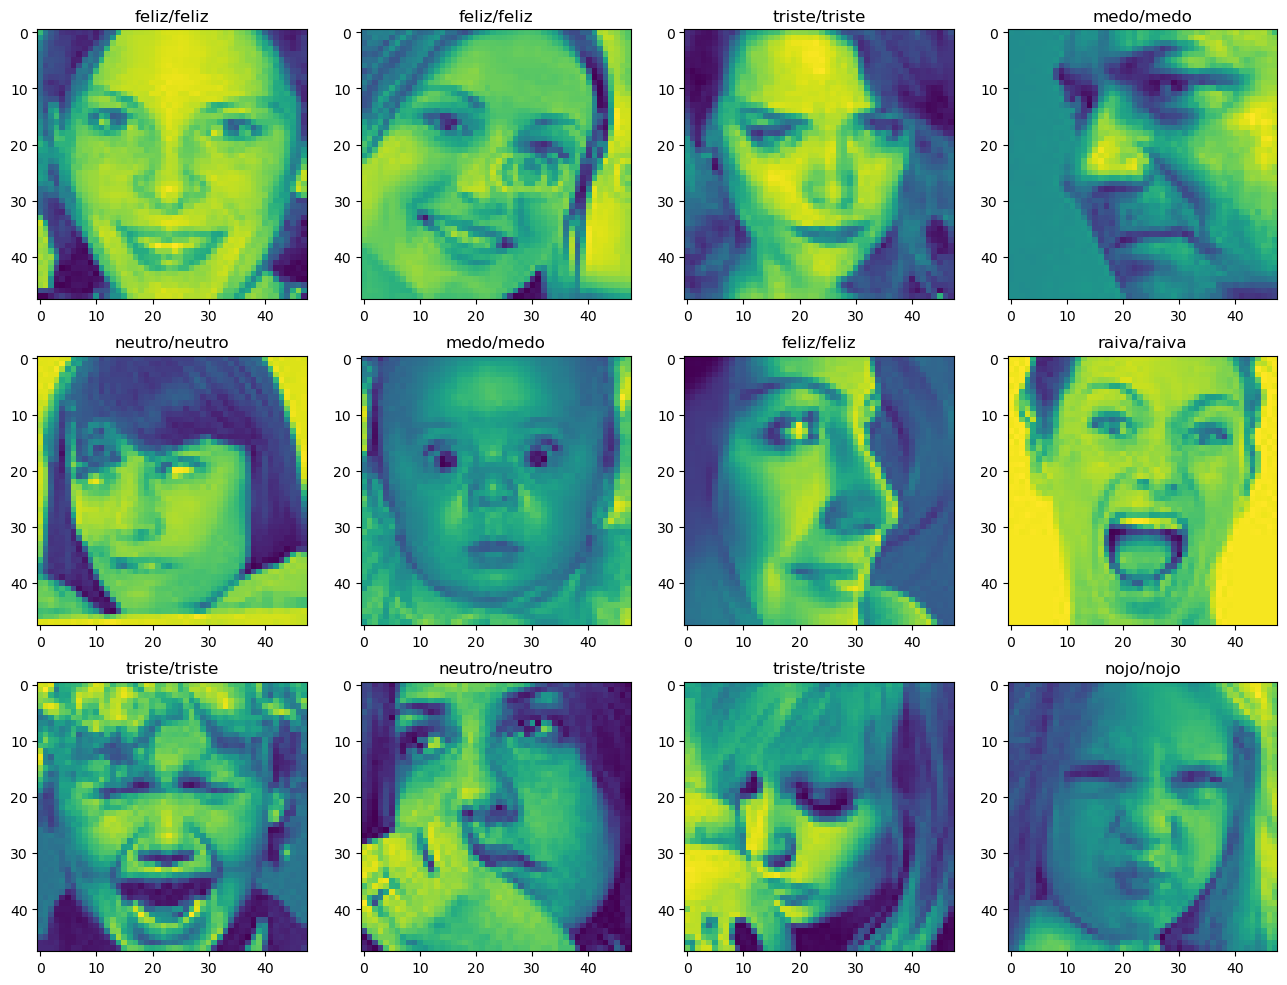

12 acertos de um total de 12


In [7]:
# verificando com dados de treino

plt.figure(figsize=[16,12])

hits = 0
for i in range (0,12):
    n = np.random.randint(1, 28709)
        
    figura = train_images[n]
    
    pred = model.predict(tf.expand_dims(figura, 0))
    plt.subplot(3,4,i+1)
    plt.imshow(figura)
    
    real_name = class_name(train_labels[n])
    predict_name = class_name(pred)
    if real_name == predict_name:
        hits+=1
    plt.title(real_name +'/'+predict_name)
    
plt.show()

print(str(hits)+" acertos de um total de 12")

1/1 [==============================] - 0s 18ms/step


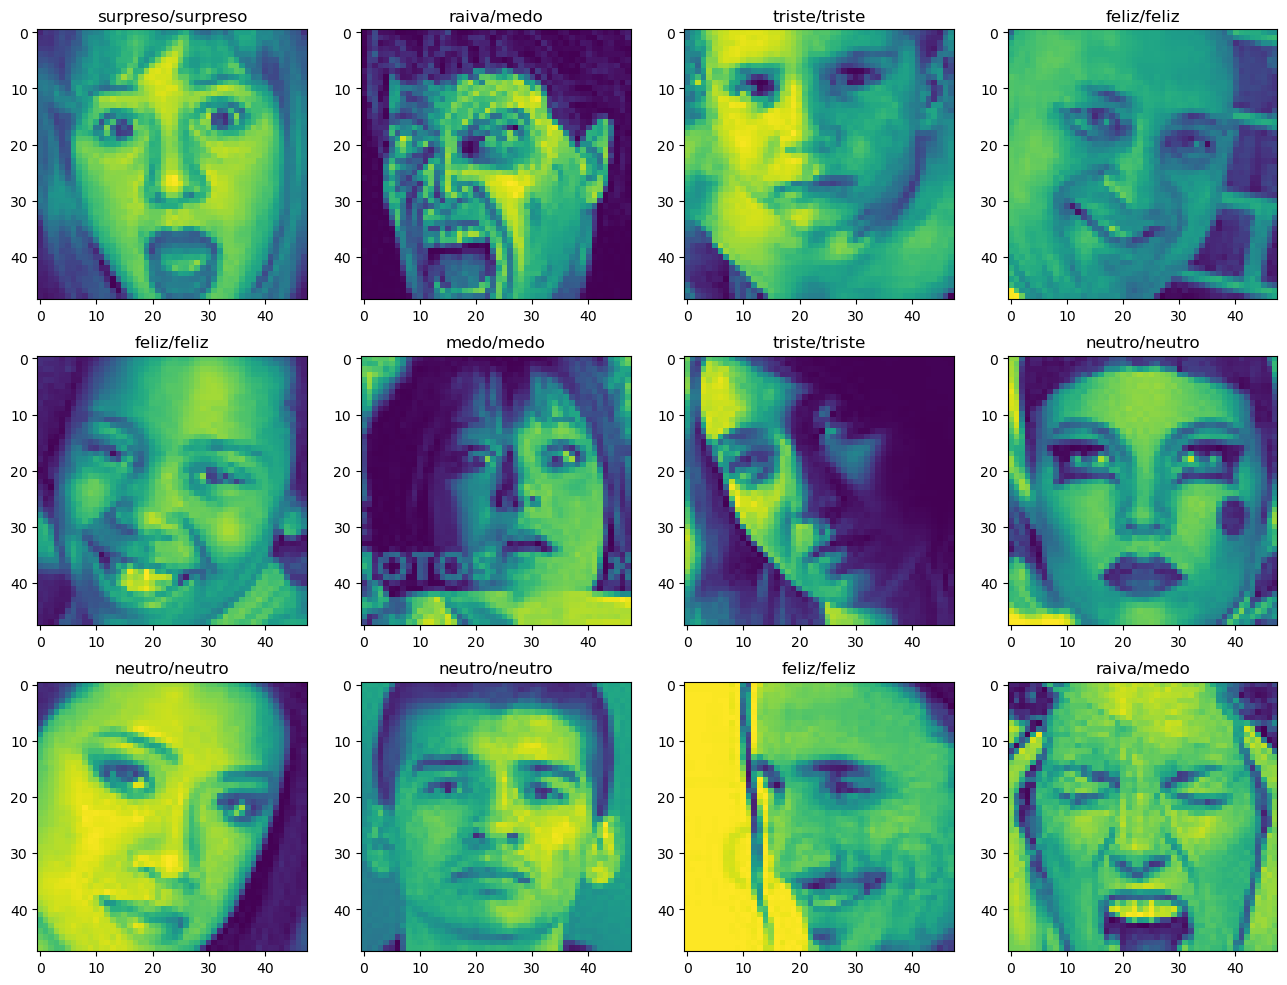

10 acertos de um total de 12


In [8]:
# verificando com dados de teste

plt.figure(figsize=[16,12])

hits = 0
for i in range (0,12):
    n = np.random.randint(1, 7177)
        
    figura = test_images[n]
    
    pred = model.predict(tf.expand_dims(figura, 0))
    plt.subplot(3,4,i+1)
    plt.imshow(figura)
    
    real_name = class_name(test_labels[n])
    predict_name = class_name(pred)
    if real_name == predict_name:
        hits+=1
    plt.title(real_name +'/'+predict_name)
    
plt.show()

print(str(hits)+" acertos de um total de 12")

1/1 [==============================] - 0s 16ms/step


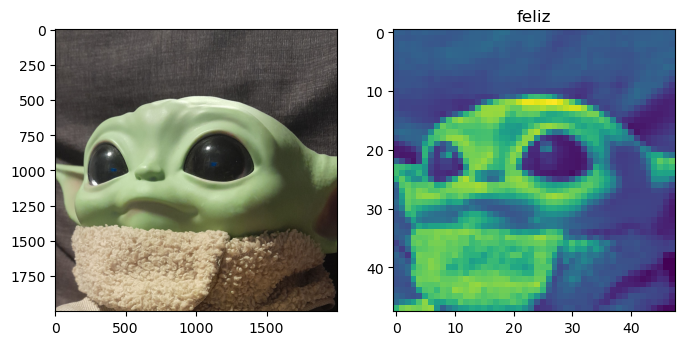

In [9]:
# verificando com uma figura qualquer

# just for fun

arquivo = 'yoda3.jpg'
#print(arquivo)
real_image = Image.open(arquivo)
image = preprocess_image(arquivo)
image = image.reshape(size,size,1)
pred = model.predict(tf.expand_dims(image, 0))

plt.figure(figsize=[8,16])
plt.subplot(1,2,1)
plt.imshow(real_image)
plt.subplot(1,2,2)
plt.title(class_name(pred))
plt.imshow(image)
#print(pred)
#print(class_name(pred))

1/1 [==============================] - 0s 19ms/step


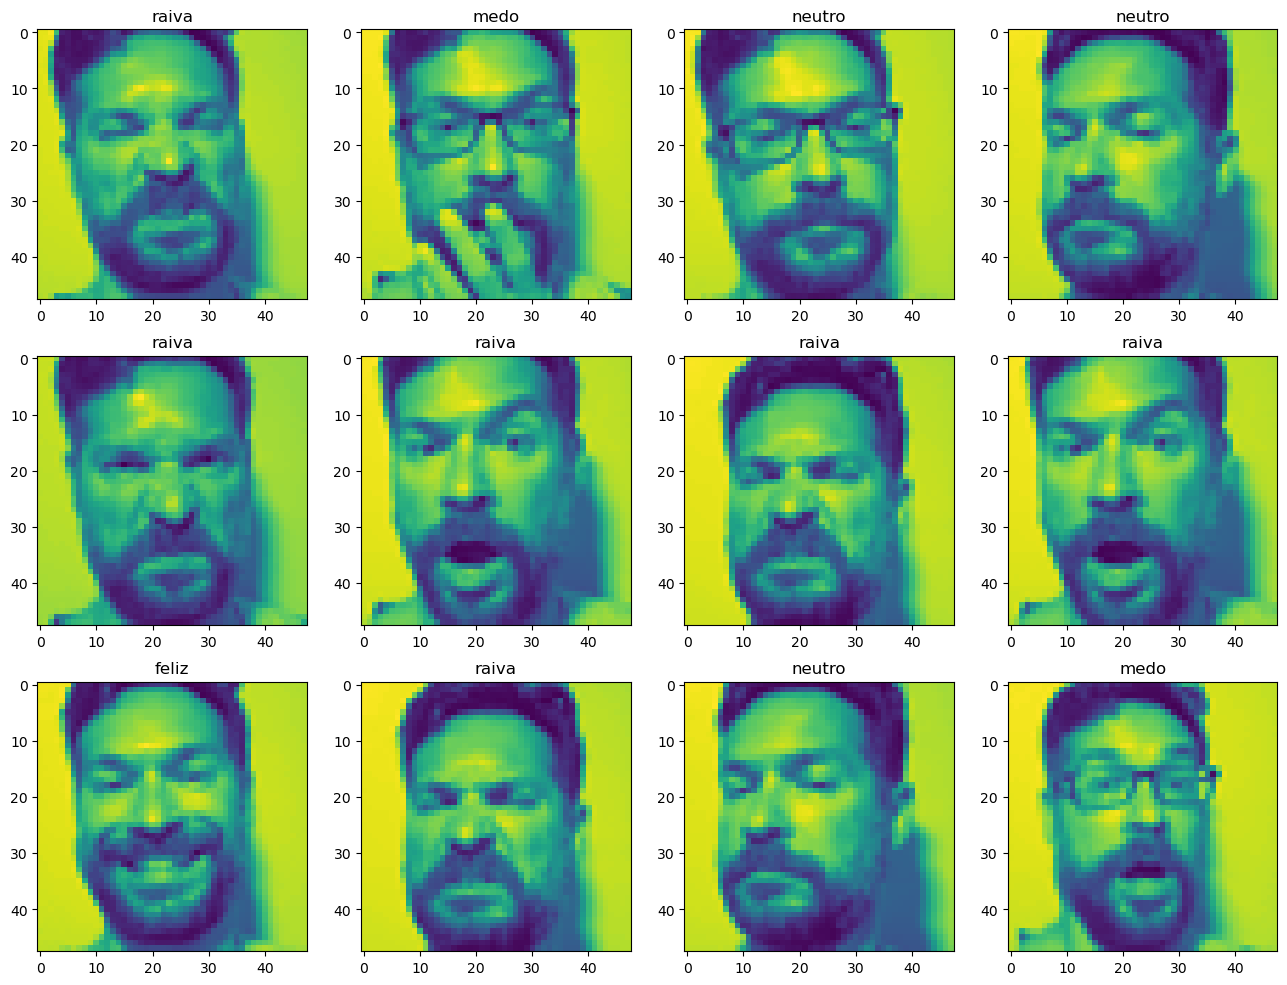

In [10]:
# verificando com amostras reais

plt.figure(figsize=[16,12])

hits = 0
for i in range (0,12):
            
    n = np.random.randint(1, 30)
    arquivo = 'capturas/foto ('+str(n)+').jpg'
    image = preprocess_image(arquivo)
    image = image.reshape(size,size,1)
    
    pred = model.predict(tf.expand_dims(image, 0))
    plt.subplot(3,4,i+1)
    plt.imshow(image)
    
    predict_name = class_name(pred)
    plt.title(predict_name)
    
plt.show()